In [1]:
import pandas as pd
from fbprophet import Prophet
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# read in data
df = pd.read_csv("hate_crime.csv")

# drop all unneeded columns
df = df[['INCIDENT_DATE', 'PUB_AGENCY_NAME']]

# convert the date-time field to a date-time object
df['INCIDENT_DATE'] = df['INCIDENT_DATE'].map(lambda a: pd.to_datetime(a, format = "%d-%b-%y"))

In [4]:
# create a month-year column so we can aggregate on month
df['month_year'] = df.INCIDENT_DATE.dt.to_period('M')

# drop the full incident date and rearrange the cols
df_new = df[['month_year', 'PUB_AGENCY_NAME']]

# create cross tab with month-year as columns and cities as rows
city_crosstab = pd.crosstab(df['PUB_AGENCY_NAME'], df['month_year'])

In [5]:
# define function to create forecasts
def CityModel (city):
    # subset the crosstab based upon city argument; convert result to dataframe; reset the index
    city_df = city_crosstab.loc[city].to_frame(name = 'y').reset_index(level = 'month_year')
    
    # name the columns as required by Prophet
    city_df.columns = ['ds', 'y']
    
    # convert the values in ds col to strings so they can be converted to date-time objects
    city_df.ds = city_df.ds.astype(str)
    
    # convert the ds column values to date-time objects
    city_df['ds'] = city_df['ds'].map(lambda a: pd.to_datetime(a, format = "%Y-%m"))
    
    # instantiate a Prophet model object
    m = Prophet()
    
    # fit the Prophet model
    m.fit(city_df)
    
    # create a dataframe with placeholders for the forecasted values
    future = m.make_future_dataframe(periods = 25, freq = 'M')
    
    # make 25 month forecast of hate crime frequency
    forecast = m.predict(future)
    
    # print the yhats and CI bounds
    print('Model data for:', city)
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24))

    # 2019 total (from forecasts)
    sum_19 = forecast.iloc[forecast.shape[0] - 12:, -1].sum()

    # 2018 total (from forecasts)
    sum_18 = forecast.iloc[forecast.shape[0] - 24:forecast.shape[0] - 12, -1].sum()

    # 2017 total (from actuals)
    sum_17 = city_df.iloc[city_df.shape[0] - 12:, -1].sum()
    total_17.append(sum_17)

    # 2016 total (from actuals)
    sum_16 = city_df.iloc[city_df.shape[0] - 24:city_df.shape[0] - 12, -1].sum()

    # calc annual avg across 2018 & 2019 forecasts
    mean_19_18 = np.mean([sum_19, sum_18])

    # calc annual avg across 2016 & 2017 actuals
    mean_16_17 = np.mean([sum_16, sum_17])

    # calc whether forecasted to inc or dec
    inc_or_dec = mean_19_18 - mean_16_17
    inc_dec_list.append(inc_or_dec)
    
    # export the forecast data
    filename = city.replace(' ', '_')
    forecast_output = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast_output['city'] = filename
    forecast_output['city_name'] = city
    global all_forecasts 
    all_forecasts = pd.concat([all_forecasts, forecast_output])
    forecast_output.to_csv('forecasts/' + filename + '.csv')

    # plot the results, save plot
    fig1 = m.plot(forecast)
    plt.suptitle(city + ' Monthly Hate Crimes', fontsize=16, y=1.08)
    plt.xlabel('')
    plt.ylabel('Quantity of Hate Crimes')
    fig1.savefig('plots/' + filename + '.jpg')
    return fig1;

In [3]:
# subset the crosstab based upon city argument; convert result to dataframe; reset the index
city_df_lv = city_crosstab.loc['Las Vegas NV'].to_frame(name = 'y').reset_index(level = 'month_year')

# name the columns as required by Prophet
city_df_lv.columns = ['ds', 'y']

# convert the values in ds col to strings so they can be converted to date-time objects
city_df_lv.ds = city_df_lv.ds.astype(str)

# convert the ds column values to date-time objects
city_df_lv['ds'] = city_df_lv['ds'].map(lambda a: pd.to_datetime(a, format = "%Y-%m"))

# instantiate a Prophet model object
m = Prophet()

# fit the Prophet model
m.fit(city_df_lv)

# create a dataframe with placeholders for the forecasted values
future_lv = m.make_future_dataframe(periods = 25, freq = 'M')

# make 25 month forecast of hate crime frequency
forecast_lv = m.predict(future_lv)

# print the yhats and CI bounds
print('Model data for:', 'Las Vegas, NV')
print(forecast_lv[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24))

# 2019 total (from forecasts)
sum_19_lv = forecast_lv.iloc[forecast.shape[0] - 12:, -1].sum()

# 2018 total (from forecasts)
sum_18_lv = forecast_lv.iloc[forecast.shape[0] - 24:forecast_lv.shape[0] - 12, -1].sum()

# 2017 total (from actuals)
sum_17_lv = city_df_lv.iloc[city_df_lv.shape[0] - 12:, -1].sum()
# total_17_lv.append(sum_17_lv)

In [47]:
city_df_lv

,ds,y
0,1991-01-01,0
1,1991-02-01,0
2,1991-03-01,0
3,1991-04-01,0
4,1991-05-01,0
5,1991-06-01,5
6,1991-07-01,2
7,1991-08-01,1
8,1991-09-01,3
9,1991-10-01,3


In [6]:
# Compile city list.
municipalities = pd.read_csv('cities.csv')
cities = municipalities['Municipality'].tolist()

## Overall trend among the cities with more than 100,000 people

C:\Users\pette\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\pette\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Model data for all cities with population greater than 100,000.
            ds        yhat  yhat_lower  yhat_upper
325 2018-01-31  227.634753  162.468552  291.416464
326 2018-02-28  204.058478  142.573084  268.623008
327 2018-03-31  238.487798  178.821341  299.142156
328 2018-04-30  224.633752  164.742406  285.163497
329 2018-05-31  271.266235  212.463639  331.742769
330 2018-06-30  276.117332  214.312512  342.829003
331 2018-07-31  302.502423  238.079831  361.219433
332 2018-08-31  239.893762  174.190531  299.553393
333 2018-09-30  240.633020  176.619634  300.579750
334 2018-10-31  168.660706  103.933602  227.869190
335 2018-11-30  175.122412  111.044673  238.529677
336 2018-12-31  240.444963  172.780494  309.696006
337 2019-01-31  239.561407  176.777773  300.404270
338 2019-02-28  199.309398  137.969135  260.798425
339 2019-03-31  239.251410  176.459318  297.742132
340 2019-04-30  219.932118  158.317653  281.144600
341 2019-05-31  279.336027  217.678572  340.458114
342 2019-06-30  28

C:\Users\pette\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


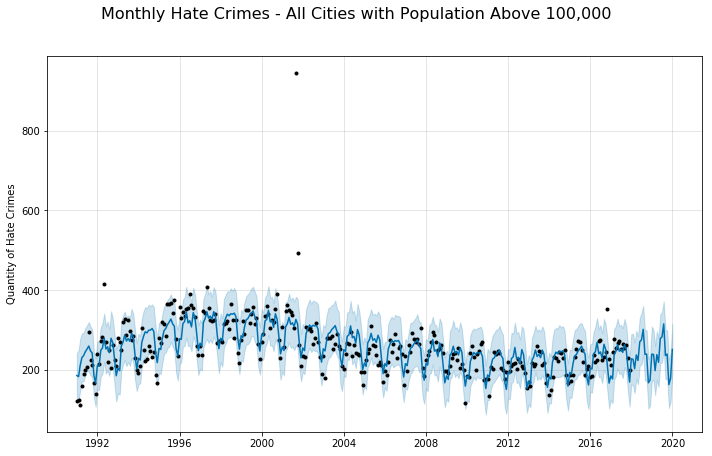

In [7]:
# Subset hate crimes data for just the municipalities with populations above 100,000. 
top_cities = df[df['PUB_AGENCY_NAME'].isin(cities)]

# create cross tab with month-year as columns and cities as rows
top_cities_crosstab = pd.crosstab(top_cities['PUB_AGENCY_NAME'], top_cities['month_year'])

# calculate sums for all cities in all months.
top_cities_crosstab = top_cities_crosstab.sum(numeric_only=True)

# subset the crosstab based upon city argument; convert result to dataframe; reset the index
top_cities_df = top_cities_crosstab.to_frame(name = 'y').reset_index(level = 'month_year')

# name the columns as required by Prophet
top_cities_df.columns = ['ds', 'y']

# convert the values in ds col to strings so they can be converted to date-time objects
top_cities_df.ds = top_cities_df.ds.astype(str)

# convert the ds column values to date-time objects
top_cities_df['ds'] = top_cities_df['ds'].map(lambda a: pd.to_datetime(a, format = "%Y-%m"))

# instantiate a Prophet model object
m = Prophet()

# fit the Prophet model
m.fit(top_cities_df)

# create a dataframe with placeholders for the forecasted values
future = m.make_future_dataframe(periods = 25, freq = 'M')

# make 25 month forecast of hate crime frequency
forecast = m.predict(future)

# print the yhats and CI bounds
print('Model data for all cities with population greater than 100,000.')
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24))

# 2019 total (from forecasts)
top_sum_19 = forecast.iloc[forecast.shape[0] - 12:, -1].sum()

# 2018 total (from forecasts)
top_sum_18 = forecast.iloc[forecast.shape[0] - 24:forecast.shape[0] - 12, -1].sum()

# 2017 total (from actuals)
top_sum_17 = top_cities_df.iloc[top_cities_df.shape[0] - 12:, -1].sum()

# 2016 total (from actuals)
top_sum_16 = top_cities_df.iloc[top_cities_df.shape[0] - 24:top_cities_df.shape[0] - 12, -1].sum()

# calc annual avg across 2018 & 2019 forecasts
top_mean_19_18 = np.mean([top_sum_19, top_sum_18])

# calc annual avg across 2016 & 2017 actuals
top_mean_16_17 = np.mean([top_sum_16, top_sum_17])

# calc whether forecasted to inc or dec
top_cities_trend = top_mean_19_18 - top_mean_16_17

# export the forecast data
filename = 'all_top_cities'
forecast_output = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_output.to_csv('forecasts/' + filename + '.csv')

# plot the results, save plot
fig2 = m.plot(forecast)
plt.suptitle('Monthly Hate Crimes - All Cities with Population Above 100,000', fontsize=16, y=1.08)
plt.xlabel('')
plt.ylabel('Quantity of Hate Crimes')
fig2.savefig('plots/' + filename + '.jpg')

## Nationwide Trends

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for all cities.
            ds        yhat  yhat_lower  yhat_upper
325 2018-01-31  500.159307  381.637528  622.304569
326 2018-02-28  445.028054  326.022395  574.884634
327 2018-03-31  527.712159  396.910087  648.628663
328 2018-04-30  502.076542  366.807650  617.354469
329 2018-05-31  552.443962  430.851825  678.554557
330 2018-06-30  590.780123  468.941442  714.248935
331 2018-07-31  590.009297  472.216796  705.733931
332 2018-08-31  565.034464  451.824899  683.316960
333 2018-09-30  574.933802  448.284146  693.212272
334 2018-10-31  364.647968  246.408480  488.698270
335 2018-11-30  379.547226  250.337628  495.521103
336 2018-12-31  464.157285  342.372186  593.774951
337 2019-01-31  514.421765  391.242999  645.383188
338 2019-02-28  420.779161  292.116254  536.621689
339 2019-03-31  517.940606  387.823978  639.998348
340 2019-04-30  483.358093  360.237821  600.989294
341 2019-05-31  553.157406  438.074381  677.106086
342 2019-06-30  595.129507  465.345428  723.497104
343 

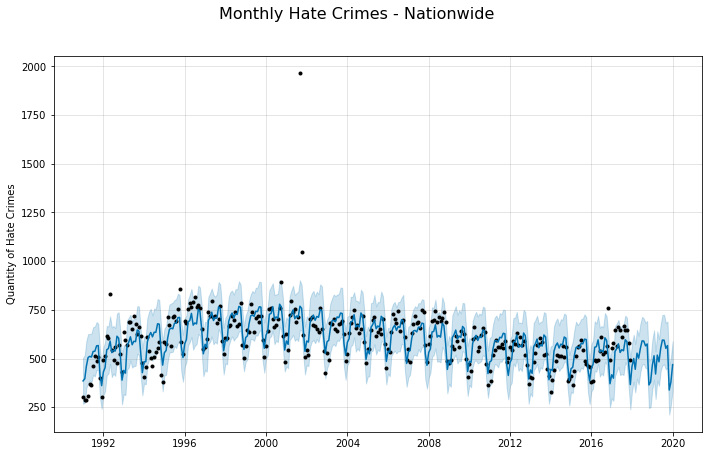

In [8]:
# Subset hate crimes data for just the municipalities with populations above 100,000. 
all_cities = df.copy()

# create cross tab with month-year as columns and cities as rows
all_cities_crosstab = pd.crosstab(all_cities['PUB_AGENCY_NAME'], all_cities['month_year'])

# calculate sums for all cities in all months.
all_cities_crosstab = all_cities_crosstab.sum(numeric_only=True)

# subset the crosstab based upon city argument; convert result to dataframe; reset the index
all_cities_df = all_cities_crosstab.to_frame(name = 'y').reset_index(level = 'month_year')

# name the columns as required by Prophet
all_cities_df.columns = ['ds', 'y']

# convert the values in ds col to strings so they can be converted to date-time objects
all_cities_df.ds = all_cities_df.ds.astype(str)

# convert the ds column values to date-time objects
all_cities_df['ds'] = all_cities_df['ds'].map(lambda a: pd.to_datetime(a, format = "%Y-%m"))

# instantiate a Prophet model object
m = Prophet()

# fit the Prophet model
m.fit(all_cities_df)

# create a dataframe with placeholders for the forecasted values
future = m.make_future_dataframe(periods = 25, freq = 'M')

# make 25 month forecast of hate crime frequency
forecast = m.predict(future)

# print the yhats and CI bounds
print('Model data for all cities.')
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24))

# 2019 total (from forecasts)
all_sum_19 = forecast.iloc[forecast.shape[0] - 12:, -1].sum()

# 2018 total (from forecasts)
all_sum_18 = forecast.iloc[forecast.shape[0] - 24:forecast.shape[0] - 12, -1].sum()

# 2017 total (from actuals)
all_sum_17 = all_cities_df.iloc[all_cities_df.shape[0] - 12:, -1].sum()

# 2016 total (from actuals)
all_sum_16 = all_cities_df.iloc[all_cities_df.shape[0] - 24:all_cities_df.shape[0] - 12, -1].sum()

# calc annual avg across 2018 & 2019 forecasts
all_mean_19_18 = np.mean([all_sum_19, all_sum_18])

# calc annual avg across 2016 & 2017 actuals
all_mean_16_17 = np.mean([all_sum_16, all_sum_17])

# calc whether forecasted to inc or dec
all_cities_trend = all_mean_19_18 - all_mean_16_17

# export the forecast data
filename = 'all_cities'
forecast_output = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_output.to_csv('forecasts/' + filename + '.csv')

# plot the results, save plot
fig3 = m.plot(forecast)
plt.suptitle('Monthly Hate Crimes - Nationwide', fontsize=16, y=1.08)
plt.xlabel('')
plt.ylabel('Quantity of Hate Crimes')
fig3.savefig('plots/' + filename + '.jpg')

## Individual City Models

In [9]:
# Initialize output lists, collected forecast dataframe

inc_dec_list = []
total_17 = []
all_forecasts = pd.DataFrame(columns=['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'city', 'city_name'])

In [ ]:
for city in cities:
    CityModel(city)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: New York NY
            ds       yhat  yhat_lower  yhat_upper
325 2018-01-31  26.335201   13.850989   38.131313
326 2018-02-28  20.788742    8.161211   32.445157
327 2018-03-31  28.232915   15.910094   41.080728
328 2018-04-30  26.020404   12.920925   38.377716
329 2018-05-31  30.314117   17.878817   43.045275
330 2018-06-30  29.991200   17.824910   42.559717
331 2018-07-31  28.494429   16.418865   40.777344
332 2018-08-31  31.490893   19.590186   44.558939
333 2018-09-30  29.781270   16.604739   42.242090
334 2018-10-31  24.920924   12.342906   37.616336
335 2018-11-30  25.628669   13.200365   37.917405
336 2018-12-31  27.038499   15.229558   39.259985
337 2019-01-31  28.497116   16.624893   41.328783
338 2019-02-28  19.397874    6.629743   31.646678
339 2019-03-31  28.523378   15.493653   40.654627
340 2019-04-30  25.847808   14.339696   37.423383
341 2019-05-31  31.153018   18.912703   43.276362
342 2019-06-30  31.261548   19.455158   44.122874
343 2019-07-31  28.998

C:\Users\pette\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pette\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Los Angeles CA
            ds       yhat  yhat_lower  yhat_upper
325 2018-01-31  21.065964    8.345514   33.293966
326 2018-02-28   3.892272   -8.783479   15.767507
327 2018-03-31  17.293069    4.032002   30.560916
328 2018-04-30  18.902864    5.063740   31.064893
329 2018-05-31  20.298815    6.685764   32.211819
330 2018-06-30  18.746307    5.814280   31.272525
331 2018-07-31  29.764807   17.373615   42.897385
332 2018-08-31  11.731158   -2.257325   24.868641
333 2018-09-30  11.808983   -0.166996   25.701117
334 2018-10-31  12.706361    0.183345   25.655674
335 2018-11-30   7.161311   -5.808364   19.634195
336 2018-12-31  20.649213    8.684442   33.291355
337 2019-01-31  22.768131    9.483237   36.042749
338 2019-02-28   0.877907  -12.168197   14.183754
339 2019-03-31  17.346604    4.470139   30.287759
340 2019-04-30  18.274703    6.172047   31.795900
341 2019-05-31  20.535770    7.383788   33.714459
342 2019-06-30  18.536903    5.673503   31.257801
343 2019-07-31  31.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Chicago IL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  2.021327   -3.155344    6.818034
326 2018-02-28  5.001671   -0.332368   10.131436
327 2018-03-31  5.383142    0.507791   10.667433
328 2018-04-30  1.093282   -3.614974    6.156783
329 2018-05-31  0.694644   -4.127817    5.375554
330 2018-06-30  6.918904    1.789744   11.836355
331 2018-07-31  4.700297   -0.172812    9.720558
332 2018-08-31  4.935486   -0.147860   10.060736
333 2018-09-30  0.838882   -3.970669    5.682053
334 2018-10-31  3.457062   -1.491670    8.454720
335 2018-11-30  0.348343   -4.873878    5.314090
336 2018-12-31 -0.491642   -5.871263    4.357405
337 2019-01-31  2.152644   -2.950575    7.024901
338 2019-02-28  5.508430    0.560351   10.340479
339 2019-03-31  5.804965    0.966783   10.542143
340 2019-04-30  0.257273   -4.726647    5.312028
341 2019-05-31  0.145762   -4.715118    5.361280
342 2019-06-30  7.641056    2.282830   12.623857
343 2019-07-31  5.137457    0.030839   10.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Houston TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.750734   -2.010829    3.180172
326 2018-02-28  0.990099   -1.543663    3.913309
327 2018-03-31  1.181906   -1.324197    3.934614
328 2018-04-30  0.682570   -2.054781    3.220175
329 2018-05-31  1.391771   -1.105845    3.937981
330 2018-06-30  1.246895   -1.176649    3.942210
331 2018-07-31  0.642454   -2.105639    3.241448
332 2018-08-31  1.451449   -1.065779    4.105379
333 2018-09-30  0.004277   -2.509396    2.556403
334 2018-10-31 -0.073439   -2.738850    2.570410
335 2018-11-30 -0.121598   -2.911183    2.506001
336 2018-12-31  0.833551   -1.841053    3.382822
337 2019-01-31  0.645222   -1.995267    3.140019
338 2019-02-28  0.780620   -1.825319    3.267845
339 2019-03-31  1.076852   -1.532397    3.782207
340 2019-04-30  0.512655   -1.972006    3.101048
341 2019-05-31  1.338230   -1.352920    3.900482
342 2019-06-30  1.177141   -1.603054    3.816131
343 2019-07-31  0.488148   -2.276026    3.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Philadelphia PA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -2.427535   -7.160120    2.425516
326 2018-02-28  3.676670   -1.145137    8.783471
327 2018-03-31  2.832973   -2.125747    7.659657
328 2018-04-30  2.163616   -2.917906    7.177413
329 2018-05-31  0.505160   -4.400973    5.291934
330 2018-06-30  0.424084   -4.329052    5.793244
331 2018-07-31  0.918518   -4.086467    5.800468
332 2018-08-31 -2.783409   -7.439001    2.239988
333 2018-09-30  5.244691    0.310998   10.150726
334 2018-10-31  1.533498   -3.365704    6.363900
335 2018-11-30 -0.592654   -5.728679    4.293014
336 2018-12-31 -2.474381   -7.416650    2.568231
337 2019-01-31 -3.263332   -8.332054    1.636182
338 2019-02-28  4.273136   -0.328584    9.446688
339 2019-03-31  2.915511   -2.365684    7.972323
340 2019-04-30  2.111245   -2.990652    6.726546
341 2019-05-31  0.307057   -4.532041    5.533475
342 2019-06-30  0.152751   -4.521104    5.098553
343 2019-07-31  0.780400   -4.141737 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Phoenix AZ
            ds       yhat  yhat_lower  yhat_upper
325 2018-01-31  15.549128    9.253901   22.000470
326 2018-02-28  18.011176   11.455444   24.866890
327 2018-03-31  16.432382   10.631635   22.664199
328 2018-04-30  19.056802   12.964619   25.547103
329 2018-05-31  16.825689   10.475210   23.902885
330 2018-06-30  16.258377    9.517488   22.561126
331 2018-07-31  19.924758   13.289117   26.475270
332 2018-08-31  17.875377   11.579201   24.269916
333 2018-09-30  18.815683   12.133444   25.269076
334 2018-10-31  16.273640    9.996350   22.958118
335 2018-11-30  15.332857    8.865624   21.489484
336 2018-12-31  20.396843   13.868721   26.586495
337 2019-01-31  16.324408    9.924610   22.372204
338 2019-02-28  18.864741   12.436461   25.479944
339 2019-03-31  17.064322   10.766165   23.645152
340 2019-04-30  20.235001   13.624335   27.049078
341 2019-05-31  18.039416   11.501509   24.405486
342 2019-06-30  16.659530   10.327067   23.322890
343 2019-07-31  21.1844

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: San Diego CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.229873   -4.001240    6.023893
326 2018-02-28  4.610328   -0.462725    9.566104
327 2018-03-31  3.163583   -1.945360    8.305078
328 2018-04-30  2.414027   -2.565054    7.693339
329 2018-05-31  3.147534   -2.063358    8.113147
330 2018-06-30  3.189539   -1.739760    8.248739
331 2018-07-31  4.477786   -0.537673    9.659697
332 2018-08-31  5.126170   -0.048427    9.953017
333 2018-09-30  4.784798   -0.517081    9.783883
334 2018-10-31 -3.191336   -8.585979    1.645142
335 2018-11-30  3.508132   -1.847456    8.317470
336 2018-12-31  3.747817   -1.344413    8.945810
337 2019-01-31  0.583855   -4.248020    5.536043
338 2019-02-28  4.513858   -0.676871    9.601086
339 2019-03-31  2.769969   -2.434815    8.236873
340 2019-04-30  1.794143   -3.109307    6.925231
341 2019-05-31  2.816270   -2.477971    7.724960
342 2019-06-30  2.755759   -2.434743    7.773902
343 2019-07-31  4.293320   -0.545351    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Dallas TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.649114   -2.282436    3.574634
326 2018-02-28  1.754532   -1.230150    4.844958
327 2018-03-31  0.719987   -2.375195    3.557523
328 2018-04-30  0.470781   -2.563587    3.528594
329 2018-05-31  1.984038   -0.927314    4.926976
330 2018-06-30  0.031131   -2.981345    3.008903
331 2018-07-31  2.333523   -0.427448    5.376584
332 2018-08-31  1.634371   -1.303039    4.846295
333 2018-09-30 -0.111314   -3.093882    2.965597
334 2018-10-31 -0.389920   -3.308694    2.378873
335 2018-11-30 -0.348585   -3.387234    2.778398
336 2018-12-31  0.160656   -2.941388    3.246212
337 2019-01-31  0.584435   -2.295541    3.633831
338 2019-02-28  1.799589   -1.052738    4.703754
339 2019-03-31  0.456743   -2.494530    3.384422
340 2019-04-30  0.136916   -2.992452    2.966312
341 2019-05-31  2.013517   -1.089833    4.911136
342 2019-06-30 -0.253491   -3.143611    2.732786
343 2019-07-31  2.507548   -0.502901    5.5

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: San Antonio TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.185980   -1.637652    1.881571
326 2018-02-28  0.739513   -0.951229    2.437859
327 2018-03-31  0.774299   -0.999780    2.508992
328 2018-04-30  0.286946   -1.301315    2.093771
329 2018-05-31  0.560438   -1.233035    2.262076
330 2018-06-30  0.388186   -1.499022    2.142849
331 2018-07-31  1.526538   -0.130125    3.223867
332 2018-08-31  0.449066   -1.238207    2.192928
333 2018-09-30  0.344122   -1.284971    2.137506
334 2018-10-31  0.286435   -1.400780    2.102770
335 2018-11-30  0.494848   -1.368204    2.204406
336 2018-12-31  0.371213   -1.308315    2.113562
337 2019-01-31  0.037713   -1.626744    1.791779
338 2019-02-28  0.701457   -1.024878    2.550474
339 2019-03-31  0.692743   -1.112699    2.430659
340 2019-04-30  0.146999   -1.630337    1.840774
341 2019-05-31  0.540782   -1.250576    2.201940
342 2019-06-30  0.283871   -1.589102    2.032307
343 2019-07-31  1.623899   -0.166245  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Detroit MI
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  2.051691   -0.027872    4.038295
326 2018-02-28  1.965952   -0.090220    3.941944
327 2018-03-31  2.164512    0.239028    4.026454
328 2018-04-30  2.270920    0.365037    4.267039
329 2018-05-31  2.086821   -0.000565    4.008398
330 2018-06-30  2.731471    0.726216    4.639982
331 2018-07-31  2.430125    0.370485    4.297217
332 2018-08-31  2.619505    0.633366    4.569227
333 2018-09-30  2.574708    0.546013    4.517275
334 2018-10-31  2.048311   -0.042434    4.120926
335 2018-11-30  1.988988    0.071012    3.853434
336 2018-12-31  2.403885    0.402583    4.611555
337 2019-01-31  2.110092    0.148098    4.112435
338 2019-02-28  2.053981    0.069760    4.266247
339 2019-03-31  2.253994    0.289540    4.217229
340 2019-04-30  2.343539    0.461469    4.330328
341 2019-05-31  2.176469    0.210782    4.053721
342 2019-06-30  2.823341    0.775988    4.918308
343 2019-07-31  2.504276    0.546071    4.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: San Jose CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.583685   -1.971799    3.269142
326 2018-02-28  3.787644    1.266761    6.507435
327 2018-03-31  1.766401   -0.996699    4.436921
328 2018-04-30  1.227950   -1.379995    3.866243
329 2018-05-31  0.836661   -1.919288    3.506030
330 2018-06-30  1.686170   -0.876097    4.356403
331 2018-07-31  2.803400    0.165303    5.416151
332 2018-08-31  2.796086    0.126325    5.538282
333 2018-09-30  1.363827   -1.321617    3.908365
334 2018-10-31  0.346500   -2.433693    2.990279
335 2018-11-30  1.513088   -1.111509    4.016114
336 2018-12-31  0.934041   -1.537019    3.519984
337 2019-01-31  0.305112   -2.261054    3.175159
338 2019-02-28  4.002723    1.496147    6.717806
339 2019-03-31  1.617123   -1.001753    4.312434
340 2019-04-30  0.922932   -1.708015    3.610601
341 2019-05-31  0.675743   -1.979226    3.254837
342 2019-06-30  1.579401   -0.937159    4.211647
343 2019-07-31  2.878850    0.316392    5

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Indianapolis IN
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.860018   -0.062732    3.786111
326 2018-02-28  2.252213    0.358261    4.262097
327 2018-03-31  2.037570    0.102696    3.815210
328 2018-04-30  1.930515   -0.033536    3.708760
329 2018-05-31  2.240360    0.456286    4.158187
330 2018-06-30  2.345948    0.491702    4.301678
331 2018-07-31  2.270730    0.464276    4.229610
332 2018-08-31  2.749945    1.009596    4.669572
333 2018-09-30  2.127657    0.296082    3.968858
334 2018-10-31  1.764876   -0.106916    3.677852
335 2018-11-30  1.633269   -0.077883    3.529244
336 2018-12-31  2.067363    0.100259    4.008895
337 2019-01-31  1.905343    0.177728    3.994518
338 2019-02-28  2.384556    0.507292    4.336859
339 2019-03-31  2.126680    0.177301    3.999355
340 2019-04-30  1.997885    0.156399    3.910965
341 2019-05-31  2.327821    0.536488    4.153972
342 2019-06-30  2.438275    0.575402    4.402058
343 2019-07-31  2.301220    0.407757 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: San Francisco CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.811996   -6.351002    7.888663
326 2018-02-28 -1.056450   -8.461004    6.152693
327 2018-03-31  4.305042   -2.923717   11.763127
328 2018-04-30 -3.591441  -11.005236    3.969909
329 2018-05-31 -3.545625  -10.239775    3.602776
330 2018-06-30  2.615760   -4.746783   10.031160
331 2018-07-31  0.347231   -7.272070    7.522123
332 2018-08-31  1.565674   -5.745524    8.916312
333 2018-09-30 -0.216704   -7.750205    6.844601
334 2018-10-31  2.112611   -4.652100    9.528241
335 2018-11-30 -4.616875  -12.016312    2.825246
336 2018-12-31 -2.340929   -9.543583    4.981441
337 2019-01-31  0.792182   -6.218882    8.649882
338 2019-02-28 -1.877035   -8.883371    5.719360
339 2019-03-31  4.630730   -3.092424   12.189887
340 2019-04-30 -5.101932  -12.037978    2.618342
341 2019-05-31 -4.863374  -12.062866    2.722634
342 2019-06-30  2.492007   -4.912095    9.745134
343 2019-07-31 -0.169260   -7.609856

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Jacksonville FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.430960   -0.463472    1.364153
326 2018-02-28 -0.205578   -1.110193    0.701388
327 2018-03-31 -0.368308   -1.277421    0.532005
328 2018-04-30  0.815286   -0.073630    1.734070
329 2018-05-31  0.106275   -0.849961    0.948748
330 2018-06-30  0.332276   -0.570556    1.264857
331 2018-07-31  0.039407   -0.828233    0.932437
332 2018-08-31  0.026095   -0.885008    0.955858
333 2018-09-30  0.067261   -0.825832    0.948548
334 2018-10-31  0.287425   -0.584848    1.217330
335 2018-11-30  0.008482   -0.896860    0.861468
336 2018-12-31  0.184488   -0.737198    1.091973
337 2019-01-31  0.503623   -0.391344    1.389639
338 2019-02-28 -0.297597   -1.179565    0.555245
339 2019-03-31 -0.475459   -1.337324    0.472756
340 2019-04-30  0.923833    0.019152    1.813443
341 2019-05-31  0.029802   -0.808869    1.006900
342 2019-06-30  0.372382   -0.481988    1.233234
343 2019-07-31 -0.012063   -0.895414 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Columbus OH
            ds       yhat  yhat_lower  yhat_upper
325 2018-01-31   7.922797    1.672691   13.384078
326 2018-02-28   8.679833    2.756636   14.416146
327 2018-03-31   9.567926    3.582352   15.453746
328 2018-04-30   9.956789    4.351709   16.253098
329 2018-05-31  10.472697    4.077829   16.421972
330 2018-06-30  10.525517    4.568737   16.485831
331 2018-07-31  11.765857    5.883768   17.622039
332 2018-08-31  10.448837    4.552336   16.855765
333 2018-09-30  10.041212    3.948098   15.622598
334 2018-10-31   9.346333    3.174682   14.851180
335 2018-11-30   7.690194    1.561168   13.786386
336 2018-12-31   9.001263    3.283725   14.647745
337 2019-01-31   8.294237    1.930278   14.530254
338 2019-02-28   8.997070    3.087044   15.249480
339 2019-03-31   9.904908    3.638564   15.846811
340 2019-04-30  10.239878    4.233339   16.384446
341 2019-05-31  10.818290    4.972553   17.096198
342 2019-06-30  10.838998    4.588867   17.032013
343 2019-07-31  12.126

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Austin TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.671078   -1.349875    2.680543
326 2018-02-28  0.036730   -2.174898    2.220009
327 2018-03-31  1.061593   -1.122576    3.383052
328 2018-04-30  0.557331   -1.548163    2.618538
329 2018-05-31  0.687311   -1.406403    2.810359
330 2018-06-30  0.422761   -1.676975    2.533348
331 2018-07-31  0.589001   -1.499193    2.658604
332 2018-08-31  1.127235   -1.050957    3.181449
333 2018-09-30  0.445390   -1.571807    2.501466
334 2018-10-31  0.146548   -2.023274    2.223593
335 2018-11-30  0.067918   -2.044478    2.124056
336 2018-12-31  0.408023   -1.599020    2.548799
337 2019-01-31  0.571659   -1.635522    2.650383
338 2019-02-28 -0.119049   -2.138992    2.039000
339 2019-03-31  1.018357   -1.158044    3.149124
340 2019-04-30  0.494933   -1.542219    2.521350
341 2019-05-31  0.564393   -1.472972    2.570884
342 2019-06-30  0.320736   -1.824560    2.624931
343 2019-07-31  0.539099   -1.554788    2.7

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Baltimore MD
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.441592   -1.588718    2.578351
326 2018-02-28 -1.227480   -3.387486    0.913632
327 2018-03-31  0.813695   -1.181309    2.895745
328 2018-04-30 -0.416805   -2.535426    1.888370
329 2018-05-31 -0.005957   -2.388311    2.301029
330 2018-06-30 -0.115481   -2.161224    1.976793
331 2018-07-31 -0.725327   -2.855092    1.377508
332 2018-08-31  0.730947   -1.370267    2.802589
333 2018-09-30  0.527372   -1.520679    2.722771
334 2018-10-31 -0.825787   -3.013382    1.253809
335 2018-11-30 -1.032246   -3.102218    1.146570
336 2018-12-31 -0.018428   -2.020974    2.211106
337 2019-01-31  0.558684   -1.612942    2.762638
338 2019-02-28 -1.607023   -3.646926    0.547434
339 2019-03-31  0.936638   -1.031980    3.119147
340 2019-04-30 -0.622926   -2.754858    1.494561
341 2019-05-31  0.004573   -2.235894    2.205012
342 2019-06-30 -0.150019   -2.072837    2.093368
343 2019-07-31 -0.875862   -2.906198    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Memphis TN
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.479420   -0.870578    4.023733
326 2018-02-28  0.606223   -1.961348    2.802601
327 2018-03-31  0.904112   -1.440485    3.113234
328 2018-04-30  0.965853   -1.479760    3.356057
329 2018-05-31  1.956097   -0.517416    4.195374
330 2018-06-30  1.715900   -0.793719    4.013903
331 2018-07-31  1.768399   -0.573440    4.231519
332 2018-08-31  1.579804   -0.820960    3.853055
333 2018-09-30  0.888909   -1.493079    3.289437
334 2018-10-31  0.786802   -1.625691    3.227027
335 2018-11-30  1.425847   -0.801134    3.814112
336 2018-12-31  1.208379   -1.173807    3.665776
337 2019-01-31  1.416390   -1.043525    3.778412
338 2019-02-28  0.337390   -1.941870    2.666564
339 2019-03-31  0.645092   -1.739795    3.056193
340 2019-04-30  0.836082   -1.455395    3.039571
341 2019-05-31  1.830869   -0.418731    4.218987
342 2019-06-30  1.603507   -0.702566    3.934790
343 2019-07-31  1.642539   -0.581970    3.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Milwaukee WI
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.812146   -0.737936    2.510161
326 2018-02-28  0.970379   -0.576701    2.483789
327 2018-03-31  0.529757   -1.250069    2.126882
328 2018-04-30  0.805317   -0.792806    2.446873
329 2018-05-31  0.896464   -0.752652    2.405431
330 2018-06-30  0.790498   -0.864691    2.436265
331 2018-07-31  0.915246   -0.688931    2.524670
332 2018-08-31  1.093499   -0.465556    2.703984
333 2018-09-30  0.791049   -0.809772    2.512416
334 2018-10-31  0.608245   -1.059940    2.267096
335 2018-11-30  0.041256   -1.604978    1.716063
336 2018-12-31  0.605204   -1.118725    2.327259
337 2019-01-31  0.782474   -0.885456    2.376918
338 2019-02-28  0.886822   -0.737504    2.606131
339 2019-03-31  0.448810   -1.223650    2.271723
340 2019-04-30  0.644524   -1.029275    2.259946
341 2019-05-31  0.842692   -0.815000    2.524648
342 2019-06-30  0.704584   -0.898383    2.377220
343 2019-07-31  0.858469   -0.754428    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Boston MA
            ds       yhat  yhat_lower  yhat_upper
325 2018-01-31   9.615064    2.191968   15.913764
326 2018-02-28  11.060507    3.779251   18.348959
327 2018-03-31  12.698673    5.504242   19.874155
328 2018-04-30  11.520172    4.714755   17.918508
329 2018-05-31  14.736959    7.902303   22.215890
330 2018-06-30  12.998524    5.743886   20.167185
331 2018-07-31  12.919691    6.111796   19.870994
332 2018-08-31  10.171978    2.375652   16.900197
333 2018-09-30  12.246875    5.056296   19.293864
334 2018-10-31   9.246148    1.352213   16.460379
335 2018-11-30   7.274017    0.230511   14.406456
336 2018-12-31   8.970893    1.994606   16.241988
337 2019-01-31   9.485690    2.017569   16.594386
338 2019-02-28  10.907228    3.887693   17.686854
339 2019-03-31  12.563279    4.699987   19.815582
340 2019-04-30  11.270324    4.169136   18.603927
341 2019-05-31  14.700525    7.460645   22.320515
342 2019-06-30  12.941389    5.568832   19.597813
343 2019-07-31  13.01535

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Washington DC
            ds       yhat  yhat_lower  yhat_upper
325 2018-01-31   9.251839    6.350377   12.142584
326 2018-02-28  10.213275    6.981656   13.359715
327 2018-03-31   9.211795    6.477787   12.414208
328 2018-04-30  10.072212    7.151161   13.210622
329 2018-05-31  11.706695    8.465852   14.768441
330 2018-06-30  11.383986    8.531289   14.340814
331 2018-07-31   9.607150    6.638421   12.601665
332 2018-08-31  11.690365    8.654075   14.715461
333 2018-09-30  10.313826    7.487443   13.409610
334 2018-10-31   9.914638    6.746735   12.734635
335 2018-11-30   9.657397    6.736061   12.583936
336 2018-12-31  11.027408    8.052919   14.033487
337 2019-01-31   9.909567    6.922821   13.094485
338 2019-02-28  10.951089    7.821171   14.260984
339 2019-03-31   9.801131    6.843722   12.769608
340 2019-04-30  10.751261    7.694689   13.653858
341 2019-05-31  12.561039    9.522327   15.661549
342 2019-06-30  12.161400    9.224871   15.157827
343 2019-07-31  10.1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Nashville TN
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.018584   -0.242650    2.270806
326 2018-02-28  1.817721    0.595177    3.000306
327 2018-03-31  1.291242    0.150282    2.562736
328 2018-04-30  1.423931    0.271301    2.738148
329 2018-05-31  1.774385    0.571400    2.984482
330 2018-06-30  1.375784    0.261266    2.607481
331 2018-07-31  1.248143   -0.028086    2.491568
332 2018-08-31  1.522925    0.245283    2.783431
333 2018-09-30  1.565115    0.225236    2.862091
334 2018-10-31  1.032418   -0.164551    2.261595
335 2018-11-30  1.153008   -0.058279    2.522157
336 2018-12-31  1.102367   -0.094831    2.323993
337 2019-01-31  1.072653   -0.173793    2.280331
338 2019-02-28  1.874747    0.668903    3.203258
339 2019-03-31  1.339119    0.078022    2.507866
340 2019-04-30  1.477535    0.182917    2.705859
341 2019-05-31  1.830823    0.532732    3.077905
342 2019-06-30  1.426847    0.198133    2.589901
343 2019-07-31  1.304397    0.013818    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: El Paso TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.018221   -1.193834    1.240769
326 2018-02-28  0.085495   -1.155448    1.370904
327 2018-03-31  0.296068   -0.949452    1.570012
328 2018-04-30  0.244201   -0.996413    1.425474
329 2018-05-31  0.060171   -1.270704    1.211252
330 2018-06-30  0.040050   -1.226332    1.265244
331 2018-07-31 -0.048615   -1.236353    1.153019
332 2018-08-31 -0.021524   -1.204005    1.261258
333 2018-09-30  0.002315   -1.265888    1.377381
334 2018-10-31 -0.020008   -1.312663    1.261482
335 2018-11-30 -0.333593   -1.654641    0.892422
336 2018-12-31  0.374854   -0.861873    1.568619
337 2019-01-31 -0.020552   -1.295018    1.156802
338 2019-02-28  0.022578   -1.179868    1.171986
339 2019-03-31  0.272530   -1.009301    1.505972
340 2019-04-30  0.222449   -0.978846    1.430570
341 2019-05-31  0.013604   -1.216805    1.213555
342 2019-06-30 -0.001994   -1.275820    1.218016
343 2019-07-31 -0.100834   -1.260903    1.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Seattle WA
            ds       yhat  yhat_lower  yhat_upper
325 2018-01-31  16.376306   12.387793   20.385470
326 2018-02-28  12.562274    8.740153   16.501559
327 2018-03-31  12.860626    8.694973   16.624644
328 2018-04-30  17.267608   13.016010   21.287479
329 2018-05-31  16.604727   12.528869   20.447982
330 2018-06-30  16.654496   12.713160   20.556725
331 2018-07-31  15.162041   11.194121   19.039878
332 2018-08-31  16.333124   12.183717   20.517627
333 2018-09-30  15.898601   11.709478   19.793451
334 2018-10-31  15.210286   11.239448   19.103762
335 2018-11-30  15.686852   11.810897   19.909707
336 2018-12-31  13.890727   10.074502   17.816856
337 2019-01-31  18.665306   14.969585   22.637986
338 2019-02-28  13.891919    9.765208   18.032723
339 2019-03-31  13.995704   10.281720   17.996669
340 2019-04-30  19.440742   15.425275   23.543989
341 2019-05-31  18.497924   14.644822   22.648335
342 2019-06-30  18.136878   14.156658   22.344056
343 2019-07-31  16.5766

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Denver CO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.735982   -0.447551    3.931777
326 2018-02-28  2.081118   -0.068566    4.167658
327 2018-03-31  0.744317   -1.645838    3.052275
328 2018-04-30  2.594584    0.386972    4.789920
329 2018-05-31  1.331643   -0.833144    3.580839
330 2018-06-30  2.408173    0.028482    4.542216
331 2018-07-31  3.496047    1.213993    5.686457
332 2018-08-31  1.637778   -0.505509    3.769754
333 2018-09-30  2.650265    0.483608    4.891602
334 2018-10-31 -0.188173   -2.377923    2.006378
335 2018-11-30  2.134699   -0.033804    4.538834
336 2018-12-31  2.001311   -0.244767    4.459275
337 2019-01-31  1.765448   -0.554680    4.042416
338 2019-02-28  2.024187   -0.264653    4.247190
339 2019-03-31  0.472572   -1.907632    2.676171
340 2019-04-30  2.652255    0.496864    4.766289
341 2019-05-31  1.082330   -0.994819    3.455131
342 2019-06-30  2.472172    0.296896    4.941626
343 2019-07-31  3.708232    1.390012    5.9

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Charlotte NC
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  2.017630    0.695975    3.278205
326 2018-02-28  2.053294    0.760336    3.370294
327 2018-03-31  1.970976    0.561152    3.343841
328 2018-04-30  2.719465    1.370543    4.038428
329 2018-05-31  1.964866    0.533314    3.319219
330 2018-06-30  3.076177    1.745225    4.397678
331 2018-07-31  3.504533    2.141432    4.764000
332 2018-08-31  2.319212    1.070638    3.615650
333 2018-09-30  1.304783    0.102202    2.657470
334 2018-10-31  2.710256    1.542038    4.067386
335 2018-11-30  2.563388    1.272697    3.932883
336 2018-12-31  2.721638    1.295273    4.126774
337 2019-01-31  2.153688    0.819909    3.552612
338 2019-02-28  2.195925    0.818749    3.417337
339 2019-03-31  1.987453    0.633218    3.375288
340 2019-04-30  2.957938    1.537358    4.317319
341 2019-05-31  1.996706    0.718846    3.365018
342 2019-06-30  3.332001    2.083438    4.747515
343 2019-07-31  3.840705    2.534118    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Fort Worth TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.208769   -1.876491    2.245287
326 2018-02-28  0.950673   -1.240592    3.104475
327 2018-03-31  1.161039   -0.975700    3.370788
328 2018-04-30  0.929799   -1.224478    3.053368
329 2018-05-31  0.610141   -1.524173    2.580787
330 2018-06-30  0.636381   -1.558938    2.660336
331 2018-07-31  1.406446   -0.653770    3.390166
332 2018-08-31  1.568700   -0.402824    3.768754
333 2018-09-30  1.535536   -0.549238    3.654297
334 2018-10-31  0.646914   -1.329602    2.709017
335 2018-11-30  0.493613   -1.561616    2.584300
336 2018-12-31  0.492620   -1.600828    2.598734
337 2019-01-31  0.122660   -1.816337    2.161388
338 2019-02-28  0.980446   -1.130511    3.098157
339 2019-03-31  1.131033   -0.941471    3.116728
340 2019-04-30  0.806460   -1.281488    2.811127
341 2019-05-31  0.638907   -1.457775    2.716425
342 2019-06-30  0.559585   -1.618825    2.507339
343 2019-07-31  1.371267   -0.713472   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Portland OR
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.983458   -4.075531    5.965959
326 2018-02-28  2.650648   -2.211343    7.772890
327 2018-03-31  1.394671   -3.338481    6.072269
328 2018-04-30 -1.768599   -6.294406    3.153941
329 2018-05-31  1.011103   -3.728731    5.999437
330 2018-06-30  2.841710   -2.026016    7.858074
331 2018-07-31 -0.847607   -5.804802    4.093484
332 2018-08-31  1.608089   -2.904646    6.623661
333 2018-09-30  0.284498   -4.598926    5.261576
334 2018-10-31 -1.180128   -6.280439    3.996929
335 2018-11-30 -1.755835   -6.794797    3.087792
336 2018-12-31 -0.352357   -5.120867    4.469900
337 2019-01-31  0.652860   -4.383447    5.697382
338 2019-02-28  2.687042   -2.485334    7.574633
339 2019-03-31  1.415383   -3.348499    6.421560
340 2019-04-30 -2.757175   -7.610456    2.027302
341 2019-05-31  0.740132   -4.280977    5.506996
342 2019-06-30  3.116055   -1.801973    8.204367
343 2019-07-31 -1.550474   -6.276015    3

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Oklahoma City OK
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.319841   -0.893021    1.506853
326 2018-02-28  0.374755   -0.859055    1.528725
327 2018-03-31  0.695127   -0.509969    1.866644
328 2018-04-30  0.454705   -0.689289    1.649401
329 2018-05-31  0.430747   -0.754512    1.644491
330 2018-06-30  0.555181   -0.670605    1.826324
331 2018-07-31  0.482057   -0.771943    1.699016
332 2018-08-31  0.917530   -0.305606    2.149263
333 2018-09-30  0.538586   -0.720809    1.609926
334 2018-10-31  0.357447   -0.843227    1.515751
335 2018-11-30  0.445286   -0.734409    1.616476
336 2018-12-31  0.550198   -0.580270    1.764902
337 2019-01-31  0.320463   -0.887351    1.587520
338 2019-02-28  0.379652   -0.773818    1.516343
339 2019-03-31  0.696336   -0.478288    1.787144
340 2019-04-30  0.452803   -0.801305    1.681469
341 2019-05-31  0.432485   -0.742314    1.774101
342 2019-06-30  0.559184   -0.568928    1.850404
343 2019-07-31  0.486399   -0.689989

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Tucson AZ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.340801   -1.868769    2.698451
326 2018-02-28  0.847438   -1.466494    3.066423
327 2018-03-31  0.350504   -1.693313    2.532819
328 2018-04-30  0.386902   -1.782687    2.579906
329 2018-05-31 -0.046575   -2.136593    2.078037
330 2018-06-30  0.187616   -2.133193    2.268093
331 2018-07-31  0.332393   -1.733798    2.593717
332 2018-08-31  0.895188   -1.434709    3.110717
333 2018-09-30  0.276678   -1.991944    2.406676
334 2018-10-31 -0.155546   -2.337322    2.204517
335 2018-11-30 -0.138836   -2.330741    2.168986
336 2018-12-31 -0.293224   -2.435319    1.751856
337 2019-01-31  0.232113   -1.972730    2.471372
338 2019-02-28  0.761081   -1.534428    2.972440
339 2019-03-31  0.276480   -2.051550    2.550938
340 2019-04-30  0.270883   -1.928469    2.388157
341 2019-05-31 -0.195238   -2.414839    1.884420
342 2019-06-30  0.079354   -1.966572    2.283137
343 2019-07-31  0.262832   -1.815995    2.5

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: New Orleans LA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.324657   -0.325601    1.013371
326 2018-02-28  0.143982   -0.527482    0.838520
327 2018-03-31  0.327151   -0.377608    1.020003
328 2018-04-30  0.067453   -0.646447    0.743442
329 2018-05-31  0.190548   -0.418089    0.903098
330 2018-06-30  0.035088   -0.690521    0.693248
331 2018-07-31  0.294527   -0.330969    0.974079
332 2018-08-31  0.370846   -0.348503    1.065805
333 2018-09-30  0.572642   -0.108103    1.324601
334 2018-10-31  0.147235   -0.565142    0.848110
335 2018-11-30  0.032714   -0.636384    0.724316
336 2018-12-31  0.397634   -0.301533    1.069916
337 2019-01-31  0.305063   -0.365399    0.971453
338 2019-02-28  0.157871   -0.555993    0.858243
339 2019-03-31  0.362338   -0.351870    1.038478
340 2019-04-30  0.075390   -0.622638    0.789138
341 2019-05-31  0.161492   -0.527516    0.813471
342 2019-06-30  0.031951   -0.679300    0.709352
343 2019-07-31  0.291828   -0.417520  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Las Vegas NV
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  2.917168   -0.751785    6.366506
326 2018-02-28  2.130034   -1.324018    5.590535
327 2018-03-31  0.024228   -3.388901    3.588520
328 2018-04-30  2.903324   -0.463824    6.215842
329 2018-05-31  2.213069   -1.026362    5.778195
330 2018-06-30  1.511083   -1.885287    5.010952
331 2018-07-31  3.365830    0.216205    6.799121
332 2018-08-31  2.406915   -0.958801    5.852349
333 2018-09-30  0.648532   -2.909103    4.336459
334 2018-10-31  1.178643   -2.044608    4.539402
335 2018-11-30  0.245078   -3.172367    3.387530
336 2018-12-31  1.464422   -1.721966    4.732818
337 2019-01-31  2.942484   -0.444297    6.313448
338 2019-02-28  1.770566   -1.451701    5.028111
339 2019-03-31 -0.856276   -4.395109    2.463130
340 2019-04-30  2.622163   -0.975412    5.979855
341 2019-05-31  1.990290   -1.430845    5.621437
342 2019-06-30  1.160248   -2.144264    4.587153
343 2019-07-31  3.214978   -0.265308    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Cleveland OH
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.281022   -2.417270    2.943191
326 2018-02-28  0.053135   -2.630987    2.733190
327 2018-03-31 -0.697046   -3.420336    1.995765
328 2018-04-30  1.256765   -1.266294    3.920811
329 2018-05-31 -1.593198   -4.320465    1.283072
330 2018-06-30  1.181834   -1.600626    3.943927
331 2018-07-31  2.553005    0.116587    5.249021
332 2018-08-31 -0.466866   -3.107071    2.124661
333 2018-09-30  0.840801   -1.957102    3.492107
334 2018-10-31 -1.267697   -3.941376    1.536709
335 2018-11-30 -0.723713   -3.362269    1.997360
336 2018-12-31 -0.783683   -3.633392    1.749605
337 2019-01-31  0.351334   -2.304505    3.236366
338 2019-02-28 -0.124169   -2.949991    2.627690
339 2019-03-31 -0.949706   -3.621083    1.671802
340 2019-04-30  1.324881   -1.339007    4.056178
341 2019-05-31 -2.169489   -4.902470    0.603212
342 2019-06-30  1.220147   -1.301697    3.883647
343 2019-07-31  2.805508    0.230583    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Long Beach CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.646561   -1.514966    2.798819
326 2018-02-28  0.763529   -1.270203    2.682838
327 2018-03-31  0.478315   -1.428560    2.597098
328 2018-04-30  0.731476   -1.231092    2.875596
329 2018-05-31  0.488746   -1.644168    2.468275
330 2018-06-30  0.774624   -1.293795    2.938233
331 2018-07-31  0.684644   -1.369596    2.886823
332 2018-08-31  0.507100   -1.562829    2.683112
333 2018-09-30  0.258574   -1.789455    2.446062
334 2018-10-31 -0.326825   -2.299038    1.741900
335 2018-11-30  0.216465   -1.732378    2.436837
336 2018-12-31  0.219963   -1.914771    2.397994
337 2019-01-31  0.519603   -1.556824    2.645979
338 2019-02-28  0.702232   -1.286583    2.772160
339 2019-03-31  0.290859   -1.845760    2.443200
340 2019-04-30  0.584837   -1.551099    2.814142
341 2019-05-31  0.380931   -1.553472    2.442865
342 2019-06-30  0.658540   -1.587780    2.656412
343 2019-07-31  0.636568   -1.487925   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Albuquerque NM
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.084966   -0.700484    2.820823
326 2018-02-28  1.411133   -0.182397    3.072278
327 2018-03-31  1.159045   -0.440264    2.835589
328 2018-04-30  1.186663   -0.426402    2.825630
329 2018-05-31  1.376733   -0.411652    3.128431
330 2018-06-30  1.099559   -0.766428    2.679336
331 2018-07-31  1.277609   -0.507880    3.059611
332 2018-08-31  0.972527   -0.777543    2.643336
333 2018-09-30  1.238335   -0.383941    3.042669
334 2018-10-31  0.989490   -0.683880    2.795246
335 2018-11-30  0.850181   -0.885110    2.574521
336 2018-12-31  1.057601   -0.629317    2.619499
337 2019-01-31  1.085475   -0.602162    2.723162
338 2019-02-28  1.420398   -0.229750    3.024817
339 2019-03-31  1.162227   -0.614150    2.754672
340 2019-04-30  1.196588   -0.544471    2.702081
341 2019-05-31  1.386053   -0.299612    3.109268
342 2019-06-30  1.105310   -0.545175    2.894049
343 2019-07-31  1.282877   -0.340600  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Kansas City MO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  4.328172    1.601124    6.951073
326 2018-02-28  4.108232    1.523968    6.635947
327 2018-03-31  5.242056    2.643938    7.815111
328 2018-04-30  4.464398    1.997745    7.194851
329 2018-05-31  4.973501    2.234956    7.622672
330 2018-06-30  5.169918    2.549407    7.916012
331 2018-07-31  6.343471    3.784550    8.933201
332 2018-08-31  4.981339    2.321171    7.765270
333 2018-09-30  5.180302    2.752990    7.845626
334 2018-10-31  4.829931    2.327776    7.550717
335 2018-11-30  4.724441    2.125947    7.422907
336 2018-12-31  4.349564    1.871851    7.192143
337 2019-01-31  4.646577    2.018866    7.509872
338 2019-02-28  4.343409    1.788060    7.015573
339 2019-03-31  5.488290    2.939684    7.849605
340 2019-04-30  4.666739    1.975518    7.225525
341 2019-05-31  5.309245    2.743507    7.958546
342 2019-06-30  5.433744    2.981165    8.149000
343 2019-07-31  6.616062    4.048409  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Fresno CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.496945   -1.085097    2.078643
326 2018-02-28  1.030904   -0.723640    2.686217
327 2018-03-31  0.266038   -1.386444    2.002966
328 2018-04-30  0.422518   -1.256645    2.107279
329 2018-05-31  1.016589   -0.666916    2.589751
330 2018-06-30  0.490563   -1.077478    2.131041
331 2018-07-31  0.427758   -1.137130    1.989770
332 2018-08-31  0.984821   -0.601665    2.679728
333 2018-09-30  0.381823   -1.299901    2.036850
334 2018-10-31  0.448046   -1.132354    2.092472
335 2018-11-30  0.051341   -1.597751    1.648476
336 2018-12-31  0.517547   -1.106008    2.079505
337 2019-01-31  0.451562   -1.241990    2.052901
338 2019-02-28  0.934455   -0.604702    2.620676
339 2019-03-31  0.154410   -1.673417    1.640960
340 2019-04-30  0.336319   -1.294294    1.958799
341 2019-05-31  1.072012   -0.591786    2.712050
342 2019-06-30  0.383931   -1.173071    2.015128
343 2019-07-31  0.331338   -1.226877    1.9

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Virginia Beach VA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.287394   -2.216009    1.987583
326 2018-02-28  0.369381   -1.884532    2.573821
327 2018-03-31 -0.682543   -3.068884    1.523521
328 2018-04-30 -0.207602   -2.448839    2.032044
329 2018-05-31 -0.177122   -2.296762    1.820605
330 2018-06-30  3.562236    1.411103    5.638423
331 2018-07-31 -0.201581   -2.312421    1.857560
332 2018-08-31 -0.893366   -2.972824    1.328269
333 2018-09-30 -0.180820   -2.353456    2.021933
334 2018-10-31 -0.710229   -2.757954    1.519968
335 2018-11-30  0.797189   -1.307856    2.945946
336 2018-12-31  1.480764   -0.561810    3.784420
337 2019-01-31 -0.559363   -2.651307    1.490059
338 2019-02-28  0.339131   -1.758515    2.673336
339 2019-03-31 -1.047063   -3.227315    1.190011
340 2019-04-30 -0.466158   -2.475921    1.684620
341 2019-05-31 -0.359671   -2.435285    1.806632
342 2019-06-30  3.989091    1.733095    6.329038
343 2019-07-31 -0.451110   -2.38690

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Atlanta GA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.049605   -2.086855    2.059073
326 2018-02-28  0.436929   -1.521680    2.513139
327 2018-03-31  0.197281   -1.913956    2.162621
328 2018-04-30  0.927476   -1.078133    2.915678
329 2018-05-31 -0.136595   -2.238878    1.812865
330 2018-06-30  0.156624   -1.970311    2.238704
331 2018-07-31  0.179858   -1.863881    2.271480
332 2018-08-31  0.486572   -1.682823    2.626336
333 2018-09-30  0.152322   -1.858625    2.282803
334 2018-10-31 -0.227551   -2.429917    1.777049
335 2018-11-30 -0.707063   -2.648278    1.449936
336 2018-12-31 -0.281819   -2.216837    1.810090
337 2019-01-31 -0.049432   -2.179363    2.090304
338 2019-02-28  0.385468   -1.822826    2.480892
339 2019-03-31  0.142075   -1.944613    2.229203
340 2019-04-30  0.888921   -1.268645    3.047576
341 2019-05-31 -0.260782   -2.293546    1.836281
342 2019-06-30  0.077502   -2.106188    2.147410
343 2019-07-31  0.131382   -1.980962    2.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Sacramento CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.415881   -1.887226    4.643167
326 2018-02-28  0.579273   -2.816365    4.019082
327 2018-03-31  0.700529   -2.637023    4.122841
328 2018-04-30  0.683934   -2.633510    4.174438
329 2018-05-31  0.575662   -2.849153    4.062074
330 2018-06-30  1.939734   -1.268019    5.328201
331 2018-07-31 -0.300798   -3.691752    2.775923
332 2018-08-31  0.726983   -2.690715    4.128825
333 2018-09-30  0.427863   -2.886063    3.795998
334 2018-10-31 -0.569649   -3.935607    2.918327
335 2018-11-30 -0.638464   -3.988583    2.613458
336 2018-12-31  0.961613   -2.399675    4.206905
337 2019-01-31  1.242346   -1.958282    4.424140
338 2019-02-28  0.097890   -3.298038    3.546088
339 2019-03-31  0.369023   -2.969405    3.275898
340 2019-04-30  0.301361   -3.188384    3.580816
341 2019-05-31  0.311127   -2.747581    3.949317
342 2019-06-30  1.830301   -1.292206    5.181383
343 2019-07-31 -0.692303   -3.717716   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Oakland CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.291551   -0.058059    2.574707
326 2018-02-28  1.351189    0.100967    2.748803
327 2018-03-31  1.328318    0.085560    2.762954
328 2018-04-30  1.346733   -0.017820    2.722751
329 2018-05-31  1.512673    0.065692    2.848938
330 2018-06-30  1.485956    0.066494    2.833775
331 2018-07-31  1.389768    0.002727    2.827242
332 2018-08-31  1.504950    0.182742    2.876968
333 2018-09-30  1.354388   -0.019529    2.638515
334 2018-10-31  1.190789   -0.194618    2.633930
335 2018-11-30  1.048319   -0.367821    2.457154
336 2018-12-31  1.173450   -0.134614    2.556780
337 2019-01-31  1.327379    0.036073    2.660679
338 2019-02-28  1.384367   -0.091117    2.735981
339 2019-03-31  1.365093    0.083187    2.744815
340 2019-04-30  1.394102    0.021323    2.788770
341 2019-05-31  1.531901    0.126354    2.906650
342 2019-06-30  1.533240    0.123045    2.948913
343 2019-07-31  1.430311    0.150313    2.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Mesa AZ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.707215   -3.119230    1.542330
326 2018-02-28  0.163492   -2.150699    2.648739
327 2018-03-31 -0.663773   -3.114061    1.615790
328 2018-04-30  0.303438   -2.013665    2.677709
329 2018-05-31 -0.580259   -3.019772    1.848571
330 2018-06-30 -0.865646   -3.353297    1.422024
331 2018-07-31 -0.620933   -3.044510    1.856920
332 2018-08-31 -0.424846   -2.925465    2.059591
333 2018-09-30  0.490407   -1.922224    2.809425
334 2018-10-31 -0.570384   -3.131878    1.875293
335 2018-11-30  0.081186   -2.110156    2.560752
336 2018-12-31 -0.972237   -3.288317    1.550089
337 2019-01-31 -1.014562   -3.488566    1.517606
338 2019-02-28  0.039706   -2.407061    2.458883
339 2019-03-31 -0.926172   -3.259055    1.430992
340 2019-04-30  0.204038   -2.274415    2.676997
341 2019-05-31 -0.835195   -3.309988    1.690509
342 2019-06-30 -1.115760   -3.633200    1.372729
343 2019-07-31 -0.875938   -3.355990    1.380

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Tulsa OK
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.635907   -1.731342    2.885006
326 2018-02-28 -0.654151   -3.070270    1.759625
327 2018-03-31 -1.876833   -4.274489    0.638299
328 2018-04-30 -0.336905   -2.769644    2.137582
329 2018-05-31  2.260139   -0.173724    4.722658
330 2018-06-30 -2.080629   -4.524166    0.330803
331 2018-07-31  1.431155   -0.965418    3.936494
332 2018-08-31 -0.847210   -3.194394    1.595390
333 2018-09-30  0.722857   -1.613560    3.227383
334 2018-10-31 -0.306985   -2.738896    2.229460
335 2018-11-30 -1.603780   -4.059247    0.853969
336 2018-12-31  1.014965   -1.358243    3.476855
337 2019-01-31  0.762382   -1.702877    3.287665
338 2019-02-28 -0.709094   -3.282067    1.740409
339 2019-03-31 -2.275592   -4.675976    0.423852
340 2019-04-30 -0.440630   -2.872236    2.060690
341 2019-05-31  2.783533    0.263413    5.026822
342 2019-06-30 -2.512703   -4.974818   -0.040335
343 2019-07-31  1.555159   -0.795492    3.99

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Omaha NE
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.403443   -0.697673    1.439816
326 2018-02-28  0.456060   -0.728429    1.671988
327 2018-03-31  0.636094   -0.425578    1.828886
328 2018-04-30  0.970592   -0.167044    2.145147
329 2018-05-31  1.137165    0.077019    2.220916
330 2018-06-30 -0.487888   -1.590861    0.664615
331 2018-07-31  1.477439    0.335057    2.575101
332 2018-08-31 -0.181428   -1.318647    0.982191
333 2018-09-30  0.596571   -0.594123    1.767098
334 2018-10-31  0.614746   -0.449840    1.799202
335 2018-11-30 -0.108720   -1.174275    1.036988
336 2018-12-31  0.918418   -0.186132    2.013735
337 2019-01-31  0.375978   -0.719269    1.491853
338 2019-02-28  0.364872   -0.870246    1.508024
339 2019-03-31  0.599265   -0.529859    1.731569
340 2019-04-30  1.028820   -0.178134    2.212929
341 2019-05-31  1.195493    0.081012    2.317175
342 2019-06-30 -0.733740   -1.843566    0.496149
343 2019-07-31  1.656500    0.450498    2.78

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Minneapolis MN
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.527323   -1.892573    4.913931
326 2018-02-28  2.114643   -1.080123    5.247096
327 2018-03-31  2.205230   -1.140480    5.493080
328 2018-04-30  3.021951   -0.274491    6.199860
329 2018-05-31  3.630188    0.196464    7.004761
330 2018-06-30  2.953455   -0.428190    6.239784
331 2018-07-31  3.420034    0.077177    6.640243
332 2018-08-31  2.902868   -0.122177    6.079443
333 2018-09-30  2.138045   -1.050496    5.453231
334 2018-10-31  1.685463   -1.447478    4.984418
335 2018-11-30  1.192143   -1.935980    4.267631
336 2018-12-31  1.301151   -2.049040    4.553451
337 2019-01-31  1.417051   -1.893835    4.709824
338 2019-02-28  2.085968   -1.129955    5.482909
339 2019-03-31  2.075438   -1.165282    5.079708
340 2019-04-30  2.992974   -0.331381    6.183119
341 2019-05-31  3.543418    0.287587    6.997009
342 2019-06-30  2.841525   -0.223898    5.942402
343 2019-07-31  3.448272    0.186762  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Miami FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.024238   -0.239246    0.275420
326 2018-02-28 -0.321948   -0.589822   -0.049229
327 2018-03-31  0.076837   -0.179839    0.341798
328 2018-04-30 -0.027010   -0.282427    0.226883
329 2018-05-31  0.002084   -0.260832    0.276410
330 2018-06-30  0.037801   -0.226824    0.303164
331 2018-07-31 -0.077167   -0.332139    0.189231
332 2018-08-31 -0.173712   -0.429033    0.096199
333 2018-09-30  0.169247   -0.087967    0.424766
334 2018-10-31 -0.303753   -0.575007   -0.039973
335 2018-11-30  0.174740   -0.093867    0.425713
336 2018-12-31  0.091531   -0.172112    0.369908
337 2019-01-31  0.030504   -0.221671    0.301544
338 2019-02-28 -0.398631   -0.645733   -0.146928
339 2019-03-31  0.098877   -0.154142    0.366463
340 2019-04-30 -0.022385   -0.274039    0.246910
341 2019-05-31  0.012555   -0.273961    0.276384
342 2019-06-30  0.053891   -0.198575    0.320515
343 2019-07-31 -0.095416   -0.360113    0.16

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Colorado Springs CO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.189609   -1.458583    1.966238
326 2018-02-28  0.263824   -1.468498    2.033820
327 2018-03-31  0.575537   -1.048511    2.292313
328 2018-04-30  0.385875   -1.357190    2.150814
329 2018-05-31  0.537560   -1.063145    2.258735
330 2018-06-30  1.073443   -0.714402    2.819267
331 2018-07-31  0.192641   -1.434842    1.862545
332 2018-08-31  0.809603   -0.871267    2.486147
333 2018-09-30  0.435886   -1.399031    2.234662
334 2018-10-31 -0.098517   -1.791218    1.512861
335 2018-11-30  0.093597   -1.610616    1.801371
336 2018-12-31 -0.298223   -2.085586    1.383579
337 2019-01-31  0.186900   -1.528109    2.034523
338 2019-02-28  0.169690   -1.465063    1.859914
339 2019-03-31  0.439555   -1.415805    2.281213
340 2019-04-30  0.271491   -1.420881    1.968154
341 2019-05-31  0.428544   -1.252126    2.140452
342 2019-06-30  1.084959   -0.592314    2.749732
343 2019-07-31  0.027475   -1.674

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: St. Louis MO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.788299   -3.376779    1.527305
326 2018-02-28  0.918506   -1.614701    3.525580
327 2018-03-31  1.568784   -0.652434    3.894343
328 2018-04-30 -1.146012   -3.600670    1.204836
329 2018-05-31  0.707670   -1.701323    3.253846
330 2018-06-30  2.337501   -0.118304    4.760098
331 2018-07-31  0.736624   -1.690264    3.167726
332 2018-08-31  0.925555   -1.562546    3.244075
333 2018-09-30  1.459058   -0.859909    3.641651
334 2018-10-31 -1.686777   -4.117337    0.856253
335 2018-11-30  0.784173   -1.548077    3.285577
336 2018-12-31 -0.762273   -3.310898    1.814240
337 2019-01-31 -0.887829   -3.318649    1.600060
338 2019-02-28  1.111035   -1.237400    3.535119
339 2019-03-31  1.634996   -0.762840    4.351867
340 2019-04-30 -1.613412   -4.134025    0.629758
341 2019-05-31  0.539898   -1.935180    2.847345
342 2019-06-30  2.538042    0.226241    5.057841
343 2019-07-31  0.781515   -1.802092    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Wichita KS
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.290794   -1.906655    2.414797
326 2018-02-28  1.009494   -1.104045    3.042349
327 2018-03-31  0.380768   -1.843498    2.626716
328 2018-04-30  1.025047   -1.110484    3.191898
329 2018-05-31  1.575141   -0.648185    3.687123
330 2018-06-30  1.546632   -0.683583    3.742942
331 2018-07-31  0.526570   -1.474756    2.755408
332 2018-08-31  0.896274   -1.135225    2.914854
333 2018-09-30  0.584123   -1.429755    2.706963
334 2018-10-31  0.114765   -2.048470    2.220842
335 2018-11-30  0.142095   -1.985923    2.292367
336 2018-12-31  0.248006   -1.782266    2.366231
337 2019-01-31  0.096471   -2.121907    2.243445
338 2019-02-28  0.942041   -1.260847    3.032166
339 2019-03-31  0.215243   -1.905625    2.337743
340 2019-04-30  0.793367   -1.379933    2.902289
341 2019-05-31  1.527799   -0.604318    3.660815
342 2019-06-30  1.475706   -0.569629    3.602124
343 2019-07-31  0.357027   -1.748125    2.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Santa Ana CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.576632    0.005668    1.188834
326 2018-02-28  0.619074   -0.041051    1.228744
327 2018-03-31  0.536372   -0.087070    1.137416
328 2018-04-30  0.522212   -0.106402    1.200947
329 2018-05-31  0.777184    0.089834    1.407257
330 2018-06-30  0.575102   -0.018668    1.217774
331 2018-07-31  0.502440   -0.054444    1.119146
332 2018-08-31  0.623005    0.004685    1.269837
333 2018-09-30  0.473099   -0.155855    1.127863
334 2018-10-31  0.578924   -0.047668    1.237038
335 2018-11-30  0.524607   -0.093549    1.172965
336 2018-12-31  0.520298   -0.132932    1.123485
337 2019-01-31  0.604144    0.001875    1.258376
338 2019-02-28  0.638717   -0.020880    1.297596
339 2019-03-31  0.555310   -0.054667    1.183456
340 2019-04-30  0.554231   -0.081541    1.180126
341 2019-05-31  0.799119    0.180114    1.436550
342 2019-06-30  0.602039   -0.037355    1.240535
343 2019-07-31  0.529076   -0.094906    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Pittsburgh PA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.224067   -2.666326    2.199052
326 2018-02-28 -0.242934   -2.685369    2.109936
327 2018-03-31  0.632137   -1.704388    3.101650
328 2018-04-30  0.189248   -2.112616    2.580862
329 2018-05-31  0.622746   -1.858069    3.243527
330 2018-06-30  0.312757   -2.228178    2.810962
331 2018-07-31  0.913616   -1.746568    3.547315
332 2018-08-31  1.130631   -1.230068    3.569555
333 2018-09-30  1.107180   -1.362740    3.649418
334 2018-10-31  0.136591   -2.084151    2.618778
335 2018-11-30  0.777665   -1.649501    3.375641
336 2018-12-31 -0.646335   -3.156548    1.744417
337 2019-01-31 -0.254687   -2.645071    2.195025
338 2019-02-28 -0.332467   -2.745275    2.116893
339 2019-03-31  0.719449   -1.653051    3.250093
340 2019-04-30  0.081566   -2.378451    2.623487
341 2019-05-31  0.551317   -1.652839    3.021641
342 2019-06-30  0.288967   -2.173462    2.833888
343 2019-07-31  0.948890   -1.395112   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Arlington TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.323873   -1.132466    1.788101
326 2018-02-28 -1.059707   -2.546441    0.415894
327 2018-03-31  0.099635   -1.309285    1.557092
328 2018-04-30 -0.061573   -1.666835    1.421754
329 2018-05-31  0.403493   -1.046924    1.824258
330 2018-06-30  0.960145   -0.662549    2.535963
331 2018-07-31 -0.205115   -1.653470    1.304637
332 2018-08-31 -0.714975   -2.214614    0.911371
333 2018-09-30 -0.042977   -1.531851    1.486286
334 2018-10-31  0.330741   -1.101954    1.933080
335 2018-11-30 -0.123600   -1.745645    1.432120
336 2018-12-31 -0.274471   -1.818617    1.070570
337 2019-01-31  0.494163   -0.916266    1.934842
338 2019-02-28 -1.332493   -2.759658    0.165802
339 2019-03-31  0.078775   -1.452563    1.631920
340 2019-04-30 -0.134315   -1.690613    1.332405
341 2019-05-31  0.457625   -0.958762    1.958074
342 2019-06-30  1.085617   -0.438699    2.570920
343 2019-07-31 -0.319078   -1.862995    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Cincinnati OH
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  2.906415    0.800206    5.388796
326 2018-02-28  2.769848    0.227126    5.212464
327 2018-03-31  3.746532    1.322542    6.127264
328 2018-04-30  4.417323    2.030882    6.587735
329 2018-05-31  3.854225    1.451214    6.580435
330 2018-06-30  3.718609    1.197857    5.932585
331 2018-07-31  3.362442    1.077253    5.813096
332 2018-08-31  3.406089    1.079611    5.910153
333 2018-09-30  3.738606    1.361093    6.068104
334 2018-10-31  4.235068    1.870393    6.618650
335 2018-11-30  3.121226    0.682716    5.559354
336 2018-12-31  3.330244    0.844048    5.845444
337 2019-01-31  3.166560    0.878082    5.799415
338 2019-02-28  3.030986    0.476240    5.325542
339 2019-03-31  4.034129    1.645387    6.446089
340 2019-04-30  4.785931    2.241527    7.083159
341 2019-05-31  4.160987    1.725901    6.538501
342 2019-06-30  3.952526    1.641843    6.289259
343 2019-07-31  3.601904    1.362867   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Anaheim CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.038418   -0.615271    0.568919
326 2018-02-28  0.104487   -0.488514    0.709151
327 2018-03-31 -0.471240   -1.027214    0.101379
328 2018-04-30  0.279775   -0.297220    0.870199
329 2018-05-31  0.163359   -0.386933    0.777333
330 2018-06-30  0.207001   -0.392204    0.825825
331 2018-07-31 -0.103675   -0.721367    0.498930
332 2018-08-31 -0.167063   -0.763845    0.454791
333 2018-09-30 -0.018895   -0.599458    0.587579
334 2018-10-31  0.415347   -0.165477    1.018435
335 2018-11-30 -0.163151   -0.790411    0.419709
336 2018-12-31  0.647843    0.025954    1.288715
337 2019-01-31 -0.064373   -0.653196    0.538458
338 2019-02-28  0.087324   -0.484680    0.703784
339 2019-03-31 -0.591806   -1.244331    0.020410
340 2019-04-30  0.335989   -0.282228    0.985842
341 2019-05-31  0.172246   -0.395600    0.755096
342 2019-06-30  0.245825   -0.308968    0.872217
343 2019-07-31 -0.143909   -0.743379    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Toledo OH
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.403455    0.248253    2.555191
326 2018-02-28  1.149845    0.029173    2.259981
327 2018-03-31  1.337194    0.270596    2.445947
328 2018-04-30  1.399208    0.171981    2.546421
329 2018-05-31  1.322442    0.149210    2.494457
330 2018-06-30  1.496026    0.402564    2.714894
331 2018-07-31  1.654855    0.430208    2.802782
332 2018-08-31  1.513952    0.333692    2.604958
333 2018-09-30  1.404517    0.287693    2.536246
334 2018-10-31  1.272861    0.261195    2.475172
335 2018-11-30  1.237790    0.157346    2.327129
336 2018-12-31  1.431341    0.227681    2.520201
337 2019-01-31  1.548070    0.392244    2.706232
338 2019-02-28  1.260277    0.112075    2.450651
339 2019-03-31  1.472509    0.345647    2.664272
340 2019-04-30  1.530072    0.363427    2.639795
341 2019-05-31  1.459725    0.380898    2.572646
342 2019-06-30  1.628495    0.398468    2.710746
343 2019-07-31  1.795239    0.756542    2.8

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Tampa FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.135558   -1.165500    1.410955
326 2018-02-28  0.494899   -0.728083    1.721276
327 2018-03-31  0.184749   -1.064450    1.437935
328 2018-04-30  0.241889   -1.095704    1.570937
329 2018-05-31 -0.228226   -1.512355    1.041673
330 2018-06-30 -0.000862   -1.260143    1.325831
331 2018-07-31  0.043648   -1.283247    1.309811
332 2018-08-31  0.047926   -1.261668    1.341483
333 2018-09-30  0.028896   -1.336001    1.331890
334 2018-10-31  0.001635   -1.305175    1.257799
335 2018-11-30 -0.352487   -1.662518    0.864262
336 2018-12-31  0.095605   -1.175891    1.292362
337 2019-01-31  0.085491   -1.234604    1.367906
338 2019-02-28  0.476683   -0.849209    1.639090
339 2019-03-31  0.138414   -1.087392    1.389379
340 2019-04-30  0.201022   -1.114488    1.461477
341 2019-05-31 -0.265556   -1.646439    1.082436
342 2019-06-30 -0.029997   -1.187467    1.246866
343 2019-07-31  0.007207   -1.283374    1.34

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Buffalo NY
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.627630   -0.068524    3.400387
326 2018-02-28  1.308485   -0.325917    2.874602
327 2018-03-31  1.695701    0.016352    3.283422
328 2018-04-30  1.775603    0.130541    3.371816
329 2018-05-31  1.985076    0.269667    3.578673
330 2018-06-30  1.017632   -0.775325    2.811917
331 2018-07-31  1.720498    0.143114    3.355067
332 2018-08-31  1.710454    0.083674    3.274678
333 2018-09-30  1.752486    0.146067    3.370431
334 2018-10-31  1.774762    0.075721    3.598902
335 2018-11-30  1.613234   -0.111663    3.169290
336 2018-12-31  0.706208   -1.106048    2.381386
337 2019-01-31  1.724135    0.175079    3.370537
338 2019-02-28  1.320050   -0.383627    2.861841
339 2019-03-31  1.806666    0.052226    3.427950
340 2019-04-30  1.808705    0.132211    3.460712
341 2019-05-31  2.059930    0.321298    3.683474
342 2019-06-30  0.858151   -0.785979    2.317468
343 2019-07-31  1.859752    0.138213    3.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: St. Paul MN
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.051886   -1.344229    3.528433
326 2018-02-28  1.204658   -1.119710    3.785581
327 2018-03-31  1.287327   -1.005279    3.600514
328 2018-04-30  1.514652   -1.003422    4.067255
329 2018-05-31  1.494510   -1.016653    3.939446
330 2018-06-30  1.446000   -1.023738    3.986423
331 2018-07-31  1.429757   -1.007723    4.031891
332 2018-08-31  0.924198   -1.500021    3.444477
333 2018-09-30  1.194185   -1.208985    3.564025
334 2018-10-31  0.563279   -1.956556    2.992242
335 2018-11-30  0.692613   -1.816909    3.034744
336 2018-12-31  1.056981   -1.457495    3.610673
337 2019-01-31  1.032192   -1.472647    3.521022
338 2019-02-28  1.180906   -1.384624    3.544662
339 2019-03-31  1.266272   -1.334051    3.776626
340 2019-04-30  1.510796   -0.877489    3.975545
341 2019-05-31  1.484738   -1.020802    4.183895
342 2019-06-30  1.425853   -1.144136    3.948387
343 2019-07-31  1.415054   -1.013387    3

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Corpus Christi TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.159336   -1.085149    0.812033
326 2018-02-28  0.093291   -0.848181    1.086223
327 2018-03-31  0.028644   -0.918845    1.079083
328 2018-04-30 -0.016647   -0.951244    0.934685
329 2018-05-31  0.222819   -0.766881    1.232419
330 2018-06-30  0.326887   -0.578841    1.292982
331 2018-07-31 -0.014241   -0.932056    0.965060
332 2018-08-31  0.285759   -0.687801    1.289232
333 2018-09-30  0.085525   -0.859163    1.035057
334 2018-10-31 -0.324014   -1.383693    0.614848
335 2018-11-30  0.045724   -0.985826    1.060856
336 2018-12-31  0.094838   -0.888978    1.048918
337 2019-01-31 -0.234241   -1.177837    0.706518
338 2019-02-28  0.017084   -0.976187    0.961863
339 2019-03-31 -0.019235   -1.004663    0.912884
340 2019-04-30 -0.066309   -1.069869    0.838403
341 2019-05-31  0.177092   -0.742964    1.147821
342 2019-06-30  0.279497   -0.696173    1.290737
343 2019-07-31 -0.077363   -1.10392

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Aurora CO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.226475   -1.368876    1.729465
326 2018-02-28  0.835868   -0.729278    2.552668
327 2018-03-31  0.707679   -0.937877    2.306745
328 2018-04-30  0.930919   -0.652043    2.529214
329 2018-05-31  0.529064   -1.067458    2.079969
330 2018-06-30  0.273194   -1.230739    1.954846
331 2018-07-31  1.111555   -0.567447    2.636047
332 2018-08-31  1.517657   -0.029852    3.162713
333 2018-09-30  0.284688   -1.270389    1.827281
334 2018-10-31  0.635917   -1.040260    2.246433
335 2018-11-30 -0.273507   -1.917092    1.416025
336 2018-12-31  0.878287   -0.765723    2.303230
337 2019-01-31  0.175884   -1.557419    1.789286
338 2019-02-28  0.924280   -0.631193    2.556366
339 2019-03-31  0.697946   -0.815535    2.205232
340 2019-04-30  0.984188   -0.762495    2.635238
341 2019-05-31  0.521289   -1.092236    2.115053
342 2019-06-30  0.175648   -1.342158    1.695579
343 2019-07-31  1.131778   -0.465253    2.8

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Raleigh NC
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.547710    0.472384    2.552929
326 2018-02-28  1.497630    0.473988    2.625588
327 2018-03-31  1.511307    0.483229    2.571729
328 2018-04-30  1.929511    0.862228    3.041240
329 2018-05-31  2.023091    0.901968    3.139359
330 2018-06-30  2.005417    0.897706    3.049851
331 2018-07-31  1.540538    0.415511    2.653132
332 2018-08-31  1.683558    0.671842    2.739590
333 2018-09-30  1.595095    0.460426    2.608727
334 2018-10-31  1.849011    0.834916    2.858186
335 2018-11-30  1.757841    0.698913    2.883283
336 2018-12-31  1.733402    0.670969    2.803992
337 2019-01-31  1.697857    0.649285    2.771302
338 2019-02-28  1.625100    0.460604    2.728486
339 2019-03-31  1.650334    0.536446    2.701560
340 2019-04-30  2.084185    0.964264    3.270564
341 2019-05-31  2.170306    1.180292    3.218011
342 2019-06-30  2.131271    0.984811    3.157083
343 2019-07-31  1.671506    0.591325    2.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Newark NJ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.207154   -0.750496    1.137001
326 2018-02-28  0.269759   -0.747148    1.243925
327 2018-03-31  0.157843   -0.854376    1.142142
328 2018-04-30 -0.103185   -1.150471    0.894146
329 2018-05-31 -0.168887   -1.141169    0.826172
330 2018-06-30  0.135591   -0.930601    1.047927
331 2018-07-31 -0.067061   -1.075456    0.905923
332 2018-08-31 -0.000618   -1.109209    0.997759
333 2018-09-30  0.487583   -0.479021    1.487989
334 2018-10-31 -0.047279   -1.003532    0.891594
335 2018-11-30 -0.334274   -1.389235    0.623003
336 2018-12-31  0.022931   -0.965997    1.024095
337 2019-01-31  0.191231   -0.880945    1.132416
338 2019-02-28  0.297658   -0.665201    1.287267
339 2019-03-31  0.171642   -0.814725    1.126975
340 2019-04-30 -0.178799   -1.171983    0.821564
341 2019-05-31 -0.236190   -1.273214    0.706054
342 2019-06-30  0.129214   -0.857644    1.101768
343 2019-07-31 -0.055627   -1.055465    0.9

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Lexington KY
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  2.582001    1.068422    4.157563
326 2018-02-28  2.504083    0.983034    4.007254
327 2018-03-31  2.637573    1.075793    4.201207
328 2018-04-30  2.391638    0.961370    3.794263
329 2018-05-31  2.855793    1.263524    4.342291
330 2018-06-30  3.148471    1.735761    4.663787
331 2018-07-31  2.970614    1.472259    4.521165
332 2018-08-31  3.062653    1.539067    4.594541
333 2018-09-30  3.035522    1.534193    4.502905
334 2018-10-31  2.491269    1.014945    3.975256
335 2018-11-30  2.355985    0.749822    3.898621
336 2018-12-31  2.515653    1.090268    4.209150
337 2019-01-31  2.742412    1.276534    4.212700
338 2019-02-28  2.647964    1.071775    4.206046
339 2019-03-31  2.802538    1.297378    4.333844
340 2019-04-30  2.557345    1.088701    4.113497
341 2019-05-31  3.015108    1.462846    4.511700
342 2019-06-30  3.298777    1.605274    4.656567
343 2019-07-31  3.146020    1.731180    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Anchorage AK
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.252701   -1.024672    1.545664
326 2018-02-28  0.392568   -0.804836    1.526782
327 2018-03-31  0.476276   -0.816329    1.793431
328 2018-04-30  0.509013   -0.762879    1.710164
329 2018-05-31  0.589974   -0.694120    1.829654
330 2018-06-30  0.724250   -0.572686    1.937001
331 2018-07-31  0.857491   -0.358685    2.208522
332 2018-08-31  0.409533   -0.905902    1.635595
333 2018-09-30  0.445938   -0.725863    1.712151
334 2018-10-31  0.297032   -0.889279    1.504818
335 2018-11-30  0.171825   -1.083362    1.519580
336 2018-12-31  0.299437   -0.909519    1.459178
337 2019-01-31  0.241016   -1.072178    1.549977
338 2019-02-28  0.394146   -0.893612    1.682065
339 2019-03-31  0.462395   -0.847149    1.816446
340 2019-04-30  0.487661   -0.818222    1.725652
341 2019-05-31  0.586859   -0.668065    1.881465
342 2019-06-30  0.716365   -0.460057    1.893716
343 2019-07-31  0.831091   -0.409945    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Louisville KY
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.007953   -0.420035    0.409230
326 2018-02-28 -0.160080   -0.552312    0.238626
327 2018-03-31 -0.080347   -0.478290    0.320187
328 2018-04-30 -0.068108   -0.448317    0.350508
329 2018-05-31  0.005448   -0.386712    0.416083
330 2018-06-30  0.317409   -0.116313    0.721327
331 2018-07-31 -0.344594   -0.763085    0.062927
332 2018-08-31 -0.287442   -0.710268    0.113790
333 2018-09-30  0.072780   -0.321141    0.446170
334 2018-10-31 -0.029437   -0.450236    0.365894
335 2018-11-30  0.039815   -0.350604    0.452168
336 2018-12-31 -0.270286   -0.684441    0.129354
337 2019-01-31  0.036648   -0.343694    0.446414
338 2019-02-28 -0.195954   -0.596633    0.229046
339 2019-03-31 -0.104232   -0.513999    0.233376
340 2019-04-30 -0.072423   -0.461150    0.368647
341 2019-05-31 -0.006566   -0.402511    0.394533
342 2019-06-30  0.369304   -0.007812    0.780272
343 2019-07-31 -0.414876   -0.828391   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Riverside CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.854083   -0.294468    4.150363
326 2018-02-28 -1.761699   -4.004649    0.342349
327 2018-03-31  1.599151   -0.693237    3.826808
328 2018-04-30  0.721203   -1.406617    2.960072
329 2018-05-31  1.661309   -0.591119    3.880140
330 2018-06-30 -1.238637   -3.492442    0.966963
331 2018-07-31  3.862243    1.746989    6.014711
332 2018-08-31 -1.316699   -3.490037    0.956033
333 2018-09-30  0.928480   -1.286549    3.199687
334 2018-10-31 -1.882740   -4.043998    0.239475
335 2018-11-30  0.646858   -1.614294    2.732719
336 2018-12-31  1.554484   -0.730102    3.704698
337 2019-01-31  1.880170   -0.294380    4.093979
338 2019-02-28 -2.571404   -4.901455   -0.469642
339 2019-03-31  1.518227   -0.836082    3.583360
340 2019-04-30  0.470991   -1.647275    2.748059
341 2019-05-31  1.625570   -0.609292    3.808852
342 2019-06-30 -1.815293   -3.945302    0.361687
343 2019-07-31  4.254266    1.972299    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: St. Petersburg FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.196186   -1.642986    2.057826
326 2018-02-28 -0.500549   -2.258005    1.450301
327 2018-03-31 -0.696480   -2.549943    1.137448
328 2018-04-30 -2.882913   -4.782250   -1.017217
329 2018-05-31 -0.190674   -2.149203    1.557945
330 2018-06-30  1.537528   -0.331512    3.416698
331 2018-07-31  0.163578   -1.655033    1.923619
332 2018-08-31 -0.378626   -2.285555    1.398057
333 2018-09-30 -1.901665   -3.721095   -0.062388
334 2018-10-31 -1.961981   -3.851591   -0.226034
335 2018-11-30  0.801387   -1.020244    2.807262
336 2018-12-31 -0.261679   -2.278589    1.683152
337 2019-01-31  0.306778   -1.558455    2.061948
338 2019-02-28 -0.668511   -2.536478    1.200603
339 2019-03-31 -0.869268   -2.624275    0.889236
340 2019-04-30 -3.623236   -5.497197   -1.798176
341 2019-05-31 -0.123379   -1.998202    1.777476
342 2019-06-30  1.885382    0.136835    3.653262
343 2019-07-31  0.218164   -1.65063

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Bakersfield CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.041215   -0.977233    0.777298
326 2018-02-28  1.268680    0.366884    2.116462
327 2018-03-31 -0.034309   -0.992624    0.820226
328 2018-04-30  1.518535    0.605205    2.353377
329 2018-05-31  0.158106   -0.679510    1.001584
330 2018-06-30  0.057484   -0.853036    0.937286
331 2018-07-31  0.490326   -0.417277    1.411233
332 2018-08-31  0.388197   -0.512645    1.284981
333 2018-09-30  1.599409    0.709647    2.540649
334 2018-10-31  0.257600   -0.584137    1.102616
335 2018-11-30  0.760311   -0.168149    1.651608
336 2018-12-31 -0.192076   -1.029218    0.769325
337 2019-01-31 -0.136916   -0.995013    0.730049
338 2019-02-28  1.456436    0.577650    2.382182
339 2019-03-31 -0.165704   -1.009544    0.776254
340 2019-04-30  1.726835    0.924236    2.596987
341 2019-05-31  0.097239   -0.741589    1.020385
342 2019-06-30 -0.029891   -0.924616    0.929311
343 2019-07-31  0.486815   -0.394467  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Stockton CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.942386   -0.109465    1.984518
326 2018-02-28  0.108886   -0.857920    1.079227
327 2018-03-31 -0.494603   -1.489870    0.518140
328 2018-04-30  0.322742   -0.635421    1.325539
329 2018-05-31  0.830415   -0.174379    1.819546
330 2018-06-30  0.449990   -0.598510    1.454515
331 2018-07-31 -0.638677   -1.688088    0.405270
332 2018-08-31 -0.164768   -1.162184    0.852639
333 2018-09-30  0.854866   -0.171317    1.958057
334 2018-10-31  0.540677   -0.444456    1.567607
335 2018-11-30 -0.569506   -1.588073    0.415925
336 2018-12-31 -0.131024   -1.100974    0.868167
337 2019-01-31  1.076803    0.159384    2.096879
338 2019-02-28 -0.004166   -1.021180    1.022773
339 2019-03-31 -0.652331   -1.665921    0.393742
340 2019-04-30  0.320866   -0.657060    1.361195
341 2019-05-31  0.946536   -0.040609    1.967468
342 2019-06-30  0.444269   -0.597051    1.424855
343 2019-07-31 -0.841314   -1.837052    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Birmingham AL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.494179    0.178135    0.791231
326 2018-02-28  0.162075   -0.162204    0.447377
327 2018-03-31  0.112319   -0.196211    0.408108
328 2018-04-30  0.302395   -0.010902    0.590432
329 2018-05-31  0.361613    0.052263    0.671595
330 2018-06-30  0.521980    0.224964    0.831870
331 2018-07-31  0.099895   -0.211447    0.396278
332 2018-08-31  0.124657   -0.183443    0.430716
333 2018-09-30 -0.011890   -0.339535    0.286283
334 2018-10-31  0.823276    0.531115    1.133025
335 2018-11-30  0.274554   -0.033384    0.587998
336 2018-12-31 -0.029593   -0.345697    0.285689
337 2019-01-31  0.592880    0.278609    0.909729
338 2019-02-28  0.151587   -0.168419    0.456382
339 2019-03-31  0.111692   -0.198718    0.419449
340 2019-04-30  0.352188    0.046850    0.688186
341 2019-05-31  0.406268    0.074026    0.701679
342 2019-06-30  0.605072    0.273886    0.912253
343 2019-07-31  0.088260   -0.213733   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Jersey City NJ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.231550   -0.896390    1.435894
326 2018-02-28  0.316686   -0.890669    1.437124
327 2018-03-31  0.185119   -1.000396    1.370256
328 2018-04-30  0.111430   -1.041661    1.280613
329 2018-05-31  0.425977   -0.710142    1.534683
330 2018-06-30  0.223666   -1.004188    1.357327
331 2018-07-31  0.645687   -0.457711    1.774555
332 2018-08-31  0.233451   -0.841829    1.424617
333 2018-09-30  0.408095   -0.701652    1.586465
334 2018-10-31  0.255481   -0.876786    1.397825
335 2018-11-30  0.106319   -1.018842    1.268178
336 2018-12-31  0.307122   -0.846404    1.528788
337 2019-01-31  0.189272   -0.901677    1.384578
338 2019-02-28  0.293221   -0.857040    1.370882
339 2019-03-31  0.132302   -0.982491    1.245731
340 2019-04-30  0.045937   -1.100498    1.163900
341 2019-05-31  0.382702   -0.810069    1.513284
342 2019-06-30  0.171765   -1.022957    1.300277
343 2019-07-31  0.682742   -0.474753  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Norfolk VA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.183332   -1.423467    1.884466
326 2018-02-28 -0.074780   -1.727522    1.446114
327 2018-03-31 -0.092220   -1.829785    1.516972
328 2018-04-30  0.219664   -1.523830    2.014554
329 2018-05-31 -0.299718   -1.887851    1.403681
330 2018-06-30  0.104052   -1.524839    1.708474
331 2018-07-31  0.609122   -0.999256    2.217118
332 2018-08-31  0.832890   -0.747469    2.567758
333 2018-09-30  0.142381   -1.516886    1.886308
334 2018-10-31 -0.139770   -1.724110    1.377070
335 2018-11-30  0.085081   -1.689882    1.675451
336 2018-12-31 -0.382850   -1.980217    1.199719
337 2019-01-31  0.102101   -1.612442    1.811322
338 2019-02-28 -0.206405   -1.739829    1.593201
339 2019-03-31 -0.239270   -1.831781    1.513430
340 2019-04-30  0.103159   -1.492539    1.699164
341 2019-05-31 -0.453290   -2.042412    1.201239
342 2019-06-30 -0.019847   -1.661124    1.735148
343 2019-07-31  0.539183   -1.175761    2.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Baton Rouge LA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.089729   -0.071080    0.252497
326 2018-02-28 -0.004290   -0.159786    0.150416
327 2018-03-31  0.056159   -0.101563    0.217305
328 2018-04-30  0.051227   -0.127150    0.215826
329 2018-05-31  0.051918   -0.113355    0.228669
330 2018-06-30  0.060583   -0.087080    0.231875
331 2018-07-31  0.072305   -0.082653    0.237184
332 2018-08-31  0.094176   -0.061807    0.259495
333 2018-09-30  0.036494   -0.130038    0.194027
334 2018-10-31  0.113765   -0.058061    0.285617
335 2018-11-30  0.044678   -0.119998    0.206100
336 2018-12-31  0.109807   -0.051310    0.273865
337 2019-01-31  0.106101   -0.070275    0.275866
338 2019-02-28 -0.019234   -0.185464    0.156281
339 2019-03-31  0.063786   -0.111559    0.220016
340 2019-04-30  0.057241   -0.102227    0.222103
341 2019-05-31  0.057995   -0.105732    0.226861
342 2019-06-30  0.068367   -0.083119    0.235897
343 2019-07-31  0.082068   -0.092683  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Hialeah FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.021686   -0.176757    0.136114
326 2018-02-28 -0.020877   -0.192314    0.155479
327 2018-03-31  0.039553   -0.120816    0.220090
328 2018-04-30  0.049209   -0.110339    0.223109
329 2018-05-31  0.006466   -0.171306    0.179536
330 2018-06-30 -0.004980   -0.170647    0.176991
331 2018-07-31  0.002180   -0.168067    0.169913
332 2018-08-31  0.003908   -0.157556    0.176781
333 2018-09-30  0.022374   -0.147669    0.202542
334 2018-10-31  0.009297   -0.149762    0.179851
335 2018-11-30 -0.007308   -0.182629    0.145237
336 2018-12-31 -0.000490   -0.171153    0.179055
337 2019-01-31 -0.026836   -0.193197    0.148306
338 2019-02-28 -0.024701   -0.195952    0.159083
339 2019-03-31  0.040861   -0.121947    0.212591
340 2019-04-30  0.052137   -0.123052    0.232972
341 2019-05-31  0.007636   -0.143751    0.179356
342 2019-06-30 -0.014319   -0.191536    0.164122
343 2019-07-31 -0.004830   -0.174453    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Lincoln NE
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  2.031907   -0.405104    4.392164
326 2018-02-28  2.828329    0.449122    5.296268
327 2018-03-31  1.644306   -0.765490    4.140316
328 2018-04-30  2.400446   -0.162610    4.845338
329 2018-05-31  1.496618   -0.835682    3.880822
330 2018-06-30  1.861041   -0.651403    4.290520
331 2018-07-31  1.921997   -0.396921    4.446860
332 2018-08-31  2.191585   -0.171746    4.723047
333 2018-09-30  1.750437   -0.563907    4.322461
334 2018-10-31  1.877599   -0.505285    4.292192
335 2018-11-30  1.384887   -0.944895    3.928405
336 2018-12-31  1.867517   -0.582956    4.148848
337 2019-01-31  1.969475   -0.240755    4.393745
338 2019-02-28  2.775344    0.226493    5.308822
339 2019-03-31  1.573013   -0.863777    3.854312
340 2019-04-30  2.347957   -0.134627    4.806442
341 2019-05-31  1.390177   -1.007319    3.800650
342 2019-06-30  1.807007   -0.741687    3.968155
343 2019-07-31  1.858179   -0.621208    4.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Greensboro NC
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.395215   -0.472076    1.330910
326 2018-02-28  0.353875   -0.595665    1.288501
327 2018-03-31  0.767541   -0.112422    1.658307
328 2018-04-30  0.678272   -0.255446    1.617211
329 2018-05-31  0.002772   -0.904077    0.862781
330 2018-06-30  2.046753    1.134736    2.930104
331 2018-07-31  0.413635   -0.433525    1.358694
332 2018-08-31 -0.284507   -1.128959    0.604028
333 2018-09-30  1.325730    0.468635    2.253087
334 2018-10-31  0.311810   -0.539365    1.184924
335 2018-11-30  0.883860    0.022619    1.786734
336 2018-12-31  0.650525   -0.221334    1.538170
337 2019-01-31  0.365860   -0.502808    1.307102
338 2019-02-28  0.364142   -0.555803    1.261100
339 2019-03-31  0.794823   -0.131731    1.646508
340 2019-04-30  0.731006   -0.186653    1.696748
341 2019-05-31 -0.115699   -0.997654    0.765418
342 2019-06-30  2.321711    1.378569    3.189065
343 2019-07-31  0.378403   -0.504203   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Plano TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.803636   -0.119364    1.738304
326 2018-02-28 -0.775852   -1.717008    0.215256
327 2018-03-31  0.520903   -0.483140    1.404352
328 2018-04-30 -0.286354   -1.268864    0.721137
329 2018-05-31  0.489605   -0.397438    1.465262
330 2018-06-30  0.507007   -0.442251    1.439439
331 2018-07-31  0.518999   -0.507240    1.452622
332 2018-08-31 -0.827935   -1.825452    0.134991
333 2018-09-30  0.345630   -0.609268    1.318065
334 2018-10-31 -0.163865   -1.067605    0.785666
335 2018-11-30  0.020757   -0.964859    1.002307
336 2018-12-31 -0.233494   -1.099793    0.691529
337 2019-01-31  0.978341   -0.006876    1.913594
338 2019-02-28 -1.018961   -1.978192   -0.094086
339 2019-03-31  0.564303   -0.356114    1.565050
340 2019-04-30 -0.380441   -1.226430    0.593356
341 2019-05-31  0.551042   -0.419159    1.452309
342 2019-06-30  0.523755   -0.458297    1.502077
343 2019-07-31  0.570810   -0.402475    1.53

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Rochester NY
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.038575   -1.381325    1.247957
326 2018-02-28  0.125968   -1.101912    1.395123
327 2018-03-31  0.614818   -0.660226    1.884315
328 2018-04-30  0.551758   -0.669475    1.822282
329 2018-05-31  0.109699   -1.205812    1.445562
330 2018-06-30  0.400499   -0.846947    1.768978
331 2018-07-31  0.244049   -1.053941    1.506630
332 2018-08-31  0.035127   -1.275412    1.307897
333 2018-09-30  0.118199   -1.226016    1.260657
334 2018-10-31  0.347304   -0.918621    1.613244
335 2018-11-30  0.129419   -1.174286    1.362025
336 2018-12-31 -0.175472   -1.475146    1.075152
337 2019-01-31 -0.077203   -1.346441    1.221736
338 2019-02-28  0.081835   -1.167206    1.406328
339 2019-03-31  0.610154   -0.778634    1.925694
340 2019-04-30  0.475004   -0.868594    1.700759
341 2019-05-31  0.054001   -1.127336    1.350277
342 2019-06-30  0.345177   -0.961288    1.542865
343 2019-07-31  0.249680   -0.948404    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Glendale AZ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.250580   -1.160751    1.542069
326 2018-02-28  0.558691   -0.813715    1.922334
327 2018-03-31  0.498239   -0.882197    1.876439
328 2018-04-30  0.432843   -1.014623    1.813297
329 2018-05-31  0.473158   -0.856306    1.815171
330 2018-06-30  0.453339   -0.915712    1.857591
331 2018-07-31  0.769177   -0.586571    2.107561
332 2018-08-31  0.475223   -0.841849    1.835907
333 2018-09-30  0.564455   -0.776044    1.889212
334 2018-10-31  0.605792   -0.802724    1.992324
335 2018-11-30  0.069122   -1.289971    1.436679
336 2018-12-31  0.474086   -0.865499    1.847627
337 2019-01-31  0.228416   -1.038610    1.675022
338 2019-02-28  0.525062   -0.849372    1.856086
339 2019-03-31  0.444634   -0.896712    1.818960
340 2019-04-30  0.398894   -1.046143    1.741752
341 2019-05-31  0.424123   -0.967853    1.727689
342 2019-06-30  0.418116   -0.999941    1.758665
343 2019-07-31  0.759660   -0.586142    2

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Akron OH
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.002904   -0.961495    2.880551
326 2018-02-28  0.021295   -2.016688    1.845540
327 2018-03-31  0.715646   -1.413163    2.653906
328 2018-04-30  1.012765   -0.893928    2.956957
329 2018-05-31  1.246798   -0.779320    3.226670
330 2018-06-30  0.329477   -1.536389    2.192706
331 2018-07-31  0.753944   -1.236672    2.767571
332 2018-08-31  0.894344   -1.029720    2.686732
333 2018-09-30 -0.047948   -1.837781    1.890731
334 2018-10-31  0.121247   -1.782980    1.924056
335 2018-11-30  0.598435   -1.458361    2.621182
336 2018-12-31  0.794063   -1.219202    2.636131
337 2019-01-31  1.106451   -0.793800    3.072898
338 2019-02-28 -0.194365   -2.130611    1.971684
339 2019-03-31  0.657374   -1.467086    2.671458
340 2019-04-30  0.943376   -0.922512    2.891795
341 2019-05-31  1.431618   -0.456941    3.292780
342 2019-06-30  0.267072   -1.647448    2.308778
343 2019-07-31  0.762067   -1.169848    2.69

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Garland TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.726590   -1.825865    0.456727
326 2018-02-28 -0.121383   -1.316988    1.000385
327 2018-03-31  0.025669   -1.139765    1.194564
328 2018-04-30  0.425101   -0.679507    1.566423
329 2018-05-31 -0.314765   -1.425067    0.790676
330 2018-06-30 -0.123415   -1.221230    0.952451
331 2018-07-31  0.064469   -1.092345    1.264953
332 2018-08-31 -0.406406   -1.524606    0.723767
333 2018-09-30 -0.411285   -1.453596    0.690244
334 2018-10-31 -0.460862   -1.540640    0.663650
335 2018-11-30  1.358101    0.288286    2.420426
336 2018-12-31 -0.555460   -1.682572    0.605460
337 2019-01-31 -0.947587   -2.067809    0.192579
338 2019-02-28 -0.244480   -1.457279    0.877604
339 2019-03-31  0.033254   -1.045437    1.187465
340 2019-04-30  0.465212   -0.639166    1.619949
341 2019-05-31 -0.509844   -1.641065    0.614283
342 2019-06-30 -0.215606   -1.327984    0.934121
343 2019-07-31  0.026894   -1.055063    1.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Madison WI
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.077190   -0.169381    2.385487
326 2018-02-28  0.702178   -0.695555    2.018729
327 2018-03-31  1.319108    0.027165    2.679411
328 2018-04-30  0.731881   -0.658676    2.028537
329 2018-05-31  0.792106   -0.631454    2.114109
330 2018-06-30  0.865635   -0.468114    2.225014
331 2018-07-31  0.679971   -0.713159    1.988780
332 2018-08-31  1.023090   -0.378644    2.445819
333 2018-09-30  1.044615   -0.132784    2.446388
334 2018-10-31  0.876087   -0.478915    2.259238
335 2018-11-30  0.579796   -0.795841    1.916990
336 2018-12-31  0.598272   -0.746165    2.073373
337 2019-01-31  1.083914   -0.349990    2.395944
338 2019-02-28  0.716263   -0.754141    2.051850
339 2019-03-31  1.321513   -0.026441    2.660695
340 2019-04-30  0.737774   -0.494799    2.094889
341 2019-05-31  0.802367   -0.552978    2.125356
342 2019-06-30  0.874930   -0.455460    2.234903
343 2019-07-31  0.689977   -0.731500    2.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Fort Wayne IN
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.330308   -1.574230    0.819411
326 2018-02-28  0.438348   -0.679134    1.708288
327 2018-03-31  0.185329   -1.055946    1.403864
328 2018-04-30 -0.212339   -1.413462    1.050929
329 2018-05-31  0.240656   -0.860677    1.437068
330 2018-06-30 -0.044303   -1.189118    1.253136
331 2018-07-31  0.237376   -1.011522    1.474286
332 2018-08-31  0.074328   -1.072316    1.359789
333 2018-09-30 -0.331559   -1.472484    0.826525
334 2018-10-31 -0.283509   -1.419012    0.870205
335 2018-11-30 -0.244674   -1.393791    0.888776
336 2018-12-31 -0.216203   -1.385453    0.981103
337 2019-01-31 -0.438932   -1.545237    0.771695
338 2019-02-28  0.455425   -0.743170    1.654953
339 2019-03-31  0.141589   -1.121967    1.325511
340 2019-04-30 -0.322359   -1.500812    0.809850
341 2019-05-31  0.185843   -1.017809    1.411049
342 2019-06-30 -0.110360   -1.248647    1.108955
343 2019-07-31  0.232572   -0.951472   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Fremont CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.032370   -0.844046    0.874280
326 2018-02-28 -0.471434   -1.297711    0.331115
327 2018-03-31  0.396862   -0.478183    1.295188
328 2018-04-30  0.100627   -0.678879    0.911521
329 2018-05-31  0.094235   -0.757081    0.974704
330 2018-06-30 -0.294573   -1.113533    0.472026
331 2018-07-31 -0.060110   -0.853641    0.777430
332 2018-08-31 -0.244775   -1.119905    0.617080
333 2018-09-30 -0.066406   -0.907854    0.735383
334 2018-10-31  0.267339   -0.540831    1.131826
335 2018-11-30  0.131558   -0.745881    0.944389
336 2018-12-31 -0.126120   -0.938968    0.698627
337 2019-01-31 -0.044100   -0.898976    0.764126
338 2019-02-28 -0.588136   -1.441294    0.240287
339 2019-03-31  0.463614   -0.436660    1.291473
340 2019-04-30  0.110267   -0.681653    0.925052
341 2019-05-31  0.099550   -0.755047    0.955744
342 2019-06-30 -0.372979   -1.219200    0.492754
343 2019-07-31 -0.085300   -0.882581    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Scottsdale AZ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.597359   -0.143444    1.337726
326 2018-02-28  0.616552   -0.135704    1.387540
327 2018-03-31  0.419173   -0.371867    1.175063
328 2018-04-30  0.358649   -0.406750    1.102992
329 2018-05-31  0.323516   -0.445637    1.116487
330 2018-06-30  0.466585   -0.277449    1.248366
331 2018-07-31  0.529002   -0.289730    1.304833
332 2018-08-31  0.228866   -0.535601    1.028748
333 2018-09-30  0.392350   -0.319807    1.187902
334 2018-10-31  0.456964   -0.361535    1.126250
335 2018-11-30  0.585353   -0.205255    1.343751
336 2018-12-31  0.401421   -0.411484    1.208278
337 2019-01-31  0.602767   -0.195188    1.357348
338 2019-02-28  0.627269   -0.151288    1.453825
339 2019-03-31  0.427360   -0.354140    1.202546
340 2019-04-30  0.369764   -0.428192    1.110231
341 2019-05-31  0.334692   -0.507876    1.100255
342 2019-06-30  0.476144   -0.289245    1.225200
343 2019-07-31  0.535886   -0.241426   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Montgomery AL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.047379   -0.151888    0.054206
326 2018-02-28  0.180289    0.086603    0.272968
327 2018-03-31 -0.053742   -0.147706    0.044497
328 2018-04-30 -0.043571   -0.139347    0.044463
329 2018-05-31  0.071246   -0.024850    0.166675
330 2018-06-30 -0.017525   -0.116260    0.080457
331 2018-07-31  0.001510   -0.106041    0.099505
332 2018-08-31  0.012558   -0.086828    0.113472
333 2018-09-30  0.015909   -0.077006    0.117926
334 2018-10-31  0.009686   -0.079130    0.104521
335 2018-11-30 -0.008039   -0.110552    0.092238
336 2018-12-31 -0.027756   -0.121585    0.077173
337 2019-01-31 -0.060278   -0.159074    0.031511
338 2019-02-28  0.211153    0.107452    0.306162
339 2019-03-31 -0.067413   -0.157218    0.026515
340 2019-04-30 -0.053058   -0.152913    0.041523
341 2019-05-31  0.078722   -0.024047    0.172122
342 2019-06-30 -0.021729   -0.126025    0.083920
343 2019-07-31  0.001848   -0.094465   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Shreveport LA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.054866   -0.300949    0.183177
326 2018-02-28  0.036804   -0.212254    0.280065
327 2018-03-31 -0.039605   -0.313429    0.188977
328 2018-04-30 -0.006379   -0.256743    0.246173
329 2018-05-31  0.076521   -0.178809    0.332945
330 2018-06-30  0.115763   -0.130109    0.363110
331 2018-07-31 -0.171519   -0.412526    0.058542
332 2018-08-31  0.033091   -0.196739    0.271025
333 2018-09-30  0.140259   -0.111633    0.388139
334 2018-10-31  0.039095   -0.221074    0.293007
335 2018-11-30  0.057919   -0.188267    0.313333
336 2018-12-31 -0.020684   -0.270699    0.203140
337 2019-01-31 -0.065152   -0.323300    0.169700
338 2019-02-28  0.041380   -0.192755    0.303234
339 2019-03-31 -0.043849   -0.291756    0.216670
340 2019-04-30 -0.010480   -0.233901    0.239140
341 2019-05-31  0.098306   -0.129213    0.331923
342 2019-06-30  0.142114   -0.094860    0.402716
343 2019-07-31 -0.230916   -0.456626   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Augusta-Richmond GA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.001016   -0.069532    0.068598
326 2018-02-28 -0.002435   -0.070775    0.071941
327 2018-03-31 -0.006187   -0.071947    0.062071
328 2018-04-30 -0.009331   -0.079205    0.060970
329 2018-05-31 -0.009975   -0.078884    0.060051
330 2018-06-30 -0.008410   -0.077465    0.062675
331 2018-07-31 -0.005734   -0.070359    0.063025
332 2018-08-31 -0.002101   -0.066093    0.071567
333 2018-09-30  0.002101   -0.068309    0.070698
334 2018-10-31  0.005956   -0.067612    0.074400
335 2018-11-30 -0.007436   -0.073951    0.063516
336 2018-12-31  0.004436   -0.066357    0.073508
337 2019-01-31  0.002343   -0.069921    0.071220
338 2019-02-28 -0.002474   -0.066643    0.068252
339 2019-03-31 -0.007043   -0.074869    0.063343
340 2019-04-30 -0.010811   -0.079473    0.058044
341 2019-05-31 -0.011508   -0.077290    0.058212
342 2019-06-30 -0.009507   -0.079042    0.056783
343 2019-07-31 -0.006193   -0.072

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Lubbock TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.012571   -0.627032    0.670186
326 2018-02-28 -0.021230   -0.665957    0.657129
327 2018-03-31  0.179644   -0.502582    0.862651
328 2018-04-30  0.171060   -0.533452    0.864242
329 2018-05-31  0.085268   -0.575281    0.717810
330 2018-06-30  0.070461   -0.565100    0.758835
331 2018-07-31  0.165204   -0.456000    0.776081
332 2018-08-31 -0.054431   -0.696613    0.641211
333 2018-09-30  0.684599   -0.007506    1.326950
334 2018-10-31  0.101504   -0.569137    0.784628
335 2018-11-30  0.059273   -0.603906    0.725627
336 2018-12-31  0.154272   -0.560992    0.821642
337 2019-01-31  0.006232   -0.717205    0.653228
338 2019-02-28 -0.033522   -0.683766    0.599191
339 2019-03-31  0.186596   -0.504966    0.846446
340 2019-04-30  0.151483   -0.527132    0.759128
341 2019-05-31  0.073143   -0.595605    0.753816
342 2019-06-30  0.079422   -0.586256    0.762901
343 2019-07-31  0.176270   -0.435399    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Chesapeake VA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.577657   -0.437269    1.618328
326 2018-02-28  0.906535   -0.125598    1.992209
327 2018-03-31  0.700195   -0.325839    1.708033
328 2018-04-30  0.761942   -0.225430    1.840817
329 2018-05-31  0.694415   -0.370803    1.754104
330 2018-06-30  0.695271   -0.351164    1.631818
331 2018-07-31  0.929649   -0.076949    1.949878
332 2018-08-31  0.941527   -0.062518    1.981406
333 2018-09-30  0.638984   -0.327561    1.715725
334 2018-10-31  0.854651   -0.160493    1.864589
335 2018-11-30  0.691471   -0.317021    1.676059
336 2018-12-31  0.877005   -0.182028    1.831509
337 2019-01-31  0.596518   -0.440016    1.562126
338 2019-02-28  0.925651   -0.071266    2.007803
339 2019-03-31  0.722594   -0.267458    1.708838
340 2019-04-30  0.781618   -0.292726    1.747356
341 2019-05-31  0.715456   -0.320618    1.724809
342 2019-06-30  0.716531   -0.323977    1.728696
343 2019-07-31  0.953794   -0.070835   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Mobile AL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.030180   -0.037388    0.096353
326 2018-02-28  0.028673   -0.041393    0.096832
327 2018-03-31  0.010170   -0.057526    0.075221
328 2018-04-30 -0.006422   -0.077866    0.064591
329 2018-05-31 -0.013754   -0.083208    0.051955
330 2018-06-30 -0.014725   -0.083969    0.054196
331 2018-07-31 -0.008993   -0.070894    0.051668
332 2018-08-31  0.000964   -0.068636    0.068428
333 2018-09-30  0.015936   -0.054508    0.091048
334 2018-10-31  0.027331   -0.043397    0.096192
335 2018-11-30  0.028921   -0.040046    0.098619
336 2018-12-31 -0.094605   -0.160872   -0.027484
337 2019-01-31  0.039638   -0.027595    0.106277
338 2019-02-28  0.034485   -0.030936    0.103634
339 2019-03-31  0.011591   -0.053304    0.080572
340 2019-04-30 -0.008619   -0.076595    0.058630
341 2019-05-31 -0.017335   -0.088624    0.046114
342 2019-06-30 -0.018194   -0.088542    0.047524
343 2019-07-31 -0.010967   -0.076545    0.0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Des Moines IA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.048716   -0.810932    0.923683
326 2018-02-28 -0.060621   -0.948831    0.788728
327 2018-03-31 -0.147220   -0.979602    0.688334
328 2018-04-30  0.147602   -0.717561    0.912031
329 2018-05-31  0.342699   -0.531341    1.170972
330 2018-06-30  0.235382   -0.609277    1.062641
331 2018-07-31  0.080682   -0.767821    0.895980
332 2018-08-31  0.040074   -0.750366    0.915280
333 2018-09-30  0.148990   -0.694806    1.001816
334 2018-10-31 -0.042075   -0.881653    0.806176
335 2018-11-30 -0.132531   -0.999632    0.739082
336 2018-12-31 -0.062308   -0.905164    0.776247
337 2019-01-31  0.060264   -0.758830    0.897642
338 2019-02-28 -0.074897   -0.923187    0.774626
339 2019-03-31 -0.217838   -1.035309    0.614317
340 2019-04-30  0.160247   -0.715171    0.933327
341 2019-05-31  0.322463   -0.464259    1.194812
342 2019-06-30  0.239573   -0.588612    1.070472
343 2019-07-31  0.042460   -0.788112   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Grand Rapids MI
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.111128   -2.013176    1.841969
326 2018-02-28 -0.258034   -2.243397    1.663261
327 2018-03-31  0.360616   -1.588992    2.252026
328 2018-04-30 -0.216417   -1.993000    1.752863
329 2018-05-31  0.183898   -1.679020    2.084091
330 2018-06-30  0.162386   -1.851981    2.168997
331 2018-07-31  0.162240   -1.773319    2.135514
332 2018-08-31  0.737667   -1.198094    2.855628
333 2018-09-30 -0.224673   -2.150318    1.714855
334 2018-10-31  0.669964   -1.348476    2.591141
335 2018-11-30 -0.090079   -2.137772    1.805372
336 2018-12-31 -0.335656   -2.299009    1.484903
337 2019-01-31 -0.228927   -2.244035    1.680253
338 2019-02-28 -0.402610   -2.436135    1.524344
339 2019-03-31  0.238264   -1.797618    2.226098
340 2019-04-30 -0.380077   -2.416125    1.633931
341 2019-05-31  0.039068   -1.888474    1.925278
342 2019-06-30  0.023934   -1.998315    2.078004
343 2019-07-31  0.019833   -1.961285 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Richmond VA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.299201   -0.976383    1.623644
326 2018-02-28 -0.282489   -1.574368    1.066111
327 2018-03-31 -0.553635   -1.814873    0.726787
328 2018-04-30  0.587386   -0.669456    1.931758
329 2018-05-31 -0.093790   -1.507030    1.169777
330 2018-06-30 -0.182653   -1.504086    1.152993
331 2018-07-31  0.166512   -1.164468    1.488150
332 2018-08-31  0.266776   -1.031087    1.431685
333 2018-09-30 -0.266080   -1.653456    1.086414
334 2018-10-31  0.126514   -1.152758    1.495186
335 2018-11-30 -0.645300   -1.977146    0.658424
336 2018-12-31  0.308303   -1.095184    1.560905
337 2019-01-31  0.314283   -0.882048    1.718814
338 2019-02-28 -0.435527   -1.833882    0.807078
339 2019-03-31 -0.735243   -2.049919    0.499241
340 2019-04-30  0.616183   -0.713961    1.968362
341 2019-05-31 -0.195466   -1.459225    1.196857
342 2019-06-30 -0.280538   -1.494946    1.025692
343 2019-07-31  0.160577   -1.083881    1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Yonkers NY
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.216483   -1.130039    1.573731
326 2018-02-28  0.749331   -0.669538    2.103386
327 2018-03-31  0.221022   -1.166078    1.525183
328 2018-04-30  1.596093    0.245282    2.954586
329 2018-05-31  0.382271   -0.900401    1.724414
330 2018-06-30  0.298171   -1.067245    1.716330
331 2018-07-31  0.073781   -1.245981    1.361848
332 2018-08-31  0.576057   -0.754681    1.914500
333 2018-09-30  0.890461   -0.504408    2.122315
334 2018-10-31 -0.226119   -1.574437    1.083588
335 2018-11-30  2.703548    1.420614    4.043254
336 2018-12-31 -0.983454   -2.313496    0.420031
337 2019-01-31  0.250610   -1.057187    1.617610
338 2019-02-28  0.823625   -0.431893    2.140316
339 2019-03-31  0.127481   -1.213313    1.444670
340 2019-04-30  1.823490    0.590530    3.242667
341 2019-05-31  0.354548   -0.983287    1.676361
342 2019-06-30  0.251165   -1.075377    1.650803
343 2019-07-31  0.047638   -1.335268    1.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Spokane WA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.137863   -1.162429    3.499612
326 2018-02-28  1.599815   -0.469886    3.855993
327 2018-03-31  1.026031   -1.191202    3.412303
328 2018-04-30  2.208416   -0.018494    4.493060
329 2018-05-31  1.422025   -0.912584    3.592970
330 2018-06-30  1.793983   -0.443688    4.037466
331 2018-07-31  1.380191   -0.768383    3.720899
332 2018-08-31  1.116367   -0.974375    3.296787
333 2018-09-30  0.632725   -1.624059    2.876896
334 2018-10-31  0.963386   -1.338721    3.249085
335 2018-11-30  0.644398   -1.529672    2.809237
336 2018-12-31  0.951761   -1.335321    3.226390
337 2019-01-31  1.100094   -1.185042    3.610248
338 2019-02-28  1.545406   -0.821467    3.785089
339 2019-03-31  0.973852   -1.184832    3.157160
340 2019-04-30  2.170009   -0.062804    4.431915
341 2019-05-31  1.384459   -0.657872    3.681224
342 2019-06-30  1.747348   -0.503258    4.067148
343 2019-07-31  1.350156   -0.840082    3.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Glendale CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.224576   -1.137568    0.686532
326 2018-02-28  0.578127   -0.280396    1.449143
327 2018-03-31  0.223520   -0.707808    1.117024
328 2018-04-30 -0.249024   -1.139055    0.660550
329 2018-05-31 -0.749016   -1.706099    0.168500
330 2018-06-30  0.277307   -0.585156    1.173794
331 2018-07-31  0.561015   -0.332390    1.493174
332 2018-08-31 -0.410087   -1.282700    0.474336
333 2018-09-30  0.019897   -0.875026    0.948026
334 2018-10-31  0.212841   -0.693116    1.117290
335 2018-11-30 -0.115480   -1.040736    0.777668
336 2018-12-31 -0.402552   -1.212700    0.563001
337 2019-01-31 -0.330526   -1.271390    0.565018
338 2019-02-28  0.643451   -0.303478    1.508967
339 2019-03-31  0.209718   -0.730974    1.114844
340 2019-04-30 -0.350569   -1.227420    0.570906
341 2019-05-31 -0.955064   -1.816329   -0.028750
342 2019-06-30  0.311674   -0.640071    1.142868
343 2019-07-31  0.611717   -0.311218    1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Tacoma WA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.112212   -2.258738    2.185798
326 2018-02-28  0.415744   -1.671969    2.535812
327 2018-03-31  0.843609   -1.480258    3.013396
328 2018-04-30  0.518560   -1.486092    2.778728
329 2018-05-31  0.051907   -2.178419    2.356224
330 2018-06-30  1.428574   -0.775626    3.571898
331 2018-07-31  1.209239   -0.915492    3.370730
332 2018-08-31 -0.045087   -2.197223    2.145107
333 2018-09-30  0.692206   -1.475276    2.955726
334 2018-10-31  0.384763   -1.736622    2.442308
335 2018-11-30  0.475273   -1.684238    2.724972
336 2018-12-31 -0.010986   -2.278287    1.994534
337 2019-01-31 -0.217885   -2.286591    2.043265
338 2019-02-28  0.393577   -1.928366    2.668388
339 2019-03-31  0.802292   -1.352386    3.050142
340 2019-04-30  0.390718   -1.786044    2.532125
341 2019-05-31 -0.070834   -2.353805    2.170428
342 2019-06-30  1.419784   -0.640168    3.738057
343 2019-07-31  1.176437   -0.917533    3.3

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Irving TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.038096   -0.475172    0.385018
326 2018-02-28 -0.104036   -0.512440    0.359988
327 2018-03-31 -0.012667   -0.415457    0.442256
328 2018-04-30 -0.128637   -0.538069    0.305815
329 2018-05-31 -0.194076   -0.636096    0.252667
330 2018-06-30  0.004693   -0.416963    0.441261
331 2018-07-31 -0.023294   -0.427242    0.410256
332 2018-08-31 -0.039649   -0.470123    0.416644
333 2018-09-30 -0.053221   -0.488917    0.401495
334 2018-10-31  0.047360   -0.395703    0.498182
335 2018-11-30 -0.122762   -0.571088    0.292822
336 2018-12-31 -0.143240   -0.581310    0.306237
337 2019-01-31 -0.039486   -0.486826    0.391047
338 2019-02-28 -0.114875   -0.555199    0.318561
339 2019-03-31 -0.012332   -0.423055    0.412000
340 2019-04-30 -0.153891   -0.582853    0.271209
341 2019-05-31 -0.223146   -0.629839    0.194841
342 2019-06-30  0.011092   -0.426896    0.439017
343 2019-07-31 -0.033020   -0.446751    0.3

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Huntington Beach CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.456669   -0.461985    1.429169
326 2018-02-28  0.238960   -0.734783    1.187670
327 2018-03-31  0.313903   -0.582589    1.250583
328 2018-04-30  0.415283   -0.474006    1.366894
329 2018-05-31  0.459368   -0.534783    1.377419
330 2018-06-30  0.349277   -0.550927    1.361699
331 2018-07-31  0.154905   -0.817308    1.119965
332 2018-08-31  0.274041   -0.728316    1.138800
333 2018-09-30  0.480959   -0.470080    1.397125
334 2018-10-31  0.266282   -0.688681    1.152356
335 2018-11-30  0.078840   -0.875180    1.006601
336 2018-12-31  0.052004   -0.884292    1.028697
337 2019-01-31  0.439480   -0.502784    1.387594
338 2019-02-28  0.175133   -0.806984    1.028146
339 2019-03-31  0.276793   -0.697419    1.255839
340 2019-04-30  0.367895   -0.597101    1.281648
341 2019-05-31  0.414290   -0.506316    1.338404
342 2019-06-30  0.289562   -0.671503    1.232560
343 2019-07-31  0.095985   -0.780

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Modesto CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.735105   -0.416096    1.897021
326 2018-02-28  0.288075   -0.963363    1.532877
327 2018-03-31  0.059797   -1.178618    1.248696
328 2018-04-30  0.549717   -0.603817    1.760508
329 2018-05-31  0.292004   -0.984126    1.508550
330 2018-06-30  0.372393   -0.794801    1.623619
331 2018-07-31  1.256259    0.094196    2.431751
332 2018-08-31 -0.385228   -1.529954    0.882785
333 2018-09-30  0.717260   -0.466696    1.909917
334 2018-10-31  0.380248   -0.830489    1.475123
335 2018-11-30  0.221616   -0.975514    1.417145
336 2018-12-31  0.676986   -0.621473    1.874475
337 2019-01-31  0.737563   -0.569118    1.792454
338 2019-02-28  0.197486   -1.026136    1.457869
339 2019-03-31 -0.000009   -1.122833    1.185751
340 2019-04-30  0.564621   -0.511972    1.718715
341 2019-05-31  0.242965   -0.959775    1.469648
342 2019-06-30  0.408861   -0.797360    1.593351
343 2019-07-31  1.397374    0.179972    2.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Durham NC
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.362233   -0.309588    1.035092
326 2018-02-28  0.494670   -0.138563    1.162896
327 2018-03-31  0.406620   -0.311941    1.063003
328 2018-04-30  0.690663   -0.000144    1.351127
329 2018-05-31  0.507835   -0.113002    1.173835
330 2018-06-30  0.508367   -0.162091    1.172440
331 2018-07-31  0.809576    0.140098    1.476628
332 2018-08-31  0.590678   -0.093991    1.285403
333 2018-09-30  0.592779   -0.038330    1.274720
334 2018-10-31  0.495276   -0.190628    1.139483
335 2018-11-30  0.341328   -0.338095    1.008713
336 2018-12-31  0.557119   -0.114973    1.208690
337 2019-01-31  0.397985   -0.286117    1.070438
338 2019-02-28  0.507207   -0.110312    1.169545
339 2019-03-31  0.433182   -0.246414    1.100748
340 2019-04-30  0.706062    0.025844    1.340870
341 2019-05-31  0.532762   -0.144498    1.168662
342 2019-06-30  0.533325   -0.118185    1.206554
343 2019-07-31  0.842610    0.213210    1.5

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Columbus GA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.119259   -0.137195    0.370502
326 2018-02-28 -0.086903   -0.334054    0.143571
327 2018-03-31 -0.006411   -0.250226    0.247345
328 2018-04-30  0.506297    0.254344    0.759504
329 2018-05-31 -0.007723   -0.242808    0.237021
330 2018-06-30  0.205843   -0.044097    0.463265
331 2018-07-31 -0.028006   -0.272048    0.216550
332 2018-08-31 -0.036358   -0.287017    0.203333
333 2018-09-30  0.035382   -0.224340    0.300842
334 2018-10-31  0.289805    0.049636    0.539606
335 2018-11-30  0.073284   -0.169122    0.310148
336 2018-12-31  0.180204   -0.066736    0.429954
337 2019-01-31  0.136274   -0.114122    0.391884
338 2019-02-28 -0.124986   -0.374659    0.124118
339 2019-03-31 -0.029691   -0.293280    0.214036
340 2019-04-30  0.592068    0.343309    0.850695
341 2019-05-31 -0.022105   -0.272319    0.228322
342 2019-06-30  0.230789   -0.006417    0.473789
343 2019-07-31 -0.046953   -0.303936    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Orlando FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.611303   -0.413335    1.599611
326 2018-02-28  0.553868   -0.420355    1.611642
327 2018-03-31 -0.738733   -1.733335    0.300154
328 2018-04-30  0.438583   -0.548126    1.450515
329 2018-05-31  0.061444   -0.926236    1.127819
330 2018-06-30  1.119817    0.149092    2.052776
331 2018-07-31  0.872227   -0.174096    1.860806
332 2018-08-31 -0.328926   -1.352204    0.671176
333 2018-09-30  0.017583   -0.929589    0.982299
334 2018-10-31  0.187327   -0.794996    1.174604
335 2018-11-30 -0.495461   -1.508154    0.452382
336 2018-12-31  1.292574    0.256050    2.254847
337 2019-01-31  0.716340   -0.228006    1.713571
338 2019-02-28  0.591543   -0.443243    1.585260
339 2019-03-31 -0.982348   -2.081337   -0.035150
340 2019-04-30  0.459618   -0.618778    1.438784
341 2019-05-31  0.009352   -0.939305    1.071665
342 2019-06-30  1.287910    0.229321    2.310426
343 2019-07-31  1.007603    0.058581    2.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Boise ID
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.613105   -0.757858    1.977847
326 2018-02-28  0.601477   -0.769986    2.001604
327 2018-03-31  0.921912   -0.409834    2.351583
328 2018-04-30  0.601524   -0.730091    1.942265
329 2018-05-31  1.162027   -0.169989    2.547720
330 2018-06-30  1.203688   -0.091512    2.555032
331 2018-07-31  1.053961   -0.290446    2.382157
332 2018-08-31  0.930139   -0.434624    2.179330
333 2018-09-30  0.851841   -0.488099    2.304018
334 2018-10-31  0.598628   -0.785728    1.981477
335 2018-11-30  0.569144   -0.950051    1.882291
336 2018-12-31  0.632227   -0.750234    1.967634
337 2019-01-31  0.605606   -0.635515    2.020397
338 2019-02-28  0.603112   -0.749802    1.931857
339 2019-03-31  0.919996   -0.458334    2.198817
340 2019-04-30  0.596335   -0.877005    2.040382
341 2019-05-31  1.173180   -0.235740    2.467334
342 2019-06-30  1.198740   -0.116792    2.553237
343 2019-07-31  1.064825   -0.279919    2.32

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Winston-Salem NC
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.024795   -0.257093    0.207622
326 2018-02-28  0.015943   -0.226580    0.231119
327 2018-03-31 -0.018612   -0.269332    0.205460
328 2018-04-30 -0.066052   -0.309114    0.183449
329 2018-05-31 -0.060070   -0.293463    0.171896
330 2018-06-30  0.056940   -0.175063    0.293226
331 2018-07-31 -0.057946   -0.296537    0.150959
332 2018-08-31  0.000280   -0.226633    0.226057
333 2018-09-30  0.017377   -0.218202    0.251266
334 2018-10-31 -0.010339   -0.228031    0.217790
335 2018-11-30 -0.063085   -0.284026    0.181724
336 2018-12-31 -0.067469   -0.299025    0.160307
337 2019-01-31 -0.029540   -0.242461    0.191309
338 2019-02-28  0.012163   -0.226314    0.230845
339 2019-03-31 -0.021997   -0.264879    0.192915
340 2019-04-30 -0.071666   -0.301953    0.145012
341 2019-05-31 -0.064169   -0.306551    0.169421
342 2019-06-30  0.053825   -0.189887    0.274359
343 2019-07-31 -0.061975   -0.279900

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: San Bernardino CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.812997   -0.226095    1.922929
326 2018-02-28  0.913450   -0.142836    1.968719
327 2018-03-31  0.709991   -0.440459    1.811295
328 2018-04-30  0.997867   -0.030886    2.057502
329 2018-05-31  0.413777   -0.661543    1.500814
330 2018-06-30  1.166869    0.051668    2.314585
331 2018-07-31  0.296986   -0.794464    1.385037
332 2018-08-31  0.730338   -0.309978    1.866570
333 2018-09-30  0.773000   -0.282708    1.854216
334 2018-10-31  0.356800   -0.726208    1.450096
335 2018-11-30  0.925195   -0.118105    2.086682
336 2018-12-31  0.485873   -0.605148    1.547899
337 2019-01-31  0.828132   -0.247830    1.937105
338 2019-02-28  0.959617   -0.105845    1.965515
339 2019-03-31  0.654364   -0.428072    1.781619
340 2019-04-30  1.048746    0.000050    2.197616
341 2019-05-31  0.370176   -0.711642    1.398349
342 2019-06-30  1.236315    0.097220    2.329722
343 2019-07-31  0.209576   -0.91700

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Little Rock AR
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.001940   -0.292523    0.302002
326 2018-02-28 -0.071163   -0.390742    0.259409
327 2018-03-31  0.189348   -0.107238    0.493304
328 2018-04-30 -0.014213   -0.328930    0.314879
329 2018-05-31  0.030357   -0.283657    0.339869
330 2018-06-30  0.001069   -0.304046    0.323652
331 2018-07-31 -0.033578   -0.347165    0.271955
332 2018-08-31 -0.046101   -0.340140    0.263046
333 2018-09-30 -0.059864   -0.385320    0.242471
334 2018-10-31  0.147737   -0.154760    0.445901
335 2018-11-30 -0.109521   -0.412567    0.185774
336 2018-12-31 -0.030293   -0.336798    0.268552
337 2019-01-31  0.015972   -0.304614    0.318496
338 2019-02-28 -0.100255   -0.416465    0.184581
339 2019-03-31  0.217202   -0.104769    0.526062
340 2019-04-30 -0.032697   -0.343903    0.282185
341 2019-05-31  0.031147   -0.267085    0.349678
342 2019-06-30  0.003087   -0.304846    0.312857
343 2019-07-31 -0.031621   -0.344076  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Salt Lake City UT
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.007509   -1.145603    1.208032
326 2018-02-28  0.076320   -1.228698    1.351813
327 2018-03-31 -0.138462   -1.432101    1.171730
328 2018-04-30 -0.062299   -1.407755    1.216593
329 2018-05-31  0.132544   -1.092022    1.318350
330 2018-06-30  0.142414   -1.038368    1.317093
331 2018-07-31 -0.033797   -1.302936    1.267816
332 2018-08-31  0.190886   -1.079945    1.394707
333 2018-09-30  0.152174   -0.984148    1.323012
334 2018-10-31  0.066184   -1.185449    1.318433
335 2018-11-30 -0.077021   -1.256034    1.166867
336 2018-12-31 -0.075406   -1.251105    1.016271
337 2019-01-31 -0.046620   -1.174475    1.246970
338 2019-02-28  0.022746   -1.317439    1.187392
339 2019-03-31 -0.190355   -1.423635    1.089692
340 2019-04-30 -0.120330   -1.358655    1.051584
341 2019-05-31  0.092993   -1.164882    1.266971
342 2019-06-30  0.087731   -1.191378    1.420497
343 2019-07-31 -0.085597   -1.33001

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Reno NV
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.078685   -0.885071    1.021902
326 2018-02-28  0.044004   -0.895584    1.055959
327 2018-03-31  0.069477   -0.908581    0.969135
328 2018-04-30  0.350952   -0.647246    1.277113
329 2018-05-31  0.333090   -0.615328    1.357759
330 2018-06-30  0.287826   -0.674554    1.239732
331 2018-07-31  0.390252   -0.588248    1.350809
332 2018-08-31  0.107691   -0.842445    1.056430
333 2018-09-30  0.076908   -0.863708    1.084674
334 2018-10-31  0.151716   -0.818891    1.154442
335 2018-11-30 -0.157934   -1.096498    0.813535
336 2018-12-31 -0.051465   -1.005212    0.888308
337 2019-01-31  0.053172   -1.031826    0.987297
338 2019-02-28  0.019666   -0.922441    1.010397
339 2019-03-31  0.043132   -0.941954    1.030576
340 2019-04-30  0.329409   -0.564883    1.345958
341 2019-05-31  0.307687   -0.765940    1.201660
342 2019-06-30  0.268447   -0.678051    1.254626
343 2019-07-31  0.360713   -0.596024    1.370

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Newport News VA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.287528   -0.622292    1.241491
326 2018-02-28  0.320687   -0.638080    1.247104
327 2018-03-31  0.267148   -0.673253    1.161559
328 2018-04-30  0.379948   -0.617465    1.243885
329 2018-05-31  0.259361   -0.713208    1.183149
330 2018-06-30  0.356435   -0.504913    1.248181
331 2018-07-31  0.566893   -0.392514    1.520653
332 2018-08-31  0.563769   -0.388791    1.484968
333 2018-09-30  0.552401   -0.352004    1.499470
334 2018-10-31  0.260033   -0.647122    1.266957
335 2018-11-30  0.375316   -0.556595    1.238974
336 2018-12-31  0.221524   -0.741062    1.191037
337 2019-01-31  0.244484   -0.655160    1.169493
338 2019-02-28  0.281486   -0.672438    1.193808
339 2019-03-31  0.242084   -0.717259    1.103809
340 2019-04-30  0.369782   -0.575654    1.363374
341 2019-05-31  0.214754   -0.694635    1.158178
342 2019-06-30  0.326534   -0.630234    1.284159
343 2019-07-31  0.511513   -0.451539 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Chandler AZ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.073339   -0.739032    0.586745
326 2018-02-28 -0.004693   -0.655748    0.646797
327 2018-03-31 -0.074937   -0.667587    0.566272
328 2018-04-30  0.089994   -0.550974    0.701934
329 2018-05-31  0.117163   -0.503540    0.737479
330 2018-06-30  0.291535   -0.338772    0.920410
331 2018-07-31 -0.214016   -0.838808    0.435647
332 2018-08-31 -0.230433   -0.892829    0.439016
333 2018-09-30  0.273349   -0.325935    0.897743
334 2018-10-31  0.267128   -0.395106    0.921096
335 2018-11-30 -0.422263   -1.078924    0.256021
336 2018-12-31  0.697134    0.047359    1.302984
337 2019-01-31 -0.117429   -0.747185    0.485494
338 2019-02-28 -0.041486   -0.712910    0.565847
339 2019-03-31 -0.124336   -0.721825    0.521531
340 2019-04-30  0.079241   -0.575838    0.744862
341 2019-05-31  0.135383   -0.503320    0.750750
342 2019-06-30  0.317833   -0.316349    0.942594
343 2019-07-31 -0.274829   -0.961970    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Laredo TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.001068   -0.070363    0.061757
326 2018-02-28 -0.000199   -0.072334    0.073436
327 2018-03-31 -0.002907   -0.075597    0.065002
328 2018-04-30 -0.005731   -0.074538    0.064327
329 2018-05-31 -0.007057   -0.078100    0.058739
330 2018-06-30 -0.007584   -0.070549    0.064501
331 2018-07-31 -0.006903   -0.079577    0.061663
332 2018-08-31 -0.005443   -0.080974    0.060020
333 2018-09-30 -0.002906   -0.073121    0.069238
334 2018-10-31 -0.000774   -0.069751    0.069674
335 2018-11-30  0.000330   -0.065038    0.068097
336 2018-12-31  0.010536   -0.060359    0.080528
337 2019-01-31 -0.000296   -0.068312    0.072744
338 2019-02-28  0.000291   -0.063332    0.071697
339 2019-03-31 -0.003072   -0.071951    0.066310
340 2019-04-30 -0.006517   -0.072928    0.062197
341 2019-05-31 -0.008095   -0.076967    0.065649
342 2019-06-30 -0.008678   -0.076312    0.060481
343 2019-07-31 -0.007796   -0.076915    0.0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Henderson NV
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.463387    0.023552    0.891429
326 2018-02-28  0.344910   -0.100072    0.780757
327 2018-03-31  0.026706   -0.391244    0.482511
328 2018-04-30  0.818209    0.414174    1.261244
329 2018-05-31  0.447627    0.000770    0.905463
330 2018-06-30  0.397319   -0.042074    0.859189
331 2018-07-31  0.275441   -0.156550    0.711173
332 2018-08-31  0.819934    0.387418    1.223785
333 2018-09-30  0.450069    0.019195    0.892003
334 2018-10-31 -0.000259   -0.468442    0.473118
335 2018-11-30  0.310650   -0.136156    0.772249
336 2018-12-31  0.658120    0.246224    1.108489
337 2019-01-31  0.515475    0.087580    0.945986
338 2019-02-28  0.369993   -0.095485    0.798676
339 2019-03-31 -0.029211   -0.463190    0.434077
340 2019-04-30  0.897428    0.450906    1.326291
341 2019-05-31  0.473959    0.027004    0.898633
342 2019-06-30  0.428620   -0.002715    0.861831
343 2019-07-31  0.266557   -0.176399    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Knoxville TN
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.384317   -0.636246    1.466852
326 2018-02-28  0.491705   -0.457899    1.595913
327 2018-03-31  0.705640   -0.401919    1.739501
328 2018-04-30  0.480826   -0.538415    1.560004
329 2018-05-31  0.506450   -0.579822    1.606207
330 2018-06-30  0.688343   -0.352575    1.716451
331 2018-07-31  0.639688   -0.361852    1.677902
332 2018-08-31  0.913438   -0.228688    1.996039
333 2018-09-30  0.676928   -0.329295    1.741255
334 2018-10-31  0.304301   -0.786935    1.374730
335 2018-11-30  0.802496   -0.200943    1.744934
336 2018-12-31  0.528478   -0.531241    1.559923
337 2019-01-31  0.367424   -0.551968    1.462193
338 2019-02-28  0.487209   -0.547139    1.553593
339 2019-03-31  0.707295   -0.311435    1.738072
340 2019-04-30  0.481745   -0.584243    1.618015
341 2019-05-31  0.497407   -0.546323    1.584632
342 2019-06-30  0.694667   -0.355169    1.776949
343 2019-07-31  0.634744   -0.427918    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Amarillo TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.127404   -0.479452    0.237866
326 2018-02-28 -0.075743   -0.446055    0.291801
327 2018-03-31 -0.033936   -0.386771    0.360585
328 2018-04-30  0.229668   -0.096737    0.613923
329 2018-05-31  0.443206    0.077694    0.806687
330 2018-06-30 -0.471801   -0.845951   -0.111240
331 2018-07-31  0.034224   -0.327245    0.390847
332 2018-08-31 -0.024641   -0.427125    0.338073
333 2018-09-30 -0.030477   -0.406059    0.344140
334 2018-10-31 -0.044423   -0.425632    0.319990
335 2018-11-30 -0.051037   -0.439169    0.310106
336 2018-12-31  0.121035   -0.265635    0.501766
337 2019-01-31 -0.169598   -0.521226    0.169369
338 2019-02-28 -0.118322   -0.483413    0.246622
339 2019-03-31 -0.039811   -0.405322    0.353992
340 2019-04-30  0.279339   -0.053433    0.635037
341 2019-05-31  0.529507    0.156445    0.871091
342 2019-06-30 -0.616728   -0.949632   -0.256756
343 2019-07-31  0.026456   -0.335035    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Providence RI
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.488392   -1.344830    2.474422
326 2018-02-28 -1.260822   -3.143544    0.460812
327 2018-03-31  0.340641   -1.568684    2.216881
328 2018-04-30  0.689594   -1.154934    2.580021
329 2018-05-31 -0.250133   -2.238359    1.626554
330 2018-06-30  0.932997   -0.955034    2.757346
331 2018-07-31  1.016259   -0.819471    2.792587
332 2018-08-31  0.441578   -1.483758    2.377371
333 2018-09-30  1.619340   -0.211368    3.508847
334 2018-10-31 -1.727001   -3.701414    0.151544
335 2018-11-30 -0.545184   -2.575548    1.304355
336 2018-12-31  2.367807    0.521343    4.261868
337 2019-01-31  0.565885   -1.265258    2.325426
338 2019-02-28 -1.652239   -3.557957    0.306479
339 2019-03-31  0.336328   -1.585477    2.026097
340 2019-04-30  0.714469   -1.262247    2.575627
341 2019-05-31 -0.420838   -2.424786    1.386771
342 2019-06-30  0.954694   -0.819631    2.819083
343 2019-07-31  1.062308   -0.808658   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Chula Vista CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.331824   -0.383992    1.032211
326 2018-02-28 -0.359666   -1.054232    0.322363
327 2018-03-31  0.267737   -0.356725    0.911836
328 2018-04-30  0.548629   -0.143776    1.206679
329 2018-05-31  0.924442    0.259232    1.614799
330 2018-06-30 -0.151742   -0.853743    0.521935
331 2018-07-31  0.415509   -0.311245    1.107680
332 2018-08-31  0.027967   -0.653460    0.721539
333 2018-09-30  0.411149   -0.294357    1.092873
334 2018-10-31  0.130256   -0.506632    0.792113
335 2018-11-30  0.199091   -0.539803    0.876591
336 2018-12-31  0.790169    0.102268    1.580277
337 2019-01-31  0.332317   -0.406045    1.022844
338 2019-02-28 -0.513088   -1.211903    0.167848
339 2019-03-31  0.269370   -0.416743    0.993677
340 2019-04-30  0.585009   -0.102768    1.301986
341 2019-05-31  1.056844    0.350602    1.747495
342 2019-06-30 -0.273593   -1.004870    0.411722
343 2019-07-31  0.417731   -0.305563  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Worcester MA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.453033   -0.268695    1.195045
326 2018-02-28  0.463665   -0.298368    1.178576
327 2018-03-31  0.477550   -0.314337    1.210722
328 2018-04-30  0.333753   -0.326424    1.079799
329 2018-05-31  0.357519   -0.385240    1.101070
330 2018-06-30  0.553325   -0.232831    1.248889
331 2018-07-31  0.599695   -0.187297    1.304195
332 2018-08-31  0.468279   -0.279593    1.207725
333 2018-09-30  0.429134   -0.318689    1.178339
334 2018-10-31  0.459064   -0.277289    1.202858
335 2018-11-30  0.460354   -0.293575    1.174388
336 2018-12-31  0.461754   -0.263206    1.174299
337 2019-01-31  0.467246   -0.251532    1.252058
338 2019-02-28  0.479768   -0.206378    1.211245
339 2019-03-31  0.488402   -0.261628    1.186332
340 2019-04-30  0.346527   -0.335253    1.046774
341 2019-05-31  0.375222   -0.403695    1.090311
342 2019-06-30  0.564864   -0.216218    1.224315
343 2019-07-31  0.613766   -0.107573    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Oxnard CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.436382   -0.210268    1.066699
326 2018-02-28  0.690319    0.010370    1.344376
327 2018-03-31  0.428839   -0.241850    1.117818
328 2018-04-30  0.603118   -0.063878    1.300053
329 2018-05-31  0.465303   -0.197073    1.126013
330 2018-06-30  0.327461   -0.359472    0.975222
331 2018-07-31  0.647450   -0.035143    1.313452
332 2018-08-31  0.618108   -0.063335    1.316603
333 2018-09-30  0.513237   -0.174914    1.198498
334 2018-10-31  0.414509   -0.256997    1.076664
335 2018-11-30  0.442363   -0.195839    1.119324
336 2018-12-31  0.455147   -0.195493    1.143266
337 2019-01-31  0.452208   -0.233695    1.143855
338 2019-02-28  0.713407    0.043856    1.362719
339 2019-03-31  0.443577   -0.175298    1.108118
340 2019-04-30  0.623516   -0.066408    1.242922
341 2019-05-31  0.479953   -0.195427    1.115559
342 2019-06-30  0.345298   -0.346556    1.008381
343 2019-07-31  0.670118   -0.039390    1.3

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Dayton OH
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.438299   -0.294314    1.136425
326 2018-02-28  0.512331   -0.151401    1.239030
327 2018-03-31  0.625914   -0.049555    1.386942
328 2018-04-30  0.790437    0.078124    1.493017
329 2018-05-31  0.581128   -0.073704    1.333528
330 2018-06-30  0.594694   -0.128760    1.338447
331 2018-07-31  0.609980   -0.075241    1.304493
332 2018-08-31  0.733719    0.026994    1.429154
333 2018-09-30  0.493756   -0.184882    1.227924
334 2018-10-31  0.479332   -0.145602    1.170829
335 2018-11-30  0.435779   -0.271948    1.173129
336 2018-12-31  0.497247   -0.244657    1.193078
337 2019-01-31  0.451009   -0.274380    1.163748
338 2019-02-28  0.527571   -0.121850    1.249982
339 2019-03-31  0.649727   -0.036438    1.359785
340 2019-04-30  0.808885    0.132097    1.500688
341 2019-05-31  0.602721   -0.081441    1.325380
342 2019-06-30  0.611004   -0.070092    1.308081
343 2019-07-31  0.630022   -0.088455    1.3

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Garden Grove CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.498747   -0.435872    1.394146
326 2018-02-28  0.481020   -0.475533    1.409065
327 2018-03-31  0.562110   -0.321860    1.511740
328 2018-04-30  0.233312   -0.737544    1.150498
329 2018-05-31  0.200059   -0.710363    1.091780
330 2018-06-30  0.159325   -0.734553    1.099550
331 2018-07-31  0.343378   -0.605699    1.278606
332 2018-08-31 -0.011820   -0.968995    0.915211
333 2018-09-30  0.242650   -0.710994    1.143044
334 2018-10-31  0.187508   -0.720775    1.096993
335 2018-11-30  0.154428   -0.774570    1.068888
336 2018-12-31  0.385970   -0.622447    1.326095
337 2019-01-31  0.498964   -0.392144    1.416302
338 2019-02-28  0.479407   -0.399905    1.354267
339 2019-03-31  0.544363   -0.418616    1.409636
340 2019-04-30  0.194791   -0.833901    1.135310
341 2019-05-31  0.195995   -0.764783    1.117361
342 2019-06-30  0.137775   -0.788013    1.040902
343 2019-07-31  0.345254   -0.544092 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Oceanside CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.655377   -0.742071    1.907658
326 2018-02-28 -0.090919   -1.404392    1.265071
327 2018-03-31  0.160880   -1.119980    1.405049
328 2018-04-30  0.650185   -0.550681    1.990327
329 2018-05-31  0.554088   -0.695888    1.812131
330 2018-06-30  0.403630   -0.872082    1.613220
331 2018-07-31  0.224195   -1.065078    1.543954
332 2018-08-31  0.116992   -1.151695    1.382909
333 2018-09-30  0.309054   -1.025883    1.472451
334 2018-10-31  0.050179   -1.249931    1.300411
335 2018-11-30  0.109025   -1.167768    1.488012
336 2018-12-31  0.394329   -0.930471    1.721669
337 2019-01-31  0.622454   -0.694244    1.810290
338 2019-02-28 -0.238135   -1.530397    1.022516
339 2019-03-31  0.045713   -1.244975    1.314730
340 2019-04-30  0.604513   -0.687825    1.801668
341 2019-05-31  0.540769   -0.791344    1.807289
342 2019-06-30  0.352123   -0.931463    1.634430
343 2019-07-31  0.110511   -1.184343    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Tempe AZ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.083674   -0.788223    1.074647
326 2018-02-28  0.120726   -0.762235    1.109616
327 2018-03-31  0.378536   -0.593151    1.394567
328 2018-04-30  0.054730   -0.846096    0.988614
329 2018-05-31  0.115902   -0.820637    1.049878
330 2018-06-30  0.011349   -0.913377    0.899795
331 2018-07-31  0.080400   -0.851394    1.004624
332 2018-08-31  0.618649   -0.376483    1.606612
333 2018-09-30  0.539668   -0.418487    1.556294
334 2018-10-31 -0.029334   -1.001076    0.879901
335 2018-11-30  0.282293   -0.630641    1.278277
336 2018-12-31  0.280751   -0.756022    1.308841
337 2019-01-31  0.046639   -0.840834    1.037588
338 2019-02-28  0.119702   -0.797380    1.027823
339 2019-03-31  0.358307   -0.540888    1.336820
340 2019-04-30  0.022066   -0.950801    0.992903
341 2019-05-31  0.104510   -0.825097    1.117181
342 2019-06-30 -0.023295   -0.941611    0.802557
343 2019-07-31  0.054906   -0.833624    1.03

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Huntsville AL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.031474   -0.032979    0.097757
326 2018-02-28  0.028956   -0.040050    0.091456
327 2018-03-31  0.006873   -0.057025    0.072015
328 2018-04-30 -0.011844   -0.079826    0.055552
329 2018-05-31 -0.020636   -0.082615    0.048896
330 2018-06-30 -0.021569   -0.092437    0.047154
331 2018-07-31 -0.014593   -0.075217    0.050320
332 2018-08-31 -0.002521   -0.066648    0.068265
333 2018-09-30  0.014547   -0.058661    0.081616
334 2018-10-31  0.028156   -0.036669    0.090010
335 2018-11-30  0.030837   -0.034706    0.096358
336 2018-12-31 -0.123294   -0.188957   -0.056015
337 2019-01-31  0.043192   -0.024007    0.107668
338 2019-02-28  0.036148   -0.034666    0.102639
339 2019-03-31  0.008814   -0.054306    0.078671
340 2019-04-30 -0.014001   -0.077821    0.049485
341 2019-05-31 -0.024484   -0.093319    0.043991
342 2019-06-30 -0.025261   -0.096076    0.042930
343 2019-07-31 -0.016504   -0.084134   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Ontario CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.109943   -0.319635    0.546699
326 2018-02-28  0.036353   -0.405572    0.487233
327 2018-03-31  0.624746    0.154917    1.037575
328 2018-04-30  0.158765   -0.272239    0.580753
329 2018-05-31 -0.246244   -0.711243    0.151890
330 2018-06-30  0.000659   -0.413719    0.454127
331 2018-07-31  0.293313   -0.152544    0.736467
332 2018-08-31  0.184063   -0.270436    0.606897
333 2018-09-30  0.444577   -0.010720    0.897895
334 2018-10-31 -0.054357   -0.539331    0.375430
335 2018-11-30  0.025605   -0.397084    0.467209
336 2018-12-31  0.262314   -0.157084    0.671556
337 2019-01-31  0.081098   -0.377185    0.506711
338 2019-02-28  0.027644   -0.427709    0.466503
339 2019-03-31  0.731750    0.337841    1.211320
340 2019-04-30  0.139389   -0.306607    0.612792
341 2019-05-31 -0.339289   -0.770667    0.110571
342 2019-06-30  0.001366   -0.442101    0.444918
343 2019-07-31  0.330862   -0.123628    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Chattanooga TN
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.839964   -0.010978    1.696711
326 2018-02-28  0.728919   -0.137763    1.561911
327 2018-03-31  0.791082   -0.091466    1.660999
328 2018-04-30  0.777243   -0.049131    1.646099
329 2018-05-31  0.796200   -0.049969    1.674606
330 2018-06-30  0.886106    0.014947    1.753123
331 2018-07-31  0.959721    0.166181    1.804227
332 2018-08-31  0.750217   -0.090945    1.601159
333 2018-09-30  0.732640   -0.146664    1.596717
334 2018-10-31  0.957589    0.069514    1.766474
335 2018-11-30  0.976086    0.141176    1.777984
336 2018-12-31  0.540901   -0.344898    1.401770
337 2019-01-31  0.878394    0.041741    1.728274
338 2019-02-28  0.766920   -0.075970    1.670240
339 2019-03-31  0.833767   -0.000133    1.640529
340 2019-04-30  0.808403   -0.057108    1.613868
341 2019-05-31  0.831834   -0.024976    1.724703
342 2019-06-30  0.909794    0.061233    1.708853
343 2019-07-31  1.015426    0.155146  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Fort Lauderdale FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.216722   -0.425340    0.912609
326 2018-02-28  0.394418   -0.246801    1.001592
327 2018-03-31  0.211717   -0.455537    0.847031
328 2018-04-30  0.350564   -0.281385    0.990281
329 2018-05-31  0.142968   -0.477504    0.772382
330 2018-06-30  0.365158   -0.328436    0.982254
331 2018-07-31  0.105469   -0.514306    0.779953
332 2018-08-31  0.329098   -0.275753    0.932353
333 2018-09-30  0.248730   -0.388968    0.921398
334 2018-10-31  0.061018   -0.586670    0.720151
335 2018-11-30  0.095894   -0.543848    0.762681
336 2018-12-31  0.031023   -0.648400    0.634493
337 2019-01-31  0.215778   -0.398992    0.864876
338 2019-02-28  0.391646   -0.221181    1.065637
339 2019-03-31  0.209547   -0.435949    0.883532
340 2019-04-30  0.346425   -0.265199    0.984062
341 2019-05-31  0.142616   -0.532567    0.787475
342 2019-06-30  0.363915   -0.299264    1.008379
343 2019-07-31  0.104774   -0.5599

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Springfield MA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.264415   -0.846185    1.432032
326 2018-02-28  0.305820   -0.821482    1.419333
327 2018-03-31  0.419836   -0.730053    1.626328
328 2018-04-30  0.270172   -0.933645    1.370877
329 2018-05-31  0.296884   -0.760851    1.412052
330 2018-06-30  0.475137   -0.674986    1.516131
331 2018-07-31  0.213512   -0.894847    1.340800
332 2018-08-31  0.523739   -0.629615    1.602572
333 2018-09-30  0.529250   -0.568867    1.687255
334 2018-10-31  0.378006   -0.762928    1.460566
335 2018-11-30  0.302362   -0.845649    1.488065
336 2018-12-31  0.226050   -0.970780    1.323325
337 2019-01-31  0.238539   -0.841728    1.314027
338 2019-02-28  0.292093   -0.850673    1.476266
339 2019-03-31  0.406106   -0.730035    1.480896
340 2019-04-30  0.255777   -0.892491    1.383892
341 2019-05-31  0.279935   -0.851341    1.426759
342 2019-06-30  0.456435   -0.684187    1.604493
343 2019-07-31  0.195048   -0.947642  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Springfield MO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.156050   -1.840536    1.446275
326 2018-02-28 -0.008703   -1.600971    1.607261
327 2018-03-31 -0.010964   -1.584677    1.650668
328 2018-04-30  0.420031   -1.168544    2.144381
329 2018-05-31  0.282786   -1.571236    2.055076
330 2018-06-30  0.257101   -1.417815    1.832355
331 2018-07-31 -0.023612   -1.618688    1.594541
332 2018-08-31  0.268193   -1.289448    1.992698
333 2018-09-30 -0.190324   -1.823832    1.378477
334 2018-10-31 -0.219086   -1.944809    1.360238
335 2018-11-30 -0.132462   -1.886232    1.522865
336 2018-12-31 -0.175024   -1.884032    1.664397
337 2019-01-31 -0.239449   -2.038851    1.383439
338 2019-02-28 -0.047229   -1.801596    1.658789
339 2019-03-31 -0.076371   -1.771951    1.621964
340 2019-04-30  0.351636   -1.411205    1.999293
341 2019-05-31  0.202452   -1.426610    1.756712
342 2019-06-30  0.204060   -1.563243    1.781472
343 2019-07-31 -0.097119   -1.774128  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Santa Clarita CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.837653   -0.149814    1.830294
326 2018-02-28  1.033068    0.015917    2.029388
327 2018-03-31  0.899046   -0.094036    1.907300
328 2018-04-30  0.943211   -0.169027    1.868306
329 2018-05-31  0.795826   -0.178411    1.748576
330 2018-06-30  0.807636   -0.288647    1.777218
331 2018-07-31  0.754117   -0.286902    1.794644
332 2018-08-31  0.968378   -0.077616    1.955023
333 2018-09-30  0.726307   -0.331825    1.761474
334 2018-10-31  0.795034   -0.140756    1.794554
335 2018-11-30  0.804295   -0.197380    1.792847
336 2018-12-31  1.147741    0.071825    2.085483
337 2019-01-31  0.860248   -0.137608    1.854707
338 2019-02-28  1.058496    0.100660    2.028505
339 2019-03-31  0.920290   -0.086254    1.908950
340 2019-04-30  0.981118   -0.029083    2.042631
341 2019-05-31  0.809235   -0.197018    1.890592
342 2019-06-30  0.833383   -0.136872    1.859270
343 2019-07-31  0.784038   -0.168352

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Salinas CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.042793   -0.423992    0.476493
326 2018-02-28  0.046234   -0.420590    0.522414
327 2018-03-31  0.266132   -0.181427    0.712416
328 2018-04-30  0.118653   -0.307235    0.559211
329 2018-05-31  0.263458   -0.216272    0.672756
330 2018-06-30  0.262658   -0.210056    0.729314
331 2018-07-31  0.120126   -0.290238    0.533168
332 2018-08-31  0.157926   -0.314159    0.598437
333 2018-09-30  0.196949   -0.247490    0.642585
334 2018-10-31  0.084328   -0.385615    0.547033
335 2018-11-30  0.113200   -0.359733    0.538156
336 2018-12-31  0.078824   -0.382022    0.522202
337 2019-01-31  0.042739   -0.431959    0.514213
338 2019-02-28  0.047079   -0.394895    0.508227
339 2019-03-31  0.266133   -0.177599    0.677870
340 2019-04-30  0.118791   -0.344207    0.587077
341 2019-05-31  0.262925   -0.161413    0.697841
342 2019-06-30  0.262291   -0.198587    0.699373
343 2019-07-31  0.120913   -0.351698    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Tallahassee FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.135332   -0.256890    0.520263
326 2018-02-28 -0.083294   -0.464088    0.261273
327 2018-03-31  0.179759   -0.231029    0.554031
328 2018-04-30 -0.435471   -0.829387   -0.058246
329 2018-05-31  0.284396   -0.101881    0.665802
330 2018-06-30  0.018170   -0.363316    0.387196
331 2018-07-31  0.229261   -0.174691    0.625544
332 2018-08-31  0.081745   -0.316040    0.452663
333 2018-09-30 -0.126060   -0.511527    0.264868
334 2018-10-31 -0.285613   -0.688874    0.095691
335 2018-11-30 -0.267254   -0.666888    0.114093
336 2018-12-31  0.308457   -0.102036    0.718611
337 2019-01-31  0.160412   -0.205906    0.517037
338 2019-02-28 -0.113754   -0.462186    0.282227
339 2019-03-31  0.205097   -0.157252    0.605503
340 2019-04-30 -0.556262   -0.881153   -0.169927
341 2019-05-31  0.349512   -0.033311    0.740475
342 2019-06-30 -0.003888   -0.391397    0.376534
343 2019-07-31  0.277385   -0.125994  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Rockford IL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.342543   -0.354518    1.058333
326 2018-02-28  0.447573   -0.247423    1.155650
327 2018-03-31  0.346651   -0.361347    1.049370
328 2018-04-30  0.565599   -0.143589    1.370242
329 2018-05-31  0.653187   -0.048191    1.345677
330 2018-06-30  0.456318   -0.253359    1.198099
331 2018-07-31  0.480425   -0.198630    1.188175
332 2018-08-31  0.565403   -0.178683    1.231980
333 2018-09-30  0.408827   -0.278068    1.145115
334 2018-10-31  0.294357   -0.407821    0.997506
335 2018-11-30  0.444258   -0.213205    1.168296
336 2018-12-31  0.564676   -0.108559    1.290122
337 2019-01-31  0.351258   -0.378291    1.024934
338 2019-02-28  0.454632   -0.223842    1.155123
339 2019-03-31  0.356339   -0.347960    1.067404
340 2019-04-30  0.574054   -0.156428    1.318301
341 2019-05-31  0.657106   -0.052111    1.343525
342 2019-06-30  0.466671   -0.253980    1.166697
343 2019-07-31  0.487853   -0.204853    1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Pomona CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.178494   -0.676134    1.067952
326 2018-02-28  0.507502   -0.382716    1.381046
327 2018-03-31  0.096418   -0.802725    0.968787
328 2018-04-30  0.088705   -0.767333    0.985530
329 2018-05-31  0.119491   -0.749089    0.992732
330 2018-06-30  0.418354   -0.487885    1.251601
331 2018-07-31  0.692880   -0.256444    1.524823
332 2018-08-31  0.292170   -0.582799    1.135636
333 2018-09-30  0.079033   -0.771992    0.970733
334 2018-10-31  0.205947   -0.613371    1.058190
335 2018-11-30  0.052781   -0.831828    0.936391
336 2018-12-31  0.653573   -0.243979    1.617818
337 2019-01-31  0.122892   -0.759797    0.962808
338 2019-02-28  0.558011   -0.282097    1.500592
339 2019-03-31  0.029792   -0.779844    0.875945
340 2019-04-30  0.020242   -0.862506    0.940854
341 2019-05-31  0.103287   -0.768111    1.009474
342 2019-06-30  0.458315   -0.478388    1.357422
343 2019-07-31  0.784362   -0.123027    1.6

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Paterson NJ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.147291   -0.373333    0.628947
326 2018-02-28 -0.222159   -0.706445    0.268695
327 2018-03-31  0.034818   -0.468570    0.517733
328 2018-04-30 -0.108244   -0.612546    0.381758
329 2018-05-31 -0.076833   -0.623151    0.428677
330 2018-06-30 -0.396849   -0.952768    0.114016
331 2018-07-31 -0.105984   -0.639259    0.388642
332 2018-08-31  0.601623    0.061883    1.128987
333 2018-09-30 -0.349650   -0.854198    0.178604
334 2018-10-31 -0.536923   -1.038395   -0.023334
335 2018-11-30  0.192096   -0.300489    0.675328
336 2018-12-31 -0.036740   -0.511371    0.458013
337 2019-01-31  0.184241   -0.312808    0.713588
338 2019-02-28 -0.302371   -0.782458    0.194167
339 2019-03-31  0.031169   -0.482769    0.573942
340 2019-04-30 -0.112879   -0.612550    0.392735
341 2019-05-31 -0.092247   -0.577720    0.396453
342 2019-06-30 -0.446833   -0.947564    0.045155
343 2019-07-31 -0.104724   -0.583199    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Overland Park KS
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.255210   -0.145899    0.717832
326 2018-02-28  0.192615   -0.229540    0.651285
327 2018-03-31  0.189187   -0.235422    0.652439
328 2018-04-30  0.179361   -0.249186    0.619480
329 2018-05-31  0.259885   -0.167375    0.702879
330 2018-06-30  0.176475   -0.279104    0.619395
331 2018-07-31  0.196566   -0.199352    0.684428
332 2018-08-31  0.172965   -0.266028    0.646426
333 2018-09-30  0.159476   -0.283761    0.637537
334 2018-10-31  0.092262   -0.350490    0.559317
335 2018-11-30  0.183545   -0.272552    0.619298
336 2018-12-31  0.139668   -0.303289    0.591056
337 2019-01-31  0.264821   -0.158681    0.715103
338 2019-02-28  0.195839   -0.258325    0.657404
339 2019-03-31  0.192449   -0.240136    0.604418
340 2019-04-30  0.188883   -0.304046    0.644803
341 2019-05-31  0.270183   -0.164434    0.724827
342 2019-06-30  0.184188   -0.232990    0.669223
343 2019-07-31  0.200865   -0.245344

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Santa Rosa CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.042669   -0.715072    0.765917
326 2018-02-28 -0.050370   -0.806028    0.719123
327 2018-03-31  0.132032   -0.629056    0.763159
328 2018-04-30  0.140310   -0.579913    0.852315
329 2018-05-31  0.123806   -0.577336    0.840503
330 2018-06-30 -0.084333   -0.862022    0.620885
331 2018-07-31  0.054855   -0.640926    0.733057
332 2018-08-31 -0.169858   -0.904902    0.589871
333 2018-09-30  0.065299   -0.730470    0.761795
334 2018-10-31 -0.198075   -0.974883    0.504000
335 2018-11-30 -0.069219   -0.804961    0.617013
336 2018-12-31 -0.139204   -0.825997    0.569536
337 2019-01-31  0.017710   -0.651817    0.770956
338 2019-02-28 -0.127575   -0.836136    0.561503
339 2019-03-31  0.121786   -0.624765    0.869361
340 2019-04-30  0.121318   -0.616551    0.847607
341 2019-05-31  0.107881   -0.648905    0.882260
342 2019-06-30 -0.137320   -0.914008    0.513479
343 2019-07-31  0.010407   -0.699558   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Syracuse NY
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.366756   -0.030124    0.762545
326 2018-02-28 -0.380854   -0.798479    0.020776
327 2018-03-31 -0.314181   -0.753817    0.086861
328 2018-04-30  0.321702   -0.086624    0.731337
329 2018-05-31 -0.058780   -0.476083    0.310341
330 2018-06-30  0.032185   -0.356482    0.449235
331 2018-07-31 -0.095131   -0.503190    0.307510
332 2018-08-31  0.048445   -0.336662    0.426003
333 2018-09-30 -0.128838   -0.539491    0.253093
334 2018-10-31 -0.107569   -0.505863    0.287505
335 2018-11-30  0.013169   -0.411670    0.405570
336 2018-12-31 -0.014858   -0.431063    0.407061
337 2019-01-31  0.432618    0.005847    0.848495
338 2019-02-28 -0.456170   -0.867008   -0.045420
339 2019-03-31 -0.366651   -0.775438    0.036005
340 2019-04-30  0.397874   -0.008603    0.782815
341 2019-05-31 -0.086491   -0.460093    0.309701
342 2019-06-30  0.049950   -0.331821    0.426054
343 2019-07-31 -0.114021   -0.516870    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Kansas City KS
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.010500   -0.059033    0.082616
326 2018-02-28  0.012461   -0.055634    0.081687
327 2018-03-31  0.010480   -0.054300    0.079044
328 2018-04-30  0.006141   -0.063620    0.074668
329 2018-05-31  0.002681   -0.066999    0.070182
330 2018-06-30 -0.000125   -0.067904    0.067630
331 2018-07-31 -0.000228   -0.070674    0.066393
332 2018-08-31  0.086101    0.015284    0.157659
333 2018-09-30 -0.007970   -0.072912    0.061809
334 2018-10-31 -0.000852   -0.072169    0.067958
335 2018-11-30  0.004918   -0.060782    0.074450
336 2018-12-31  0.009393   -0.061001    0.078851
337 2019-01-31  0.011917   -0.062409    0.083207
338 2019-02-28  0.014040   -0.051731    0.084908
339 2019-03-31  0.011549   -0.058794    0.086138
340 2019-04-30  0.006240   -0.061002    0.072267
341 2019-05-31  0.002077   -0.066833    0.068134
342 2019-06-30 -0.001175   -0.069332    0.071121
343 2019-07-31 -0.000967   -0.073758  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Hampton VA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.092202   -0.600876    0.758616
326 2018-02-28  0.015305   -0.716271    0.713699
327 2018-03-31  0.420891   -0.228288    1.171117
328 2018-04-30 -0.044206   -0.810718    0.678942
329 2018-05-31  0.217652   -0.499209    0.936483
330 2018-06-30  0.293813   -0.374714    0.965720
331 2018-07-31  0.237813   -0.476828    0.931716
332 2018-08-31  0.159871   -0.500470    0.880363
333 2018-09-30 -0.026566   -0.646412    0.695403
334 2018-10-31  0.014226   -0.725450    0.773522
335 2018-11-30  0.050676   -0.661909    0.788109
336 2018-12-31  0.069906   -0.650073    0.791802
337 2019-01-31  0.073709   -0.665236    0.743554
338 2019-02-28 -0.006478   -0.715682    0.726382
339 2019-03-31  0.374831   -0.342054    1.058723
340 2019-04-30 -0.082352   -0.804063    0.645105
341 2019-05-31  0.220150   -0.473127    0.942425
342 2019-06-30  0.277334   -0.428194    0.994278
343 2019-07-31  0.193862   -0.495641    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Lakewood CO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.125764   -0.663847    0.976893
326 2018-02-28 -0.038862   -0.881157    0.786286
327 2018-03-31  0.108276   -0.713021    0.974644
328 2018-04-30  0.187359   -0.663046    1.052222
329 2018-05-31  0.078188   -0.723209    0.893485
330 2018-06-30  0.284468   -0.528040    1.118884
331 2018-07-31  0.171473   -0.696238    0.963588
332 2018-08-31  0.065437   -0.782092    0.893319
333 2018-09-30  0.354498   -0.434418    1.143588
334 2018-10-31  0.101119   -0.689554    0.977889
335 2018-11-30  0.053061   -0.755271    0.904677
336 2018-12-31  0.041337   -0.764209    0.896633
337 2019-01-31  0.106450   -0.743455    0.896984
338 2019-02-28 -0.045938   -0.873759    0.738232
339 2019-03-31  0.084258   -0.750334    0.890516
340 2019-04-30  0.173162   -0.672788    0.991260
341 2019-05-31  0.063810   -0.714371    0.821604
342 2019-06-30  0.258500   -0.621231    1.084176
343 2019-07-31  0.154259   -0.689298    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Vancouver WA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.222011   -0.857886    1.335789
326 2018-02-28  0.725381   -0.362485    1.703578
327 2018-03-31  1.411330    0.310187    2.596353
328 2018-04-30 -0.636652   -1.721959    0.441296
329 2018-05-31  1.320595    0.305096    2.477660
330 2018-06-30 -0.942579   -2.048231    0.141430
331 2018-07-31  1.204612    0.142482    2.317953
332 2018-08-31  0.878619   -0.258129    1.981125
333 2018-09-30  0.909938   -0.252283    1.958370
334 2018-10-31 -0.613713   -1.719325    0.479766
335 2018-11-30  0.095761   -1.019032    1.191600
336 2018-12-31  0.618269   -0.483443    1.659914
337 2019-01-31  0.125064   -0.989144    1.200803
338 2019-02-28  0.695481   -0.384931    1.817477
339 2019-03-31  1.550116    0.529910    2.596630
340 2019-04-30 -0.958512   -2.062279    0.158641
341 2019-05-31  1.410085    0.228356    2.456689
342 2019-06-30 -1.299774   -2.309444   -0.205564
343 2019-07-31  1.354644    0.248460    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Irvine CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.282554   -0.507132    1.122634
326 2018-02-28  0.227393   -0.589839    1.052265
327 2018-03-31  0.092226   -0.693348    0.917624
328 2018-04-30  0.093327   -0.743620    0.971905
329 2018-05-31  0.524741   -0.306325    1.315184
330 2018-06-30  0.313965   -0.462763    1.133386
331 2018-07-31  0.364858   -0.371452    1.185634
332 2018-08-31  0.337168   -0.504790    1.117005
333 2018-09-30  0.417752   -0.438950    1.206597
334 2018-10-31  0.084201   -0.794774    0.931420
335 2018-11-30  0.230689   -0.537716    1.062710
336 2018-12-31  0.331955   -0.499382    1.095335
337 2019-01-31  0.279608   -0.544117    1.096834
338 2019-02-28  0.227904   -0.577975    0.985384
339 2019-03-31  0.079199   -0.742385    0.866086
340 2019-04-30  0.067477   -0.803384    0.845623
341 2019-05-31  0.559969   -0.306804    1.321442
342 2019-06-30  0.307400   -0.489753    1.079071
343 2019-07-31  0.338891   -0.528308    1.1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Aurora IL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.262336   -0.444315    0.950555
326 2018-02-28  0.288406   -0.388924    1.029602
327 2018-03-31  0.111536   -0.572318    0.866112
328 2018-04-30  0.102631   -0.587112    0.807924
329 2018-05-31  0.287844   -0.439235    1.035684
330 2018-06-30  0.251471   -0.450783    0.973901
331 2018-07-31  0.453146   -0.271289    1.170791
332 2018-08-31  0.138872   -0.585639    0.872537
333 2018-09-30  0.145016   -0.580587    0.858715
334 2018-10-31  0.062113   -0.650053    0.762702
335 2018-11-30  0.068816   -0.659240    0.793736
336 2018-12-31  0.224146   -0.443225    0.931814
337 2019-01-31  0.251828   -0.461701    0.886313
338 2019-02-28  0.265968   -0.411249    0.987937
339 2019-03-31  0.092210   -0.631761    0.830155
340 2019-04-30  0.089388   -0.617319    0.834844
341 2019-05-31  0.251560   -0.449232    0.942812
342 2019-06-30  0.249556   -0.451584    0.929546
343 2019-07-31  0.444827   -0.264867    1.1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Moreno Valley CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.134423   -0.583948    0.904724
326 2018-02-28  0.090662   -0.596071    0.793020
327 2018-03-31  0.543879   -0.139338    1.269657
328 2018-04-30  0.099764   -0.613783    0.838236
329 2018-05-31  0.202726   -0.523022    0.895181
330 2018-06-30  0.267339   -0.493652    1.039709
331 2018-07-31  0.058379   -0.632762    0.754080
332 2018-08-31  0.263226   -0.422307    0.952073
333 2018-09-30  0.200555   -0.521065    0.882073
334 2018-10-31  0.160249   -0.518051    0.847457
335 2018-11-30  0.145585   -0.618990    0.849334
336 2018-12-31  0.311840   -0.426700    0.967492
337 2019-01-31  0.120059   -0.534437    0.833556
338 2019-02-28  0.047225   -0.656286    0.744897
339 2019-03-31  0.575365   -0.100543    1.283380
340 2019-04-30  0.087708   -0.645927    0.750858
341 2019-05-31  0.189585   -0.479479    0.896677
342 2019-06-30  0.245143   -0.483801    0.977723
343 2019-07-31  0.048938   -0.672900

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Pasadena TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.000652   -0.177175    0.167742
326 2018-02-28  0.036484   -0.142424    0.229109
327 2018-03-31 -0.001150   -0.188390    0.170281
328 2018-04-30  0.000354   -0.179933    0.169933
329 2018-05-31  0.002449   -0.178329    0.181974
330 2018-06-30  0.073995   -0.111307    0.257321
331 2018-07-31  0.035515   -0.146400    0.206607
332 2018-08-31  0.000701   -0.175277    0.190006
333 2018-09-30  0.074356   -0.105281    0.254734
334 2018-10-31 -0.000710   -0.186706    0.174745
335 2018-11-30  0.002535   -0.164640    0.189457
336 2018-12-31  0.037262   -0.149673    0.209935
337 2019-01-31  0.000899   -0.185968    0.184855
338 2019-02-28  0.036247   -0.147371    0.216766
339 2019-03-31 -0.001405   -0.182978    0.180020
340 2019-04-30  0.000416   -0.187896    0.189761
341 2019-05-31  0.002944   -0.167454    0.182391
342 2019-06-30  0.073842   -0.102795    0.258020
343 2019-07-31  0.035205   -0.157371    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Hayward CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.091276   -0.519463    0.683958
326 2018-02-28  0.053235   -0.557923    0.629464
327 2018-03-31 -0.234882   -0.842528    0.287432
328 2018-04-30  0.421482   -0.122194    0.955150
329 2018-05-31  0.663661    0.065721    1.249866
330 2018-06-30  0.266282   -0.340575    0.854309
331 2018-07-31 -0.668893   -1.255048   -0.058929
332 2018-08-31  1.105546    0.491605    1.679319
333 2018-09-30  0.022467   -0.563630    0.624873
334 2018-10-31 -0.346704   -0.920488    0.249409
335 2018-11-30  0.421056   -0.209164    1.006433
336 2018-12-31  0.476407   -0.105143    1.069368
337 2019-01-31  0.101864   -0.528437    0.736368
338 2019-02-28  0.051798   -0.540951    0.661879
339 2019-03-31 -0.341790   -0.947925    0.200211
340 2019-04-30  0.488104   -0.094660    1.027912
341 2019-05-31  0.742087    0.108603    1.309689
342 2019-06-30  0.289970   -0.320409    0.849841
343 2019-07-31 -0.854059   -1.432783   -0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Bridgeport CT
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.281588   -0.784333    1.203819
326 2018-02-28  0.626567   -0.330728    1.576025
327 2018-03-31  0.495144   -0.423295    1.462356
328 2018-04-30  0.716246   -0.299943    1.718384
329 2018-05-31  0.739343   -0.202212    1.668001
330 2018-06-30  0.599570   -0.451762    1.559782
331 2018-07-31  0.328166   -0.680714    1.268646
332 2018-08-31  0.586284   -0.448639    1.576383
333 2018-09-30  0.431825   -0.586009    1.423331
334 2018-10-31  0.504358   -0.481385    1.473898
335 2018-11-30  0.403208   -0.583333    1.393673
336 2018-12-31  0.736069   -0.292041    1.711732
337 2019-01-31  0.262621   -0.695577    1.160056
338 2019-02-28  0.622262   -0.342280    1.721508
339 2019-03-31  0.433971   -0.516911    1.444683
340 2019-04-30  0.770501   -0.139264    1.749404
341 2019-05-31  0.745488   -0.263442    1.707535
342 2019-06-30  0.607423   -0.416878    1.513919
343 2019-07-31  0.310081   -0.657366   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Hollywood FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.156828   -0.041220    0.372869
326 2018-02-28  0.033216   -0.190870    0.237897
327 2018-03-31 -0.007559   -0.223344    0.192994
328 2018-04-30  0.131673   -0.081713    0.338638
329 2018-05-31 -0.133050   -0.362354    0.085089
330 2018-06-30  0.141033   -0.060527    0.345306
331 2018-07-31 -0.040421   -0.247050    0.176654
332 2018-08-31  0.019674   -0.198322    0.221130
333 2018-09-30  0.161876   -0.044274    0.364763
334 2018-10-31 -0.062474   -0.284745    0.141558
335 2018-11-30 -0.075119   -0.285477    0.138929
336 2018-12-31 -0.156572   -0.374776    0.050434
337 2019-01-31  0.194748   -0.010756    0.404564
338 2019-02-28  0.031948   -0.184062    0.238027
339 2019-03-31 -0.016476   -0.221033    0.196901
340 2019-04-30  0.159228   -0.065603    0.372677
341 2019-05-31 -0.202430   -0.421567    0.000124
342 2019-06-30  0.175255   -0.055223    0.399259
343 2019-07-31 -0.056214   -0.259353    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Warren MI
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.183302   -0.040594    2.467934
326 2018-02-28  0.772001   -0.526238    2.113394
327 2018-03-31  1.096184   -0.202137    2.392064
328 2018-04-30  0.845856   -0.488558    2.182569
329 2018-05-31  0.950417   -0.433713    2.243719
330 2018-06-30  1.268502   -0.063468    2.586671
331 2018-07-31  0.988784   -0.270586    2.398121
332 2018-08-31  1.526520    0.297993    2.980250
333 2018-09-30  1.363969    0.061348    2.623937
334 2018-10-31  0.895341   -0.428951    2.281030
335 2018-11-30  0.772464   -0.591254    2.122823
336 2018-12-31  0.863214   -0.517588    2.127203
337 2019-01-31  1.235594   -0.123935    2.531073
338 2019-02-28  0.737638   -0.637571    2.062311
339 2019-03-31  1.103585   -0.214944    2.315367
340 2019-04-30  0.831481   -0.529366    2.140369
341 2019-05-31  0.944641   -0.372076    2.353051
342 2019-06-30  1.282864   -0.125464    2.482724
343 2019-07-31  0.983316   -0.262091    2.2

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Torrance CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.405939   -0.254870    1.086974
326 2018-02-28  0.012545   -0.692167    0.695801
327 2018-03-31  1.039346    0.382261    1.725901
328 2018-04-30 -0.295698   -0.930066    0.418563
329 2018-05-31  0.066345   -0.594095    0.753558
330 2018-06-30  0.041944   -0.647647    0.703179
331 2018-07-31  0.678842   -0.004091    1.420223
332 2018-08-31  0.256308   -0.400427    0.922555
333 2018-09-30  0.241170   -0.479122    0.930212
334 2018-10-31 -0.184749   -0.879808    0.526363
335 2018-11-30  0.049032   -0.678505    0.713537
336 2018-12-31  0.380739   -0.271324    1.050434
337 2019-01-31  0.456174   -0.234159    1.147753
338 2019-02-28 -0.049404   -0.748100    0.591732
339 2019-03-31  1.165279    0.523822    1.881173
340 2019-04-30 -0.446972   -1.100022    0.173828
341 2019-05-31  0.069836   -0.612862    0.734895
342 2019-06-30  0.024719   -0.647161    0.698101
343 2019-07-31  0.781504    0.152677    1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Eugene OR
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  4.070601    1.286460    6.413220
326 2018-02-28  3.368968    1.002484    6.083678
327 2018-03-31  3.923385    1.331085    6.426255
328 2018-04-30  4.753322    2.184011    7.250243
329 2018-05-31  4.136188    1.680263    6.617333
330 2018-06-30  3.717540    1.412730    6.261046
331 2018-07-31  2.739532    0.242772    5.445293
332 2018-08-31  3.793876    1.328021    6.167656
333 2018-09-30  3.585401    1.178580    5.997038
334 2018-10-31  3.270777    0.635145    5.728809
335 2018-11-30  3.053189    0.709586    5.676104
336 2018-12-31  3.777708    1.414009    6.261988
337 2019-01-31  4.340189    1.769161    6.693991
338 2019-02-28  3.610350    1.301281    6.101810
339 2019-03-31  4.102891    1.488618    6.652536
340 2019-04-30  5.111703    2.613105    7.655161
341 2019-05-31  4.420182    1.964325    7.019338
342 2019-06-30  3.993397    1.490977    6.650727
343 2019-07-31  2.955185    0.570472    5.5

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Pembroke Pines FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.073000   -0.376379    0.267548
326 2018-02-28  0.195315   -0.131021    0.525683
327 2018-03-31 -0.159906   -0.474757    0.141667
328 2018-04-30  0.063833   -0.257743    0.384520
329 2018-05-31  0.191227   -0.120402    0.492050
330 2018-06-30  0.083411   -0.217554    0.395945
331 2018-07-31 -0.127517   -0.451301    0.197392
332 2018-08-31 -0.118792   -0.448728    0.167807
333 2018-09-30  0.191718   -0.118198    0.502555
334 2018-10-31  0.016247   -0.300080    0.337904
335 2018-11-30  0.278824   -0.052972    0.582290
336 2018-12-31 -0.183780   -0.489508    0.139519
337 2019-01-31 -0.096212   -0.417745    0.210428
338 2019-02-28  0.226257   -0.059590    0.531397
339 2019-03-31 -0.206559   -0.523522    0.096954
340 2019-04-30  0.077674   -0.251788    0.399639
341 2019-05-31  0.229788   -0.067289    0.552105
342 2019-06-30  0.093963   -0.215372    0.392301
343 2019-07-31 -0.185721   -0.51517

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Salem OR
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.412361   -0.642104    1.601675
326 2018-02-28  0.020427   -1.148692    1.136483
327 2018-03-31  0.944642   -0.188271    2.047963
328 2018-04-30  0.409483   -0.800810    1.490498
329 2018-05-31 -0.117183   -1.256690    1.082607
330 2018-06-30  2.141702    1.011059    3.241509
331 2018-07-31  0.400221   -0.698981    1.576503
332 2018-08-31 -0.224702   -1.282001    0.941135
333 2018-09-30  0.817131   -0.280114    1.969552
334 2018-10-31 -0.206855   -1.334040    0.996445
335 2018-11-30  0.582420   -0.507270    1.724083
336 2018-12-31  1.354792    0.324651    2.534291
337 2019-01-31  0.437572   -0.750166    1.681174
338 2019-02-28 -0.161032   -1.367059    0.929838
339 2019-03-31  1.044323   -0.028200    2.178188
340 2019-04-30  0.381509   -0.764970    1.534186
341 2019-05-31 -0.277984   -1.365691    0.910440
342 2019-06-30  2.459362    1.199487    3.628311
343 2019-07-31  0.370022   -0.626950    1.52

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Pasadena CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.079186   -0.936620    1.100713
326 2018-02-28  0.008346   -1.074903    0.996943
327 2018-03-31  0.255145   -0.831526    1.244098
328 2018-04-30  0.136111   -0.905836    1.067181
329 2018-05-31  0.125092   -0.888062    1.239984
330 2018-06-30 -0.017011   -0.928168    1.046198
331 2018-07-31  0.022056   -1.017864    1.097850
332 2018-08-31 -0.015811   -1.069931    1.024343
333 2018-09-30  0.509973   -0.434074    1.513902
334 2018-10-31  0.048232   -0.991471    0.989768
335 2018-11-30  0.019859   -0.986259    1.071936
336 2018-12-31  0.132320   -0.835099    1.132670
337 2019-01-31  0.046217   -1.030455    1.037545
338 2019-02-28 -0.075294   -1.151397    0.903267
339 2019-03-31  0.242716   -0.797306    1.187149
340 2019-04-30  0.048757   -0.990672    1.135493
341 2019-05-31  0.094890   -0.918893    1.134426
342 2019-06-30 -0.078966   -1.106225    0.966953
343 2019-07-31 -0.029827   -1.027055    1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Escondido CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.410302   -0.367612    1.267465
326 2018-02-28  0.419732   -0.411326    1.248768
327 2018-03-31  0.352392   -0.499515    1.161488
328 2018-04-30  0.761518   -0.095931    1.555143
329 2018-05-31  0.047350   -0.737695    0.834674
330 2018-06-30  0.711582   -0.071225    1.484309
331 2018-07-31  0.499644   -0.297706    1.413863
332 2018-08-31  0.913669    0.135446    1.756140
333 2018-09-30  0.575827   -0.254241    1.346565
334 2018-10-31 -0.081632   -0.868959    0.724003
335 2018-11-30 -0.125379   -0.926663    0.742567
336 2018-12-31  0.838566    0.010737    1.668196
337 2019-01-31  0.465286   -0.367055    1.272093
338 2019-02-28  0.380103   -0.495285    1.233205
339 2019-03-31  0.304689   -0.470039    1.105105
340 2019-04-30  0.834288    0.038863    1.680805
341 2019-05-31  0.010075   -0.786862    0.841312
342 2019-06-30  0.730868   -0.112053    1.557537
343 2019-07-31  0.427382   -0.399413    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Sunnyvale CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.088790   -0.686321    0.508222
326 2018-02-28 -0.363578   -0.945521    0.186398
327 2018-03-31  0.572565    0.006360    1.176704
328 2018-04-30 -0.156625   -0.755303    0.404282
329 2018-05-31  0.192003   -0.379212    0.800922
330 2018-06-30  0.771430    0.169495    1.345126
331 2018-07-31 -0.578682   -1.168226    0.016563
332 2018-08-31 -0.423900   -1.001913    0.154268
333 2018-09-30  0.689880    0.121803    1.291568
334 2018-10-31  0.272825   -0.357941    0.872396
335 2018-11-30  0.122397   -0.505719    0.743011
336 2018-12-31 -0.017643   -0.634781    0.551196
337 2019-01-31 -0.126450   -0.722605    0.453010
338 2019-02-28 -0.463240   -1.038868    0.130747
339 2019-03-31  0.661222    0.058208    1.279950
340 2019-04-30 -0.214833   -0.809094    0.382854
341 2019-05-31  0.238619   -0.381896    0.800862
342 2019-06-30  0.881510    0.245849    1.470981
343 2019-07-31 -0.756527   -1.328018   -

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Fontana CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.100435   -0.598787    0.387406
326 2018-02-28  0.373334   -0.105759    0.856529
327 2018-03-31  0.499308    0.036631    1.002344
328 2018-04-30  0.082088   -0.413712    0.573245
329 2018-05-31 -0.168660   -0.663748    0.335254
330 2018-06-30 -0.076903   -0.552445    0.421125
331 2018-07-31  0.117496   -0.405697    0.613007
332 2018-08-31 -0.100254   -0.610432    0.360018
333 2018-09-30  0.383785   -0.114177    0.877808
334 2018-10-31 -0.075049   -0.597216    0.407783
335 2018-11-30  0.111428   -0.384552    0.573049
336 2018-12-31 -0.012863   -0.511939    0.521940
337 2019-01-31 -0.146169   -0.632957    0.345342
338 2019-02-28  0.388152   -0.115638    0.880179
339 2019-03-31  0.562024    0.045095    1.071256
340 2019-04-30  0.088509   -0.404019    0.650305
341 2019-05-31 -0.230659   -0.721281    0.263356
342 2019-06-30 -0.089246   -0.601296    0.403199
343 2019-07-31  0.130214   -0.360439    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Orange CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.077450   -1.393051    1.385826
326 2018-02-28 -0.064286   -1.432816    1.373169
327 2018-03-31 -0.453089   -1.773689    0.980540
328 2018-04-30  1.346264   -0.062513    2.723633
329 2018-05-31 -0.419696   -1.767930    0.931621
330 2018-06-30  0.408591   -0.917386    1.693264
331 2018-07-31  0.279284   -1.054577    1.551763
332 2018-08-31 -0.275616   -1.567039    1.099520
333 2018-09-30 -0.137214   -1.508837    1.184206
334 2018-10-31 -0.496492   -1.887423    0.782890
335 2018-11-30  0.166180   -1.225008    1.591265
336 2018-12-31  0.363855   -1.018046    1.667085
337 2019-01-31 -0.124993   -1.556220    1.190481
338 2019-02-28 -0.166762   -1.507356    1.132123
339 2019-03-31 -0.620775   -1.948413    0.766130
340 2019-04-30  1.432275    0.082309    2.694345
341 2019-05-31 -0.568406   -1.918588    0.770917
342 2019-06-30  0.430499   -0.853328    1.807269
343 2019-07-31  0.272995   -1.043580    1.6

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Naperville IL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.098938   -0.446440    0.237998
326 2018-02-28  0.066093   -0.273822    0.428359
327 2018-03-31 -0.015650   -0.352748    0.338521
328 2018-04-30 -0.081827   -0.422114    0.264010
329 2018-05-31 -0.078507   -0.444833    0.242188
330 2018-06-30  0.156236   -0.184288    0.508589
331 2018-07-31 -0.096902   -0.443524    0.230251
332 2018-08-31 -0.258411   -0.603171    0.071649
333 2018-09-30 -0.079224   -0.410571    0.259719
334 2018-10-31  0.279160   -0.049300    0.605266
335 2018-11-30  0.096245   -0.246079    0.436154
336 2018-12-31 -0.058188   -0.401643    0.281418
337 2019-01-31 -0.136232   -0.484994    0.224299
338 2019-02-28  0.064774   -0.280762    0.409998
339 2019-03-31 -0.027283   -0.358795    0.352326
340 2019-04-30 -0.091027   -0.458794    0.239916
341 2019-05-31 -0.086112   -0.438686    0.254359
342 2019-06-30  0.181562   -0.166650    0.543193
343 2019-07-31 -0.113459   -0.448503   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Alexandria VA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.239571   -1.198167    0.772051
326 2018-02-28  0.200525   -0.713718    1.139367
327 2018-03-31 -0.144182   -1.090706    0.796976
328 2018-04-30 -0.183376   -1.152209    0.699667
329 2018-05-31  0.495721   -0.436590    1.377933
330 2018-06-30  0.526348   -0.429584    1.479378
331 2018-07-31  0.455259   -0.524272    1.452830
332 2018-08-31 -0.122183   -1.064229    0.815154
333 2018-09-30 -0.453125   -1.398250    0.427247
334 2018-10-31  0.110413   -0.840084    0.983073
335 2018-11-30  0.212557   -0.678293    1.114223
336 2018-12-31  0.386061   -0.647007    1.351097
337 2019-01-31 -0.318961   -1.262604    0.650757
338 2019-02-28  0.203070   -0.703496    1.218640
339 2019-03-31 -0.249990   -1.201785    0.720799
340 2019-04-30 -0.286236   -1.263551    0.665151
341 2019-05-31  0.558563   -0.373791    1.498440
342 2019-06-30  0.553294   -0.396401    1.535635
343 2019-07-31  0.460575   -0.454782   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Rancho Cucamonga CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.059090   -0.292999    0.386533
326 2018-02-28  0.109684   -0.223140    0.451621
327 2018-03-31  0.126491   -0.224252    0.476726
328 2018-04-30  0.131029   -0.189133    0.500176
329 2018-05-31  0.121147   -0.208108    0.462455
330 2018-06-30  0.059658   -0.255559    0.435597
331 2018-07-31  0.192284   -0.128034    0.552093
332 2018-08-31  0.237618   -0.090376    0.545476
333 2018-09-30  0.098535   -0.239068    0.414152
334 2018-10-31  0.237885   -0.108597    0.557453
335 2018-11-30  0.095980   -0.250249    0.422133
336 2018-12-31  0.102655   -0.197089    0.433763
337 2019-01-31  0.063374   -0.272135    0.401163
338 2019-02-28  0.116627   -0.204972    0.443706
339 2019-03-31  0.128814   -0.189164    0.432856
340 2019-04-30  0.134590   -0.200441    0.491145
341 2019-05-31  0.122741   -0.207365    0.454264
342 2019-06-30  0.064522   -0.265331    0.404528
343 2019-07-31  0.201203   -0.139

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Grand Prairie TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.018942   -0.074130    0.116593
326 2018-02-28  0.045802   -0.054883    0.146838
327 2018-03-31  0.065394   -0.032410    0.164846
328 2018-04-30 -0.092917   -0.194969    0.003630
329 2018-05-31  0.075119   -0.019650    0.167024
330 2018-06-30  0.063064   -0.031835    0.154453
331 2018-07-31  0.043750   -0.049470    0.137239
332 2018-08-31  0.024755   -0.077383    0.116076
333 2018-09-30  0.004275   -0.098196    0.096402
334 2018-10-31 -0.004408   -0.096252    0.096363
335 2018-11-30 -0.000400   -0.100951    0.097445
336 2018-12-31  0.107772    0.009551    0.197641
337 2019-01-31  0.020103   -0.070503    0.119984
338 2019-02-28  0.052959   -0.047920    0.145361
339 2019-03-31  0.075563   -0.018253    0.174940
340 2019-04-30 -0.124051   -0.214050   -0.032252
341 2019-05-31  0.090582   -0.003769    0.185227
342 2019-06-30  0.074153   -0.023089    0.166863
343 2019-07-31  0.049999   -0.049107

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Fullerton CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.021487   -0.737098    0.725068
326 2018-02-28  0.758132    0.028152    1.515695
327 2018-03-31 -0.412876   -1.165111    0.316261
328 2018-04-30  0.847809    0.025394    1.609967
329 2018-05-31  0.139739   -0.640695    0.891136
330 2018-06-30  0.121256   -0.644288    0.889691
331 2018-07-31 -0.010476   -0.789699    0.778365
332 2018-08-31  0.290874   -0.447243    1.069205
333 2018-09-30 -0.298637   -1.058521    0.453480
334 2018-10-31  0.670683   -0.106976    1.394890
335 2018-11-30  0.350284   -0.455386    1.085622
336 2018-12-31  0.193057   -0.528893    0.901696
337 2019-01-31 -0.133803   -0.909606    0.623863
338 2019-02-28  0.849920    0.117639    1.577171
339 2019-03-31 -0.566527   -1.281376    0.141166
340 2019-04-30  0.997587    0.328034    1.747989
341 2019-05-31  0.139157   -0.632652    0.860352
342 2019-06-30  0.086805   -0.656056    0.818246
343 2019-07-31 -0.022750   -0.822316    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Corona CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.075506   -0.568065    0.700802
326 2018-02-28  0.111939   -0.476865    0.749651
327 2018-03-31  0.088074   -0.510118    0.707526
328 2018-04-30  0.104162   -0.502003    0.676153
329 2018-05-31  0.178348   -0.448244    0.766874
330 2018-06-30  0.139098   -0.457557    0.808616
331 2018-07-31  0.008074   -0.589852    0.625131
332 2018-08-31 -0.045637   -0.629925    0.542950
333 2018-09-30  0.108619   -0.521352    0.694220
334 2018-10-31 -0.103808   -0.731165    0.521492
335 2018-11-30 -0.088249   -0.681835    0.510431
336 2018-12-31 -0.069675   -0.697454    0.542465
337 2019-01-31  0.056787   -0.533303    0.679437
338 2019-02-28  0.067578   -0.482969    0.744553
339 2019-03-31  0.056975   -0.573404    0.661960
340 2019-04-30  0.084963   -0.523611    0.620312
341 2019-05-31  0.166073   -0.413475    0.788694
342 2019-06-30  0.101989   -0.521901    0.733244
343 2019-07-31 -0.023465   -0.608574    0.5

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Flint MI
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.107083   -2.096882    2.541374
326 2018-02-28  0.150115   -2.096430    2.820990
327 2018-03-31  0.392207   -1.878427    2.819041
328 2018-04-30  0.335332   -2.041331    2.618904
329 2018-05-31  0.592207   -1.752242    2.882566
330 2018-06-30  0.452011   -1.815315    2.754400
331 2018-07-31  0.741427   -1.602751    3.128319
332 2018-08-31  0.748812   -1.576264    3.312096
333 2018-09-30  0.877681   -1.591035    3.225607
334 2018-10-31  0.386464   -1.975508    2.963748
335 2018-11-30 -0.048184   -2.508842    2.450253
336 2018-12-31 -0.054278   -2.476487    2.366802
337 2019-01-31  0.000742   -2.382602    2.354700
338 2019-02-28  0.010191   -2.402824    2.535703
339 2019-03-31  0.276956   -2.171336    2.600447
340 2019-04-30  0.239622   -2.190444    2.470952
341 2019-05-31  0.440461   -2.005297    2.812018
342 2019-06-30  0.315656   -2.083661    2.794450
343 2019-07-31  0.591106   -1.739583    2.88

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Mesquite TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.004213   -0.067225    0.069509
326 2018-02-28 -0.009500   -0.082213    0.055818
327 2018-03-31 -0.022459   -0.093383    0.045634
328 2018-04-30 -0.037650   -0.111053    0.033315
329 2018-05-31 -0.050014   -0.116064    0.020864
330 2018-06-30  0.169104    0.100478    0.235170
331 2018-07-31 -0.048030   -0.112471    0.022735
332 2018-08-31 -0.037574   -0.108936    0.031525
333 2018-09-30 -0.023884   -0.089624    0.041639
334 2018-10-31 -0.010770   -0.082713    0.052896
335 2018-11-30  0.002796   -0.066594    0.071805
336 2018-12-31  0.007508   -0.064750    0.073283
337 2019-01-31  0.006588   -0.065515    0.074913
338 2019-02-28 -0.011132   -0.078398    0.056890
339 2019-03-31 -0.026829   -0.099877    0.038571
340 2019-04-30 -0.044820   -0.110683    0.023966
341 2019-05-31 -0.058607   -0.126211    0.007200
342 2019-06-30  0.198941    0.130914    0.265443
343 2019-07-31 -0.059168   -0.130146    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Sterling Heights MI
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.006416   -0.663899    0.728158
326 2018-02-28 -0.342779   -1.031065    0.334467
327 2018-03-31  0.255612   -0.424561    0.950327
328 2018-04-30  0.179059   -0.499933    0.857621
329 2018-05-31 -0.079081   -0.831221    0.582081
330 2018-06-30 -0.135208   -0.814481    0.562507
331 2018-07-31  0.148342   -0.555645    0.861179
332 2018-08-31 -0.116158   -0.820186    0.587953
333 2018-09-30 -0.256579   -0.941915    0.442055
334 2018-10-31  0.398861   -0.321949    1.102776
335 2018-11-30  0.183963   -0.558161    0.795131
336 2018-12-31 -0.128005   -0.770330    0.578470
337 2019-01-31  0.026150   -0.643742    0.680953
338 2019-02-28 -0.468812   -1.177521    0.157280
339 2019-03-31  0.337172   -0.287478    1.028939
340 2019-04-30  0.192521   -0.611843    0.906380
341 2019-05-31 -0.129816   -0.844690    0.533411
342 2019-06-30 -0.192373   -0.916398    0.538379
343 2019-07-31  0.176908   -0.509

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Sioux Falls SD
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.453671   -1.063564    1.770370
326 2018-02-28  0.614789   -0.808527    2.047103
327 2018-03-31  0.393752   -1.064525    1.813118
328 2018-04-30  0.908592   -0.520399    2.251776
329 2018-05-31  0.846390   -0.612836    2.202604
330 2018-06-30  0.016408   -1.353429    1.454667
331 2018-07-31  0.347777   -1.054000    1.753705
332 2018-08-31  0.447954   -0.787889    1.862291
333 2018-09-30  0.328151   -1.080083    1.750727
334 2018-10-31  0.445112   -1.004378    1.914066
335 2018-11-30  0.349497   -1.048593    1.627095
336 2018-12-31  0.197783   -1.174370    1.586924
337 2019-01-31  0.369392   -1.064997    1.777006
338 2019-02-28  0.522157   -0.830231    1.870656
339 2019-03-31  0.306581   -1.095955    1.675823
340 2019-04-30  0.868810   -0.532487    2.215271
341 2019-05-31  0.774701   -0.606786    2.247659
342 2019-06-30 -0.070641   -1.381370    1.378589
343 2019-07-31  0.278113   -1.029287  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: New Haven CT
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.062309   -0.346515    2.482590
326 2018-02-28  0.740402   -0.685729    2.157315
327 2018-03-31  1.127242   -0.236353    2.472084
328 2018-04-30  1.133251   -0.231279    2.588821
329 2018-05-31  0.944639   -0.550679    2.316357
330 2018-06-30  0.839475   -0.610974    2.190949
331 2018-07-31  0.777303   -0.587325    2.117203
332 2018-08-31  1.090918   -0.285888    2.573866
333 2018-09-30  0.690426   -0.721078    2.050971
334 2018-10-31  0.812444   -0.606406    2.179104
335 2018-11-30  0.344223   -0.950775    1.772191
336 2018-12-31  0.961968   -0.483588    2.429741
337 2019-01-31  1.088701   -0.249625    2.520932
338 2019-02-28  0.715901   -0.634837    2.157596
339 2019-03-31  1.140368   -0.197242    2.516064
340 2019-04-30  1.130197   -0.213496    2.518736
341 2019-05-31  0.942074   -0.449877    2.259453
342 2019-06-30  0.846919   -0.486707    2.219929
343 2019-07-31  0.794593   -0.606634    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Topeka KS
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.026070   -0.127444    0.177436
326 2018-02-28  0.064716   -0.084472    0.214178
327 2018-03-31  0.059949   -0.088013    0.205768
328 2018-04-30  0.060215   -0.099063    0.212856
329 2018-05-31  0.057965   -0.089135    0.205782
330 2018-06-30  0.028850   -0.117329    0.175108
331 2018-07-31  0.027066   -0.125419    0.164691
332 2018-08-31  0.024815   -0.118098    0.180705
333 2018-09-30  0.022598   -0.128010    0.177229
334 2018-10-31  0.066565   -0.083702    0.216588
335 2018-11-30  0.019035   -0.133863    0.172120
336 2018-12-31  0.024022   -0.128385    0.179883
337 2019-01-31  0.028404   -0.133955    0.173574
338 2019-02-28  0.067031   -0.080705    0.222566
339 2019-03-31  0.061218   -0.091364    0.219020
340 2019-04-30  0.061600   -0.090185    0.214129
341 2019-05-31  0.058965   -0.095955    0.204742
342 2019-06-30  0.031605   -0.133615    0.178247
343 2019-07-31  0.029243   -0.123415    0.1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Concord CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.860363   -0.304993    1.967613
326 2018-02-28  0.379263   -0.688620    1.541665
327 2018-03-31 -1.099592   -2.229929   -0.105525
328 2018-04-30  0.261860   -0.804160    1.364692
329 2018-05-31  0.947561   -0.135166    2.065636
330 2018-06-30  0.183110   -0.896930    1.261882
331 2018-07-31  0.502145   -0.584763    1.527317
332 2018-08-31 -0.413215   -1.512061    0.677919
333 2018-09-30 -0.181098   -1.187443    0.872183
334 2018-10-31  0.442501   -0.564623    1.577715
335 2018-11-30  0.123792   -0.966450    1.218337
336 2018-12-31 -0.347983   -1.410459    0.674347
337 2019-01-31  1.038489   -0.062672    2.114391
338 2019-02-28  0.359738   -0.629993    1.515269
339 2019-03-31 -1.426282   -2.486145   -0.313646
340 2019-04-30  0.272690   -0.809378    1.323798
341 2019-05-31  1.125969    0.022464    2.180784
342 2019-06-30  0.150000   -0.934178    1.210504
343 2019-07-31  0.552396   -0.481266    1.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Evansville IN
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.047483   -0.594676    0.487478
326 2018-02-28 -0.160538   -0.706044    0.338626
327 2018-03-31 -0.000936   -0.572811    0.541693
328 2018-04-30 -0.050544   -0.607278    0.504804
329 2018-05-31  0.012827   -0.521404    0.576514
330 2018-06-30 -0.035815   -0.564409    0.510339
331 2018-07-31 -0.049708   -0.536963    0.492335
332 2018-08-31  0.038777   -0.483268    0.597168
333 2018-09-30 -0.074847   -0.634376    0.467809
334 2018-10-31 -0.037361   -0.595963    0.507290
335 2018-11-30 -0.139630   -0.683868    0.446212
336 2018-12-31 -0.149340   -0.705999    0.358594
337 2019-01-31 -0.061421   -0.584951    0.455685
338 2019-02-28 -0.182471   -0.723787    0.361703
339 2019-03-31 -0.019432   -0.581336    0.571925
340 2019-04-30 -0.055395   -0.618620    0.479297
341 2019-05-31  0.004587   -0.539181    0.554406
342 2019-06-30 -0.054620   -0.644310    0.477155
343 2019-07-31 -0.063214   -0.582697   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Hartford CT
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.458120   -0.295880    1.154725
326 2018-02-28  0.326034   -0.363380    1.076151
327 2018-03-31  0.274416   -0.443745    0.998038
328 2018-04-30  0.503081   -0.227140    1.227651
329 2018-05-31  0.220883   -0.529999    0.931404
330 2018-06-30  0.123693   -0.577980    0.797312
331 2018-07-31  0.275992   -0.438689    1.002313
332 2018-08-31  0.240482   -0.489254    0.992549
333 2018-09-30  0.411046   -0.288965    1.128140
334 2018-10-31  0.312095   -0.384773    1.075927
335 2018-11-30  0.005119   -0.723539    0.724752
336 2018-12-31  0.123461   -0.606398    0.835730
337 2019-01-31  0.458269   -0.302824    1.184460
338 2019-02-28  0.321270   -0.365499    1.026963
339 2019-03-31  0.274653   -0.447899    0.983471
340 2019-04-30  0.496395   -0.217492    1.218314
341 2019-05-31  0.218040   -0.449604    0.933169
342 2019-06-30  0.123475   -0.632143    0.842116
343 2019-07-31  0.276183   -0.447010    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Fayetteville NC
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.394496   -0.163976    0.990746
326 2018-02-28  0.770243    0.181518    1.329410
327 2018-03-31  0.808062    0.222975    1.392746
328 2018-04-30  0.586674    0.014560    1.130444
329 2018-05-31  0.756158    0.155765    1.353606
330 2018-06-30  0.236099   -0.366540    0.806363
331 2018-07-31  0.812886    0.211632    1.389037
332 2018-08-31  0.905840    0.337113    1.485845
333 2018-09-30  0.574777   -0.081482    1.115159
334 2018-10-31  0.671020    0.105295    1.243975
335 2018-11-30  0.666998    0.113392    1.242659
336 2018-12-31  0.781895    0.205239    1.346242
337 2019-01-31  0.383900   -0.193792    0.975382
338 2019-02-28  0.841959    0.261803    1.410859
339 2019-03-31  0.868781    0.279866    1.448589
340 2019-04-30  0.638739    0.014092    1.163211
341 2019-05-31  0.833421    0.242527    1.418079
342 2019-06-30  0.179405   -0.362087    0.719603
343 2019-07-31  0.919387    0.325175 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Cedar Rapids IA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.025802   -0.190677    0.241592
326 2018-02-28  0.379084    0.167689    0.609198
327 2018-03-31 -0.388115   -0.602386   -0.153092
328 2018-04-30  0.129044   -0.099870    0.338328
329 2018-05-31  0.175164   -0.062177    0.388205
330 2018-06-30  0.076487   -0.143787    0.299908
331 2018-07-31  0.053057   -0.163890    0.268017
332 2018-08-31  0.034785   -0.180811    0.252076
333 2018-09-30 -0.137742   -0.345166    0.078471
334 2018-10-31  0.114559   -0.111845    0.333078
335 2018-11-30  0.008664   -0.205950    0.226570
336 2018-12-31  0.022545   -0.216689    0.246149
337 2019-01-31  0.030395   -0.174537    0.249306
338 2019-02-28  0.438187    0.224598    0.657332
339 2019-03-31 -0.502800   -0.725289   -0.283319
340 2019-04-30  0.159401   -0.055832    0.376474
341 2019-05-31  0.195410   -0.038491    0.421949
342 2019-06-30  0.089777   -0.127907    0.314802
343 2019-07-31  0.060392   -0.165795 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Elizabeth NJ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.116176   -0.644323    0.461964
326 2018-02-28 -0.166241   -0.691797    0.397145
327 2018-03-31  0.090659   -0.454402    0.656879
328 2018-04-30 -0.099734   -0.632707    0.450965
329 2018-05-31 -0.126982   -0.712339    0.407761
330 2018-06-30 -0.057340   -0.594358    0.493652
331 2018-07-31  0.111291   -0.446765    0.644541
332 2018-08-31 -0.005538   -0.560516    0.530227
333 2018-09-30  0.067184   -0.471923    0.613847
334 2018-10-31 -0.131786   -0.659608    0.408356
335 2018-11-30 -0.036481   -0.565485    0.522017
336 2018-12-31  0.023356   -0.555673    0.593873
337 2019-01-31 -0.123917   -0.687695    0.426744
338 2019-02-28 -0.209767   -0.765828    0.381227
339 2019-03-31  0.096196   -0.450553    0.630562
340 2019-04-30 -0.106208   -0.653468    0.451841
341 2019-05-31 -0.155519   -0.681155    0.388155
342 2019-06-30 -0.077004   -0.602929    0.461341
343 2019-07-31  0.110953   -0.430462    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Lansing MI
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.536386   -0.666791    1.758561
326 2018-02-28  0.543856   -0.628473    1.774753
327 2018-03-31  0.824577   -0.427586    2.020683
328 2018-04-30  0.533083   -0.734763    1.754352
329 2018-05-31  0.758437   -0.352626    1.936044
330 2018-06-30  0.648115   -0.555547    1.862608
331 2018-07-31  0.449819   -0.712161    1.653277
332 2018-08-31  0.916943   -0.347483    2.075051
333 2018-09-30  0.718879   -0.455281    1.870786
334 2018-10-31  0.381094   -0.835306    1.558276
335 2018-11-30  0.245387   -0.885393    1.512117
336 2018-12-31  0.302124   -0.919437    1.405424
337 2019-01-31  0.538740   -0.641070    1.749497
338 2019-02-28  0.549139   -0.559901    1.759618
339 2019-03-31  0.825837   -0.408844    2.031369
340 2019-04-30  0.535719   -0.653141    1.781832
341 2019-05-31  0.761552   -0.411716    1.917234
342 2019-06-30  0.651739   -0.557210    1.845650
343 2019-07-31  0.458711   -0.793898    1.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Lancaster CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.445931   -0.941936    1.756169
326 2018-02-28  0.551044   -0.777133    1.911058
327 2018-03-31  0.571607   -0.689321    1.950381
328 2018-04-30  0.656334   -0.620369    2.035372
329 2018-05-31  0.823851   -0.628574    2.153228
330 2018-06-30  0.460140   -1.014889    1.870635
331 2018-07-31  0.531609   -0.711600    1.819986
332 2018-08-31  0.289657   -1.089406    1.684751
333 2018-09-30  0.471668   -0.769304    1.826749
334 2018-10-31  0.116619   -1.182245    1.476265
335 2018-11-30 -0.500518   -1.763797    0.864726
336 2018-12-31  0.238807   -1.048405    1.623089
337 2019-01-31  0.418662   -0.986209    1.700050
338 2019-02-28  0.521594   -0.888590    1.759403
339 2019-03-31  0.505947   -0.831965    1.821585
340 2019-04-30  0.572616   -0.826743    1.921319
341 2019-05-31  0.771159   -0.572190    2.169387
342 2019-06-30  0.387153   -1.001627    1.713609
343 2019-07-31  0.515090   -0.772768    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Fort Collins CO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.127635   -0.598333    0.842025
326 2018-02-28  0.290412   -0.442057    1.032661
327 2018-03-31  0.431716   -0.303901    1.113767
328 2018-04-30  0.349457   -0.440271    1.062317
329 2018-05-31  0.274039   -0.496703    1.026215
330 2018-06-30  0.320210   -0.392732    1.063685
331 2018-07-31  0.241347   -0.463302    0.953553
332 2018-08-31  0.355544   -0.324778    1.095872
333 2018-09-30  0.214402   -0.479564    0.937927
334 2018-10-31  0.389625   -0.347800    1.156605
335 2018-11-30  0.203145   -0.492033    0.985721
336 2018-12-31  0.313165   -0.420976    1.088853
337 2019-01-31  0.127362   -0.567184    0.838221
338 2019-02-28  0.293394   -0.431987    0.995114
339 2019-03-31  0.432630   -0.301513    1.170169
340 2019-04-30  0.348758   -0.363661    1.122756
341 2019-05-31  0.273539   -0.479917    0.976489
342 2019-06-30  0.321631   -0.422479    1.016776
343 2019-07-31  0.241998   -0.501047 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Coral Springs FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.063401   -0.283723    0.394120
326 2018-02-28 -0.022120   -0.302932    0.307250
327 2018-03-31 -0.054484   -0.364486    0.262401
328 2018-04-30 -0.051549   -0.354534    0.287511
329 2018-05-31  0.023644   -0.294746    0.333686
330 2018-06-30  0.026031   -0.283924    0.352397
331 2018-07-31  0.130177   -0.185317    0.447510
332 2018-08-31  0.019618   -0.301038    0.336417
333 2018-09-30  0.021550   -0.312072    0.325999
334 2018-10-31  0.016983   -0.284992    0.344258
335 2018-11-30 -0.012426   -0.350196    0.297846
336 2018-12-31 -0.014430   -0.342856    0.310372
337 2019-01-31  0.060120   -0.247184    0.386892
338 2019-02-28 -0.028065   -0.349736    0.285295
339 2019-03-31 -0.059152   -0.388778    0.239387
340 2019-04-30 -0.055563   -0.334662    0.269379
341 2019-05-31  0.019799   -0.284817    0.335485
342 2019-06-30  0.022663   -0.280442    0.306171
343 2019-07-31  0.125131   -0.194780

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Stamford CT
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.921489    0.402891    1.524082
326 2018-02-28  0.202571   -0.313757    0.792933
327 2018-03-31  0.785022    0.186318    1.364834
328 2018-04-30  0.637830    0.073018    1.174766
329 2018-05-31  0.595856   -0.003982    1.148788
330 2018-06-30  0.806828    0.281768    1.304156
331 2018-07-31  1.253272    0.663590    1.815104
332 2018-08-31  0.542930   -0.008733    1.097482
333 2018-09-30  0.689501    0.140174    1.208174
334 2018-10-31  0.789133    0.222634    1.372060
335 2018-11-30  1.296640    0.766250    1.867266
336 2018-12-31  0.629573    0.068946    1.138375
337 2019-01-31  1.055249    0.480557    1.646110
338 2019-02-28  0.154260   -0.413376    0.723527
339 2019-03-31  0.869780    0.330186    1.426183
340 2019-04-30  0.710819    0.152275    1.234632
341 2019-05-31  0.659138    0.108058    1.227022
342 2019-06-30  0.891266    0.352198    1.491326
343 2019-07-31  1.380154    0.799970    1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Thousand Oaks CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.496371   -1.317586    0.365539
326 2018-02-28  0.268677   -0.559438    1.180703
327 2018-03-31  0.818402    0.036090    1.694675
328 2018-04-30  0.283519   -0.459269    1.155631
329 2018-05-31 -0.475199   -1.304767    0.312921
330 2018-06-30  0.343649   -0.497875    1.129703
331 2018-07-31  0.130657   -0.744967    0.964091
332 2018-08-31  0.128979   -0.704841    0.944105
333 2018-09-30 -0.217217   -1.144606    0.614341
334 2018-10-31 -0.196213   -1.090427    0.636430
335 2018-11-30  0.644361   -0.175873    1.427528
336 2018-12-31  0.390148   -0.354205    1.197443
337 2019-01-31 -0.750970   -1.541926    0.050143
338 2019-02-28  0.260977   -0.572762    1.069978
339 2019-03-31  0.922603    0.053297    1.813378
340 2019-04-30  0.306315   -0.483214    1.124013
341 2019-05-31 -0.628804   -1.478147    0.226613
342 2019-06-30  0.368424   -0.566312    1.158004
343 2019-07-31  0.126661   -0.721109

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Vallejo CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.258180   -0.247915    0.734809
326 2018-02-28  0.244733   -0.242878    0.707894
327 2018-03-31  0.231525   -0.270156    0.716018
328 2018-04-30  0.261000   -0.205667    0.760122
329 2018-05-31  0.174988   -0.304401    0.654302
330 2018-06-30  0.215634   -0.273823    0.694962
331 2018-07-31  0.212241   -0.286068    0.684209
332 2018-08-31  0.143200   -0.356353    0.649291
333 2018-09-30  0.082697   -0.402804    0.539623
334 2018-10-31  0.221720   -0.263174    0.726504
335 2018-11-30  0.173160   -0.312169    0.673290
336 2018-12-31  0.178074   -0.328319    0.602989
337 2019-01-31  0.263864   -0.198223    0.757867
338 2019-02-28  0.247320   -0.289923    0.736282
339 2019-03-31  0.239333   -0.291826    0.734543
340 2019-04-30  0.266510   -0.231278    0.757388
341 2019-05-31  0.178009   -0.334993    0.636729
342 2019-06-30  0.219859   -0.288055    0.760762
343 2019-07-31  0.215927   -0.262709    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Palmdale CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.147538    0.022675    2.321167
326 2018-02-28  0.162041   -1.058668    1.336160
327 2018-03-31  0.721365   -0.466794    1.938900
328 2018-04-30  0.398199   -0.746544    1.641153
329 2018-05-31  1.299555    0.064182    2.420010
330 2018-06-30  0.709239   -0.440060    1.929863
331 2018-07-31  0.181435   -0.928504    1.340256
332 2018-08-31  0.301183   -0.852206    1.507933
333 2018-09-30  0.452277   -0.680405    1.673058
334 2018-10-31  0.303470   -0.824901    1.438500
335 2018-11-30  0.126732   -1.067982    1.291726
336 2018-12-31  0.559629   -0.675119    1.857072
337 2019-01-31  1.226872    0.035634    2.398188
338 2019-02-28 -0.001720   -1.147695    1.157694
339 2019-03-31  0.651275   -0.504855    1.906677
340 2019-04-30  0.359973   -0.836200    1.525179
341 2019-05-31  1.387512    0.191023    2.545789
342 2019-06-30  0.645291   -0.572528    1.959399
343 2019-07-31  0.145143   -1.040733    1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Columbia SC
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.157458   -0.367542    0.700058
326 2018-02-28  0.054128   -0.464415    0.596046
327 2018-03-31  0.154906   -0.333063    0.678592
328 2018-04-30  0.008162   -0.501788    0.538686
329 2018-05-31  0.084949   -0.445637    0.637649
330 2018-06-30  0.258918   -0.244959    0.761709
331 2018-07-31  0.091250   -0.415123    0.590514
332 2018-08-31  0.178507   -0.336565    0.686613
333 2018-09-30  0.312344   -0.214862    0.838456
334 2018-10-31  0.018715   -0.498784    0.585998
335 2018-11-30  0.009811   -0.518903    0.530311
336 2018-12-31 -0.019064   -0.521582    0.468411
337 2019-01-31  0.141777   -0.459260    0.631220
338 2019-02-28  0.021149   -0.499330    0.495014
339 2019-03-31  0.136051   -0.365679    0.689902
340 2019-04-30 -0.041436   -0.566422    0.491510
341 2019-05-31  0.062767   -0.448260    0.609448
342 2019-06-30  0.248525   -0.283732    0.756511
343 2019-07-31  0.037240   -0.514292    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: El Monte CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.109299   -0.710842    0.928624
326 2018-02-28  0.141202   -0.668238    0.937024
327 2018-03-31  1.110775    0.271621    1.945723
328 2018-04-30  0.271215   -0.552380    1.081298
329 2018-05-31  0.857540    0.031257    1.609531
330 2018-06-30 -0.465475   -1.302201    0.318906
331 2018-07-31  0.342435   -0.486280    1.189495
332 2018-08-31  1.188052    0.418361    1.987618
333 2018-09-30 -0.444361   -1.330592    0.377764
334 2018-10-31  0.580362   -0.241743    1.401878
335 2018-11-30  0.251281   -0.528623    1.079600
336 2018-12-31  0.233239   -0.584246    1.022989
337 2019-01-31  0.081650   -0.694294    0.832814
338 2019-02-28  0.073398   -0.726119    0.816860
339 2019-03-31  1.196630    0.420688    1.999301
340 2019-04-30  0.218833   -0.518389    1.040160
341 2019-05-31  0.938430    0.088101    1.728815
342 2019-06-30 -0.638416   -1.450593    0.171161
343 2019-07-31  0.351344   -0.431329    1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Abilene TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.030227   -0.175236    0.253076
326 2018-02-28  0.103919   -0.115844    0.315637
327 2018-03-31  0.028673   -0.179696    0.234812
328 2018-04-30  0.031871   -0.169434    0.253078
329 2018-05-31  0.065654   -0.159268    0.273431
330 2018-06-30  0.033171   -0.181035    0.235127
331 2018-07-31  0.098492   -0.108488    0.296991
332 2018-08-31  0.029622   -0.179705    0.236774
333 2018-09-30  0.031703   -0.182516    0.248657
334 2018-10-31  0.033176   -0.183531    0.240824
335 2018-11-30  0.065567   -0.147950    0.271445
336 2018-12-31  0.065260   -0.151154    0.284431
337 2019-01-31  0.032870   -0.160019    0.249887
338 2019-02-28  0.106213   -0.104349    0.312458
339 2019-03-31  0.030848   -0.177168    0.250788
340 2019-04-30  0.034694   -0.170247    0.243246
341 2019-05-31  0.067701   -0.137131    0.270576
342 2019-06-30  0.036250   -0.170226    0.252339
343 2019-07-31  0.099550   -0.109311    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: North Las Vegas NV
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.062320   -0.590727    0.714892
326 2018-02-28  0.886412    0.195170    1.550714
327 2018-03-31 -0.045306   -0.704999    0.685476
328 2018-04-30  0.547939   -0.182082    1.247084
329 2018-05-31  0.696092    0.009214    1.402316
330 2018-06-30  0.065650   -0.648035    0.795943
331 2018-07-31  0.353647   -0.316673    1.079600
332 2018-08-31  0.292310   -0.449448    0.950883
333 2018-09-30  0.720302    0.025004    1.418183
334 2018-10-31  0.744808    0.041856    1.467503
335 2018-11-30 -0.323057   -0.953169    0.357783
336 2018-12-31  0.133877   -0.521541    0.797582
337 2019-01-31  0.033116   -0.702282    0.720460
338 2019-02-28  1.007879    0.326829    1.695834
339 2019-03-31 -0.137302   -0.839207    0.560423
340 2019-04-30  0.615215   -0.042937    1.307503
341 2019-05-31  0.723589   -0.007800    1.466336
342 2019-06-30  0.005384   -0.677796    0.680468
343 2019-07-31  0.314186   -0.3653

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Ann Arbor MI
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.777843   -0.839706    2.174760
326 2018-02-28  1.285752   -0.194824    2.650192
327 2018-03-31  1.749883    0.241017    3.273201
328 2018-04-30  0.995101   -0.370412    2.583991
329 2018-05-31  1.557520    0.111558    3.081098
330 2018-06-30  1.609599    0.136752    3.041738
331 2018-07-31  1.089472   -0.396813    2.548460
332 2018-08-31  1.645255    0.170366    3.172837
333 2018-09-30  1.924732    0.605146    3.378879
334 2018-10-31  1.191993   -0.202069    2.617411
335 2018-11-30  1.436384   -0.082719    2.897747
336 2018-12-31  1.153508   -0.411289    2.571082
337 2019-01-31  0.772717   -0.926859    2.130264
338 2019-02-28  1.321212   -0.134534    2.704894
339 2019-03-31  1.802804    0.255253    3.267791
340 2019-04-30  1.004571   -0.491957    2.325895
341 2019-05-31  1.563657    0.149263    3.011259
342 2019-06-30  1.690883    0.252842    3.165476
343 2019-07-31  1.125113   -0.362967    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Beaumont TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.326925   -0.175440    0.821923
326 2018-02-28  0.422925   -0.059341    0.910105
327 2018-03-31  0.248878   -0.264606    0.725526
328 2018-04-30  0.335896   -0.158937    0.867270
329 2018-05-31  0.400361   -0.116225    0.895416
330 2018-06-30  0.259656   -0.238456    0.776112
331 2018-07-31  0.390555   -0.112021    0.918357
332 2018-08-31  0.222491   -0.256939    0.742894
333 2018-09-30  0.258908   -0.245053    0.772922
334 2018-10-31  0.277446   -0.176815    0.832285
335 2018-11-30  0.229685   -0.293579    0.744202
336 2018-12-31  0.486435   -0.035673    0.975390
337 2019-01-31  0.338464   -0.145582    0.810657
338 2019-02-28  0.431770   -0.087513    0.941820
339 2019-03-31  0.260712   -0.241500    0.782374
340 2019-04-30  0.350395   -0.171273    0.856540
341 2019-05-31  0.412745   -0.109357    0.946298
342 2019-06-30  0.274057   -0.244058    0.782361
343 2019-07-31  0.408626   -0.096505    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Waco TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.056513   -0.170817    0.291028
326 2018-02-28 -0.021776   -0.232793    0.189579
327 2018-03-31 -0.019955   -0.253956    0.220540
328 2018-04-30 -0.016343   -0.261608    0.207855
329 2018-05-31  0.130228   -0.107136    0.363956
330 2018-06-30  0.011076   -0.216814    0.259824
331 2018-07-31 -0.020651   -0.242725    0.208288
332 2018-08-31  0.024075   -0.219868    0.255352
333 2018-09-30  0.056181   -0.179242    0.281460
334 2018-10-31  0.013623   -0.215167    0.256623
335 2018-11-30  0.016827   -0.228305    0.270634
336 2018-12-31 -0.019160   -0.260080    0.204739
337 2019-01-31  0.055572   -0.175034    0.297211
338 2019-02-28 -0.023738   -0.263911    0.199918
339 2019-03-31 -0.021421   -0.248860    0.234665
340 2019-04-30 -0.016952   -0.263324    0.222228
341 2019-05-31  0.128960   -0.105379    0.337965
342 2019-06-30  0.008250   -0.227076    0.241170
343 2019-07-31 -0.022052   -0.253920    0.213

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Independence MO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.270723   -0.835841    1.389289
326 2018-02-28  1.024045   -0.020002    2.058322
327 2018-03-31  0.033127   -0.982220    1.176614
328 2018-04-30  0.318710   -0.783805    1.416210
329 2018-05-31 -0.173773   -1.346878    0.900969
330 2018-06-30  0.497488   -0.646403    1.567368
331 2018-07-31  1.087956    0.018767    2.197608
332 2018-08-31  0.411563   -0.717049    1.558512
333 2018-09-30  0.438636   -0.708038    1.608547
334 2018-10-31  0.347774   -0.773245    1.349740
335 2018-11-30  0.041443   -1.030621    1.131712
336 2018-12-31  0.168128   -0.983925    1.265601
337 2019-01-31  0.248939   -0.908466    1.409909
338 2019-02-28  1.177741    0.181627    2.265167
339 2019-03-31 -0.052846   -1.157933    0.974797
340 2019-04-30  0.286060   -0.850300    1.370888
341 2019-05-31 -0.283508   -1.332197    0.806486
342 2019-06-30  0.517278   -0.592532    1.648130
343 2019-07-31  1.165435    0.050966 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Peoria IL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -1.423009   -3.126242    0.211079
326 2018-02-28  0.484132   -1.362992    2.210511
327 2018-03-31  0.895753   -0.804930    2.686646
328 2018-04-30 -0.133222   -1.953832    1.685417
329 2018-05-31 -0.401107   -2.120184    1.383917
330 2018-06-30 -1.514598   -3.288692    0.346422
331 2018-07-31  0.837663   -0.946412    2.633810
332 2018-08-31 -0.197529   -2.038075    1.560826
333 2018-09-30  0.405501   -1.431604    2.159131
334 2018-10-31 -0.124983   -1.915692    1.594173
335 2018-11-30 -0.601341   -2.383220    1.138218
336 2018-12-31 -1.740479   -3.533601    0.062301
337 2019-01-31 -1.687888   -3.445921    0.113447
338 2019-02-28  0.592621   -1.142465    2.322579
339 2019-03-31  0.999531   -0.764054    2.711912
340 2019-04-30 -0.265001   -2.057922    1.423430
341 2019-05-31 -0.587310   -2.245461    1.219446
342 2019-06-30 -1.956412   -3.649202   -0.145465
343 2019-07-31  0.931960   -0.926283    2.6

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Inglewood CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.111925   -0.146488    0.394901
326 2018-02-28  0.034350   -0.228818    0.301474
327 2018-03-31  0.066094   -0.205249    0.333552
328 2018-04-30  0.069755   -0.185619    0.330372
329 2018-05-31  0.078595   -0.198745    0.325110
330 2018-06-30  0.133588   -0.146415    0.383663
331 2018-07-31  0.032128   -0.240322    0.282798
332 2018-08-31  0.073678   -0.180163    0.346542
333 2018-09-30  0.147199   -0.125612    0.413684
334 2018-10-31  0.066869   -0.209273    0.340027
335 2018-11-30  0.069041   -0.194244    0.337846
336 2018-12-31  0.068169   -0.207148    0.334412
337 2019-01-31  0.116117   -0.125807    0.390834
338 2019-02-28  0.036409   -0.234999    0.307861
339 2019-03-31  0.067446   -0.200946    0.325559
340 2019-04-30  0.072148   -0.195181    0.353385
341 2019-05-31  0.082637   -0.180939    0.358861
342 2019-06-30  0.133903   -0.125483    0.391908
343 2019-07-31  0.034168   -0.248909    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Springfield IL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.212723   -0.976823    1.325017
326 2018-02-28  0.404907   -0.833120    1.591237
327 2018-03-31  0.160244   -0.910880    1.384590
328 2018-04-30  0.335652   -0.781179    1.515240
329 2018-05-31  0.575027   -0.580174    1.702809
330 2018-06-30  0.575522   -0.574059    1.734839
331 2018-07-31  0.268869   -0.860017    1.369792
332 2018-08-31  0.632085   -0.467931    1.883684
333 2018-09-30  0.066058   -1.103720    1.153681
334 2018-10-31 -0.188183   -1.375612    0.908783
335 2018-11-30 -0.145128   -1.276533    0.941559
336 2018-12-31  0.186974   -0.903275    1.212056
337 2019-01-31  0.173787   -0.933433    1.228767
338 2019-02-28  0.362221   -0.663371    1.530093
339 2019-03-31  0.097260   -1.008509    1.208007
340 2019-04-30  0.272805   -0.896604    1.350990
341 2019-05-31  0.502845   -0.650547    1.574402
342 2019-06-30  0.544909   -0.494116    1.667471
343 2019-07-31  0.204117   -0.925770  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Simi Valley CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.137543   -0.492468    0.676311
326 2018-02-28  0.276183   -0.288589    0.876481
327 2018-03-31  0.224350   -0.331796    0.774881
328 2018-04-30  0.285542   -0.301868    0.819355
329 2018-05-31  0.368990   -0.246278    0.951062
330 2018-06-30  0.305671   -0.290728    0.859197
331 2018-07-31  0.232350   -0.343160    0.846444
332 2018-08-31  0.353260   -0.161137    0.948563
333 2018-09-30  0.399362   -0.167922    0.986828
334 2018-10-31  0.181322   -0.404566    0.771025
335 2018-11-30  0.325734   -0.261759    0.918636
336 2018-12-31  0.433763   -0.168978    1.018598
337 2019-01-31  0.146211   -0.448798    0.746988
338 2019-02-28  0.283395   -0.258987    0.901583
339 2019-03-31  0.236663   -0.300896    0.805427
340 2019-04-30  0.294778   -0.265804    0.906494
341 2019-05-31  0.380111   -0.212002    0.987714
342 2019-06-30  0.311427   -0.277202    0.872995
343 2019-07-31  0.246759   -0.352898  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Lafayette LA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.016758   -0.126784    0.151643
326 2018-02-28  0.018618   -0.115965    0.155635
327 2018-03-31  0.059091   -0.083878    0.204654
328 2018-04-30  0.058602   -0.085979    0.199324
329 2018-05-31  0.052085   -0.084453    0.190927
330 2018-06-30  0.018758   -0.116815    0.161077
331 2018-07-31  0.020002   -0.117422    0.158255
332 2018-08-31  0.020281   -0.117971    0.154379
333 2018-09-30  0.019648   -0.134179    0.170821
334 2018-10-31  0.019245   -0.122381    0.167647
335 2018-11-30  0.018881   -0.123799    0.152140
336 2018-12-31  0.058159   -0.086357    0.207136
337 2019-01-31  0.017377   -0.112167    0.161498
338 2019-02-28  0.019951   -0.121457    0.153574
339 2019-03-31  0.061097   -0.073016    0.208740
340 2019-04-30  0.060356   -0.079733    0.195782
341 2019-05-31  0.052440   -0.088633    0.182668
342 2019-06-30  0.020085   -0.125762    0.162412
343 2019-07-31  0.021547   -0.113866    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Gilbert AZ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.100331   -0.886116    0.605268
326 2018-02-28  0.367224   -0.368336    1.134172
327 2018-03-31  0.256925   -0.550559    1.071322
328 2018-04-30  0.229106   -0.552564    1.010080
329 2018-05-31  0.123163   -0.633133    0.906838
330 2018-06-30  0.153211   -0.621368    0.928679
331 2018-07-31 -0.108139   -0.853482    0.677080
332 2018-08-31  0.007181   -0.714631    0.791551
333 2018-09-30  0.126234   -0.607324    0.891401
334 2018-10-31 -0.043982   -0.796105    0.761350
335 2018-11-30 -0.021491   -0.774094    0.725492
336 2018-12-31  0.273867   -0.432135    1.065929
337 2019-01-31 -0.151597   -0.894751    0.649130
338 2019-02-28  0.359294   -0.429298    1.129467
339 2019-03-31  0.200745   -0.578174    1.033635
340 2019-04-30  0.195343   -0.555140    0.969091
341 2019-05-31  0.114926   -0.669573    0.936214
342 2019-06-30  0.140675   -0.625883    0.897832
343 2019-07-31 -0.152630   -0.898062    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Carrollton TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.173619   -0.537535    0.932510
326 2018-02-28  0.199481   -0.600429    0.970602
327 2018-03-31  0.389600   -0.372243    1.165429
328 2018-04-30 -1.058782   -1.839826   -0.255282
329 2018-05-31  0.674186   -0.135198    1.474072
330 2018-06-30  0.598499   -0.177628    1.349069
331 2018-07-31 -1.023250   -1.736235   -0.215801
332 2018-08-31  0.306896   -0.470767    1.094089
333 2018-09-30 -0.062337   -0.808754    0.741930
334 2018-10-31  0.386447   -0.353059    1.152865
335 2018-11-30 -0.450109   -1.241438    0.315726
336 2018-12-31 -0.648975   -1.431065    0.091376
337 2019-01-31  0.235491   -0.515717    1.006685
338 2019-02-28  0.214777   -0.527897    0.975095
339 2019-03-31  0.407070   -0.392698    1.224167
340 2019-04-30 -1.297099   -2.069505   -0.562889
341 2019-05-31  0.783727    0.047664    1.604708
342 2019-06-30  0.693788   -0.074559    1.481755
343 2019-07-31 -1.291713   -2.062063   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Bellevue WA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.009887   -0.002908    2.059651
326 2018-02-28  0.602145   -0.511746    1.636463
327 2018-03-31  0.421835   -0.666720    1.468139
328 2018-04-30  0.736555   -0.254862    1.790576
329 2018-05-31  1.869749    0.828409    2.975747
330 2018-06-30  0.484131   -0.664020    1.537180
331 2018-07-31  0.968479   -0.056682    2.035082
332 2018-08-31  0.871359   -0.198882    1.968414
333 2018-09-30  0.642858   -0.411123    1.696702
334 2018-10-31  0.990303   -0.142303    2.062664
335 2018-11-30  0.342562   -0.771832    1.485892
336 2018-12-31  1.071941    0.019626    2.223504
337 2019-01-31  1.134438    0.154790    2.157979
338 2019-02-28  0.584992   -0.495673    1.697611
339 2019-03-31  0.397493   -0.650480    1.511001
340 2019-04-30  0.780520   -0.310675    1.890378
341 2019-05-31  2.102126    0.988183    3.175885
342 2019-06-30  0.484115   -0.520334    1.590316
343 2019-07-31  0.991012   -0.040108    2

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: West Valley UT
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.318893   -0.646432    1.419248
326 2018-02-28  0.140470   -0.869422    1.171747
327 2018-03-31  0.440307   -0.659906    1.482321
328 2018-04-30  0.355237   -0.702988    1.411522
329 2018-05-31 -0.030264   -1.100327    1.018910
330 2018-06-30  0.193045   -0.827081    1.280225
331 2018-07-31  0.237661   -0.795714    1.249305
332 2018-08-31  0.229552   -0.850509    1.236961
333 2018-09-30  0.699862   -0.340834    1.745552
334 2018-10-31  0.282495   -0.768989    1.231752
335 2018-11-30  0.193004   -0.881951    1.249076
336 2018-12-31 -0.008483   -1.072669    1.039752
337 2019-01-31  0.292861   -0.774210    1.267245
338 2019-02-28  0.096760   -0.961439    1.083413
339 2019-03-31  0.391217   -0.664791    1.411184
340 2019-04-30  0.343913   -0.717741    1.413526
341 2019-05-31 -0.093324   -1.138163    0.931005
342 2019-06-30  0.164555   -0.860789    1.188031
343 2019-07-31  0.171862   -0.893721  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Clearwater FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.199114   -0.285509    0.741667
326 2018-02-28  0.415464   -0.058523    0.928266
327 2018-03-31 -0.521989   -1.034088   -0.025703
328 2018-04-30 -0.286604   -0.797125    0.198612
329 2018-05-31  0.472752   -0.025711    1.023851
330 2018-06-30  0.069948   -0.471280    0.558930
331 2018-07-31 -0.168190   -0.701645    0.333922
332 2018-08-31 -0.034969   -0.535872    0.485972
333 2018-09-30  0.198410   -0.327934    0.696010
334 2018-10-31  0.348982   -0.178696    0.854596
335 2018-11-30 -0.506380   -1.005740   -0.004295
336 2018-12-31 -0.139204   -0.631274    0.380556
337 2019-01-31  0.239388   -0.266421    0.730437
338 2019-02-28  0.474812   -0.051316    0.994250
339 2019-03-31 -0.634543   -1.128562   -0.123888
340 2019-04-30 -0.343250   -0.837750    0.170642
341 2019-05-31  0.570849    0.103302    1.108184
342 2019-06-30  0.055107   -0.453769    0.543209
343 2019-07-31 -0.215695   -0.743216   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Costa Mesa CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.107631   -0.336955    0.551676
326 2018-02-28  0.069957   -0.361096    0.528561
327 2018-03-31  0.049658   -0.398891    0.457616
328 2018-04-30  0.123618   -0.323557    0.573041
329 2018-05-31 -0.012276   -0.481202    0.480122
330 2018-06-30  0.259902   -0.224411    0.699323
331 2018-07-31  0.062187   -0.382740    0.521089
332 2018-08-31  0.036978   -0.390306    0.496570
333 2018-09-30  0.137944   -0.340480    0.578341
334 2018-10-31  0.105786   -0.348696    0.566208
335 2018-11-30  0.141950   -0.308456    0.582933
336 2018-12-31  0.128593   -0.341771    0.583396
337 2019-01-31  0.117952   -0.334046    0.588989
338 2019-02-28  0.060470   -0.407526    0.497207
339 2019-03-31  0.044862   -0.429397    0.486515
340 2019-04-30  0.126651   -0.312901    0.577027
341 2019-05-31 -0.022280   -0.478440    0.443387
342 2019-06-30  0.268620   -0.177863    0.718160
343 2019-07-31  0.051866   -0.408087   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Peoria AZ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.016306   -0.302377    0.342538
326 2018-02-28  0.024682   -0.290271    0.358285
327 2018-03-31 -0.006929   -0.321152    0.311421
328 2018-04-30  0.033129   -0.281150    0.368213
329 2018-05-31  0.021932   -0.315578    0.365910
330 2018-06-30 -0.044311   -0.345884    0.282588
331 2018-07-31  0.031957   -0.289684    0.354502
332 2018-08-31  0.051866   -0.281183    0.368520
333 2018-09-30  0.034042   -0.289037    0.363372
334 2018-10-31  0.066522   -0.251342    0.395627
335 2018-11-30  0.046653   -0.275410    0.379281
336 2018-12-31  0.052358   -0.263778    0.369491
337 2019-01-31  0.012078   -0.295161    0.329527
338 2019-02-28  0.022259   -0.317621    0.352172
339 2019-03-31 -0.008192   -0.321337    0.311781
340 2019-04-30  0.032108   -0.290489    0.365146
341 2019-05-31  0.018044   -0.297659    0.312398
342 2019-06-30 -0.061697   -0.378445    0.238398
343 2019-07-31  0.032037   -0.293988    0.3

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: South Bend IN
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.583126   -0.106782    1.213839
326 2018-02-28  0.452329   -0.255553    1.108378
327 2018-03-31  0.549916   -0.153856    1.238774
328 2018-04-30 -0.285216   -0.974068    0.408679
329 2018-05-31  0.193142   -0.486682    0.888297
330 2018-06-30  0.185306   -0.497907    0.878572
331 2018-07-31  1.263384    0.627093    1.969025
332 2018-08-31 -0.160651   -0.828869    0.493062
333 2018-09-30  0.141002   -0.588387    0.843148
334 2018-10-31  0.699473    0.089675    1.402727
335 2018-11-30 -0.183461   -0.879760    0.505435
336 2018-12-31 -0.088591   -0.779360    0.520560
337 2019-01-31  0.687809    0.008677    1.360169
338 2019-02-28  0.493479   -0.210082    1.185088
339 2019-03-31  0.607597   -0.089384    1.299792
340 2019-04-30 -0.397893   -1.071197    0.275527
341 2019-05-31  0.202292   -0.468160    0.931628
342 2019-06-30  0.217872   -0.467490    0.924367
343 2019-07-31  1.439467    0.756770   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Downey CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.057337   -0.499836    0.596437
326 2018-02-28  0.382349   -0.182543    0.950125
327 2018-03-31 -0.139539   -0.689526    0.407308
328 2018-04-30 -0.178241   -0.693817    0.390724
329 2018-05-31  0.270337   -0.283840    0.848363
330 2018-06-30  0.198259   -0.367033    0.743742
331 2018-07-31 -0.188770   -0.776818    0.379495
332 2018-08-31  0.163017   -0.400075    0.700283
333 2018-09-30 -0.058499   -0.608716    0.520622
334 2018-10-31  0.399725   -0.157766    0.936792
335 2018-11-30 -0.189793   -0.728333    0.376425
336 2018-12-31 -0.167706   -0.742469    0.390942
337 2019-01-31  0.069918   -0.527024    0.618500
338 2019-02-28  0.453870   -0.098724    0.982150
339 2019-03-31 -0.217086   -0.781821    0.342231
340 2019-04-30 -0.238563   -0.788642    0.339270
341 2019-05-31  0.301075   -0.290447    0.840125
342 2019-06-30  0.223576   -0.343755    0.757536
343 2019-07-31 -0.239071   -0.809696    0.3

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Waterbury CT
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.219721   -0.401805    0.792273
326 2018-02-28  0.090745   -0.544219    0.663092
327 2018-03-31  0.322491   -0.278475    0.953190
328 2018-04-30  0.419292   -0.202951    1.013005
329 2018-05-31  0.417405   -0.159918    1.096962
330 2018-06-30  0.028769   -0.623168    0.635601
331 2018-07-31  0.398357   -0.220224    1.039135
332 2018-08-31  0.121237   -0.511730    0.737574
333 2018-09-30 -0.008434   -0.656747    0.617196
334 2018-10-31  0.842295    0.214735    1.411196
335 2018-11-30 -0.009027   -0.600773    0.639854
336 2018-12-31  0.380670   -0.197870    0.981602
337 2019-01-31  0.200980   -0.423529    0.825558
338 2019-02-28  0.056339   -0.554994    0.665602
339 2019-03-31  0.380495   -0.282666    0.985858
340 2019-04-30  0.459968   -0.145712    1.104170
341 2019-05-31  0.438802   -0.172725    1.086390
342 2019-06-30  0.000389   -0.609008    0.595117
343 2019-07-31  0.442481   -0.189833    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Manchester NH
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.116385   -0.159554    0.405502
326 2018-02-28  0.149143   -0.119499    0.453649
327 2018-03-31  0.132407   -0.160167    0.420789
328 2018-04-30  0.090065   -0.197322    0.361130
329 2018-05-31  0.166751   -0.116350    0.472644
330 2018-06-30  0.103934   -0.175822    0.378879
331 2018-07-31  0.142733   -0.130939    0.422804
332 2018-08-31  0.085043   -0.197046    0.353310
333 2018-09-30  0.142462   -0.143791    0.428385
334 2018-10-31  0.125097   -0.146104    0.405882
335 2018-11-30  0.182846   -0.072393    0.485359
336 2018-12-31  0.085792   -0.199133    0.342907
337 2019-01-31  0.121969   -0.156467    0.404473
338 2019-02-28  0.153916   -0.114588    0.442597
339 2019-03-31  0.141555   -0.123531    0.420687
340 2019-04-30  0.097506   -0.171566    0.385346
341 2019-05-31  0.166707   -0.102535    0.465573
342 2019-06-30  0.107409   -0.157975    0.388627
343 2019-07-31  0.154356   -0.116841   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Allentown PA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.031539   -0.321847    0.230712
326 2018-02-28 -0.005332   -0.268207    0.265963
327 2018-03-31  0.177554   -0.121042    0.438442
328 2018-04-30 -0.025329   -0.280142    0.245085
329 2018-05-31 -0.052666   -0.315268    0.217171
330 2018-06-30 -0.082290   -0.376506    0.185147
331 2018-07-31 -0.013346   -0.277368    0.277300
332 2018-08-31 -0.130317   -0.409551    0.146358
333 2018-09-30  0.078730   -0.190471    0.346214
334 2018-10-31  0.259675   -0.001504    0.525223
335 2018-11-30 -0.113056   -0.386947    0.160516
336 2018-12-31 -0.192054   -0.471074    0.087281
337 2019-01-31 -0.025782   -0.308875    0.250070
338 2019-02-28 -0.011532   -0.290630    0.270543
339 2019-03-31  0.210213   -0.042793    0.489849
340 2019-04-30 -0.023603   -0.294218    0.227704
341 2019-05-31 -0.064752   -0.331604    0.203416
342 2019-06-30 -0.099384   -0.370177    0.180618
343 2019-07-31 -0.015094   -0.284638    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: McAllen TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.005811   -0.090559    0.101266
326 2018-02-28 -0.005503   -0.113681    0.091241
327 2018-03-31 -0.001907   -0.100059    0.088648
328 2018-04-30  0.008148   -0.088316    0.107503
329 2018-05-31 -0.010574   -0.109900    0.088902
330 2018-06-30  0.046029   -0.053239    0.138158
331 2018-07-31  0.053488   -0.055019    0.145597
332 2018-08-31  0.060186   -0.032899    0.159354
333 2018-09-30 -0.127283   -0.219777   -0.031054
334 2018-10-31  0.053040   -0.039534    0.142331
335 2018-11-30  0.036707   -0.062354    0.130152
336 2018-12-31  0.019527   -0.078602    0.109906
337 2019-01-31  0.006150   -0.090889    0.108770
338 2019-02-28 -0.007577   -0.095623    0.095749
339 2019-03-31 -0.003027   -0.099752    0.092567
340 2019-04-30  0.009087   -0.086880    0.105700
341 2019-05-31 -0.021258   -0.123587    0.077945
342 2019-06-30  0.056344   -0.039200    0.151767
343 2019-07-31  0.064318   -0.031973    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Joliet IL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.028082   -0.178124    0.262227
326 2018-02-28  0.034808   -0.182591    0.247571
327 2018-03-31  0.058558   -0.157145    0.270168
328 2018-04-30  0.091762   -0.133049    0.337631
329 2018-05-31  0.100821   -0.132111    0.303481
330 2018-06-30  0.137799   -0.087313    0.351994
331 2018-07-31 -0.066088   -0.284231    0.145044
332 2018-08-31  0.048408   -0.160663    0.267730
333 2018-09-30  0.236284    0.037094    0.449189
334 2018-10-31  0.107418   -0.102120    0.322970
335 2018-11-30 -0.044056   -0.263657    0.173076
336 2018-12-31  0.128018   -0.088999    0.347787
337 2019-01-31  0.026095   -0.193366    0.241863
338 2019-02-28  0.036176   -0.185390    0.256302
339 2019-03-31  0.065180   -0.154052    0.278328
340 2019-04-30  0.104821   -0.096211    0.322152
341 2019-05-31  0.099413   -0.135288    0.323824
342 2019-06-30  0.159466   -0.067332    0.357444
343 2019-07-31 -0.104669   -0.317786    0.1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Lowell MA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.070501   -0.532285    0.647555
326 2018-02-28 -0.283053   -0.909111    0.270286
327 2018-03-31 -0.168190   -0.743969    0.407882
328 2018-04-30  0.132503   -0.507316    0.709532
329 2018-05-31  1.178537    0.586493    1.770256
330 2018-06-30 -0.573607   -1.192048    0.022549
331 2018-07-31 -0.100594   -0.660244    0.495890
332 2018-08-31  0.359465   -0.213780    0.955174
333 2018-09-30  0.319608   -0.259017    0.943753
334 2018-10-31  0.069922   -0.511416    0.588062
335 2018-11-30 -0.212960   -0.761588    0.329349
336 2018-12-31  0.106574   -0.459016    0.668322
337 2019-01-31  0.096456   -0.496958    0.662662
338 2019-02-28 -0.350653   -0.915158    0.208624
339 2019-03-31 -0.212329   -0.804050    0.365647
340 2019-04-30  0.149610   -0.385732    0.739337
341 2019-05-31  1.354095    0.807062    1.965151
342 2019-06-30 -0.753018   -1.341932   -0.177823
343 2019-07-31 -0.167694   -0.765031    0.4

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Provo UT
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.100265   -0.648758    0.486296
326 2018-02-28 -0.100903   -0.633704    0.454094
327 2018-03-31  0.438914   -0.135166    0.955098
328 2018-04-30 -0.246403   -0.783586    0.359685
329 2018-05-31 -0.021887   -0.549313    0.541943
330 2018-06-30 -0.119515   -0.727013    0.423500
331 2018-07-31  0.321530   -0.246153    0.872717
332 2018-08-31  0.443803   -0.089282    1.023650
333 2018-09-30 -0.318128   -0.895276    0.189548
334 2018-10-31 -0.011781   -0.571359    0.565558
335 2018-11-30 -0.032436   -0.605639    0.548643
336 2018-12-31  0.179047   -0.389610    0.739649
337 2019-01-31 -0.163110   -0.742173    0.399271
338 2019-02-28 -0.114134   -0.652879    0.470622
339 2019-03-31  0.498212   -0.054193    1.065111
340 2019-04-30 -0.314486   -0.915861    0.234325
341 2019-05-31 -0.029187   -0.607271    0.541251
342 2019-06-30 -0.177814   -0.724533    0.446129
343 2019-07-31  0.376809   -0.202762    0.93

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: West Covina CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.372293   -0.247559    1.007430
326 2018-02-28  0.224163   -0.420201    0.896459
327 2018-03-31  0.262956   -0.361269    0.941839
328 2018-04-30  0.218451   -0.447035    0.847555
329 2018-05-31  0.224632   -0.452532    0.855634
330 2018-06-30  0.262161   -0.401053    0.930584
331 2018-07-31  0.485277   -0.151327    1.132639
332 2018-08-31  0.291457   -0.339946    0.983255
333 2018-09-30  0.259643   -0.389242    0.908420
334 2018-10-31  0.370469   -0.355179    0.967198
335 2018-11-30  0.266473   -0.382671    0.943328
336 2018-12-31  0.302834   -0.374494    0.975362
337 2019-01-31  0.374977   -0.265544    1.062523
338 2019-02-28  0.227284   -0.471439    0.848961
339 2019-03-31  0.266007   -0.413893    0.924699
340 2019-04-30  0.220231   -0.418745    0.872802
341 2019-05-31  0.228020   -0.403922    0.907602
342 2019-06-30  0.265738   -0.423301    0.949280
343 2019-07-31  0.488239   -0.170508  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Wichita Falls TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.272387   -0.185322    0.740266
326 2018-02-28  0.297752   -0.118952    0.769531
327 2018-03-31  0.345209   -0.142872    0.748550
328 2018-04-30 -0.726501   -1.257345   -0.268478
329 2018-05-31  0.550842    0.089747    1.034916
330 2018-06-30  0.154233   -0.327893    0.560609
331 2018-07-31  0.467514   -0.014440    0.919861
332 2018-08-31 -0.055501   -0.508628    0.424897
333 2018-09-30  0.357520   -0.089783    0.841938
334 2018-10-31 -0.061902   -0.471072    0.391150
335 2018-11-30 -0.098575   -0.532786    0.362224
336 2018-12-31  0.070708   -0.383483    0.523399
337 2019-01-31  0.326758   -0.135242    0.768655
338 2019-02-28  0.339821   -0.109830    0.811192
339 2019-03-31  0.382255   -0.067907    0.834173
340 2019-04-30 -0.944900   -1.380317   -0.469477
341 2019-05-31  0.654110    0.228114    1.100503
342 2019-06-30  0.169616   -0.267028    0.622754
343 2019-07-31  0.532055    0.045135

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Erie PA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.080220   -0.300117    0.147398
326 2018-02-28 -0.054427   -0.269375    0.162668
327 2018-03-31 -0.026764   -0.248407    0.207266
328 2018-04-30 -0.000599   -0.218670    0.226448
329 2018-05-31  0.099700   -0.124875    0.325374
330 2018-06-30 -0.020637   -0.209039    0.204230
331 2018-07-31 -0.180102   -0.389195    0.036363
332 2018-08-31 -0.082722   -0.295193    0.125039
333 2018-09-30  0.154484   -0.060045    0.368057
334 2018-10-31  0.116658   -0.091376    0.330159
335 2018-11-30 -0.028336   -0.246714    0.191523
336 2018-12-31 -0.112599   -0.325618    0.084782
337 2019-01-31 -0.096604   -0.305498    0.105022
338 2019-02-28 -0.061534   -0.282700    0.150509
339 2019-03-31 -0.027670   -0.248466    0.192979
340 2019-04-30  0.003911   -0.205880    0.225979
341 2019-05-31  0.116519   -0.109882    0.321999
342 2019-06-30 -0.024303   -0.223308    0.180791
343 2019-07-31 -0.232883   -0.427947   -0.019

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Daly City CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.088011   -0.225130    0.388991
326 2018-02-28  0.205472   -0.095758    0.512446
327 2018-03-31  0.130163   -0.171754    0.450327
328 2018-04-30  0.203661   -0.107948    0.506397
329 2018-05-31  0.088986   -0.255481    0.408228
330 2018-06-30  0.249954   -0.073101    0.563974
331 2018-07-31  0.188139   -0.146850    0.511063
332 2018-08-31  0.168091   -0.158746    0.485226
333 2018-09-30  0.131971   -0.187647    0.453225
334 2018-10-31  0.130147   -0.208761    0.439176
335 2018-11-30  0.131308   -0.208577    0.431550
336 2018-12-31  0.240458   -0.063486    0.544182
337 2019-01-31  0.094016   -0.226966    0.400511
338 2019-02-28  0.212754   -0.125029    0.516298
339 2019-03-31  0.137113   -0.168993    0.463353
340 2019-04-30  0.210227   -0.149986    0.502703
341 2019-05-31  0.095164   -0.213992    0.411866
342 2019-06-30  0.258516   -0.052019    0.585743
343 2019-07-31  0.191558   -0.126093    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Clarksville TN
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.424956   -0.543878    1.367177
326 2018-02-28  0.741071   -0.147645    1.652174
327 2018-03-31  0.947607    0.022298    1.965368
328 2018-04-30  0.899307    0.004953    1.887065
329 2018-05-31  0.564333   -0.407753    1.485761
330 2018-06-30  0.905062   -0.038401    1.849878
331 2018-07-31  0.662006   -0.364599    1.569516
332 2018-08-31  0.660986   -0.296772    1.576571
333 2018-09-30  0.849813   -0.098347    1.845219
334 2018-10-31  0.631882   -0.314098    1.499507
335 2018-11-30  0.604160   -0.351578    1.625755
336 2018-12-31  0.597907   -0.359069    1.532824
337 2019-01-31  0.442841   -0.511034    1.353131
338 2019-02-28  0.771410   -0.128500    1.734529
339 2019-03-31  0.972517    0.127579    1.931560
340 2019-04-30  0.898695   -0.008810    1.945318
341 2019-05-31  0.582818   -0.353772    1.545333
342 2019-06-30  0.939489   -0.021133    1.936169
343 2019-07-31  0.682896   -0.206387  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Norwalk CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.209247   -0.599289    0.999991
326 2018-02-28  0.354552   -0.400440    1.069331
327 2018-03-31  0.147383   -0.622070    0.970910
328 2018-04-30  0.613550   -0.115678    1.373811
329 2018-05-31  0.541253   -0.221212    1.392716
330 2018-06-30  0.770685    0.010483    1.575065
331 2018-07-31 -0.054242   -0.816930    0.734886
332 2018-08-31 -0.030147   -0.858645    0.761274
333 2018-09-30  0.332688   -0.471313    1.185948
334 2018-10-31  0.399663   -0.357799    1.143132
335 2018-11-30 -0.270092   -1.040817    0.528483
336 2018-12-31  1.073282    0.199637    1.896233
337 2019-01-31  0.141615   -0.715591    0.884301
338 2019-02-28  0.329960   -0.471008    1.159857
339 2019-03-31  0.103951   -0.708394    0.898887
340 2019-04-30  0.579607   -0.191613    1.382561
341 2019-05-31  0.606086   -0.176177    1.408431
342 2019-06-30  0.865710    0.092115    1.731441
343 2019-07-31 -0.134465   -0.931783    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Berkeley CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.160946   -0.374532    2.604376
326 2018-02-28  1.800367    0.256456    3.385943
327 2018-03-31  1.858995    0.289019    3.358095
328 2018-04-30  1.342513   -0.269148    2.761588
329 2018-05-31  1.365513   -0.127398    2.849327
330 2018-06-30  1.119253   -0.412915    2.620078
331 2018-07-31  1.625888    0.006776    3.201085
332 2018-08-31  1.365922   -0.113727    2.832408
333 2018-09-30  1.224251   -0.316424    2.627385
334 2018-10-31  1.285761   -0.281855    2.959576
335 2018-11-30  1.039667   -0.482285    2.535503
336 2018-12-31  0.980201   -0.448849    2.531657
337 2019-01-31  1.173598   -0.242586    2.557583
338 2019-02-28  1.843868    0.426902    3.407399
339 2019-03-31  1.912781    0.263467    3.375228
340 2019-04-30  1.348706   -0.216280    2.885176
341 2019-05-31  1.395171   -0.113798    2.948437
342 2019-06-30  1.144691   -0.443313    2.654111
343 2019-07-31  1.671943    0.101287    3

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Santa Clara CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.013262   -0.908967    0.806732
326 2018-02-28  0.418874   -0.452035    1.320651
327 2018-03-31  0.212762   -0.623916    1.050442
328 2018-04-30  0.402010   -0.471979    1.316213
329 2018-05-31  0.156245   -0.711055    1.007212
330 2018-06-30  0.229165   -0.656412    1.146497
331 2018-07-31  0.362636   -0.463512    1.238276
332 2018-08-31  0.077791   -0.795877    0.949371
333 2018-09-30  0.151206   -0.733454    1.020126
334 2018-10-31  0.050478   -0.815143    0.935177
335 2018-11-30 -0.155557   -1.087193    0.733780
336 2018-12-31  0.051412   -0.916399    0.924379
337 2019-01-31 -0.034973   -0.928299    0.862513
338 2019-02-28  0.393484   -0.552844    1.261091
339 2019-03-31  0.191499   -0.757016    1.101477
340 2019-04-30  0.365721   -0.637327    1.262190
341 2019-05-31  0.125147   -0.700567    1.034729
342 2019-06-30  0.207007   -0.697444    1.106676
343 2019-07-31  0.367693   -0.467125  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Athens GA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.204987   -0.713659    1.091858
326 2018-02-28  0.180102   -0.716573    1.065371
327 2018-03-31  0.383700   -0.491296    1.287149
328 2018-04-30  0.088030   -0.816995    1.063910
329 2018-05-31  0.016352   -0.894837    0.944555
330 2018-06-30 -0.112076   -1.036589    0.816718
331 2018-07-31  0.162944   -0.790551    1.113117
332 2018-08-31  0.279705   -0.640839    1.146518
333 2018-09-30  0.372746   -0.568143    1.268924
334 2018-10-31  0.238745   -0.704053    1.211791
335 2018-11-30  0.092187   -0.802622    1.017205
336 2018-12-31  0.287156   -0.654796    1.187137
337 2019-01-31  0.171622   -0.814700    1.043835
338 2019-02-28  0.180557   -0.768223    1.059801
339 2019-03-31  0.377927   -0.450772    1.284829
340 2019-04-30  0.067007   -0.908455    0.993247
341 2019-05-31  0.012747   -0.915980    0.963366
342 2019-06-30 -0.113117   -0.997378    0.892923
343 2019-07-31  0.139990   -0.775283    1.1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Green Bay WI
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.109242   -0.583602    0.351813
326 2018-02-28 -0.160463   -0.606074    0.268111
327 2018-03-31  0.288518   -0.166012    0.730149
328 2018-04-30  0.542550    0.093938    1.022994
329 2018-05-31 -0.276225   -0.702970    0.176050
330 2018-06-30 -0.232446   -0.691600    0.217885
331 2018-07-31  0.140688   -0.308872    0.572365
332 2018-08-31  0.083817   -0.362751    0.510003
333 2018-09-30  0.404138   -0.066300    0.880915
334 2018-10-31  0.363040   -0.048032    0.819525
335 2018-11-30 -0.347155   -0.817900    0.084912
336 2018-12-31  0.105286   -0.363274    0.561055
337 2019-01-31 -0.171396   -0.648861    0.262323
338 2019-02-28 -0.188949   -0.626937    0.264215
339 2019-03-31  0.342116   -0.094980    0.794572
340 2019-04-30  0.640771    0.207055    1.109324
341 2019-05-31 -0.344720   -0.805469    0.137871
342 2019-06-30 -0.306656   -0.736395    0.145645
343 2019-07-31  0.127525   -0.327248    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Cape Coral FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.120184   -0.190154    0.444029
326 2018-02-28  0.004225   -0.333442    0.329564
327 2018-03-31  0.154371   -0.157694    0.478579
328 2018-04-30 -0.005080   -0.315159    0.281437
329 2018-05-31 -0.033757   -0.353019    0.280322
330 2018-06-30 -0.203882   -0.517004    0.099188
331 2018-07-31  0.245033   -0.055313    0.602524
332 2018-08-31  0.299560   -0.032024    0.603146
333 2018-09-30 -0.093367   -0.401576    0.241742
334 2018-10-31 -0.033249   -0.344996    0.293741
335 2018-11-30 -0.242627   -0.553674    0.064783
336 2018-12-31  0.324278   -0.000300    0.653395
337 2019-01-31  0.111480   -0.188836    0.434645
338 2019-02-28 -0.003080   -0.310165    0.317114
339 2019-03-31  0.170897   -0.162020    0.499740
340 2019-04-30 -0.016704   -0.341844    0.273945
341 2019-05-31 -0.058835   -0.389402    0.224713
342 2019-06-30 -0.245448   -0.565360    0.048605
343 2019-07-31  0.278517   -0.036911   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Arvada CO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.097448   -0.532962    0.695024
326 2018-02-28  0.258374   -0.362683    0.832188
327 2018-03-31  0.052853   -0.553301    0.644738
328 2018-04-30  0.014675   -0.590664    0.662506
329 2018-05-31  0.121195   -0.471534    0.682902
330 2018-06-30  0.023823   -0.596270    0.615347
331 2018-07-31  0.147926   -0.425211    0.767881
332 2018-08-31  0.107096   -0.494981    0.729678
333 2018-09-30  0.046174   -0.570142    0.608609
334 2018-10-31 -0.064598   -0.683422    0.575528
335 2018-11-30 -0.003721   -0.612320    0.597094
336 2018-12-31  0.051749   -0.557361    0.651794
337 2019-01-31  0.092764   -0.481801    0.696734
338 2019-02-28  0.247422   -0.380395    0.856456
339 2019-03-31  0.045938   -0.527875    0.638182
340 2019-04-30  0.007419   -0.647931    0.619367
341 2019-05-31  0.113255   -0.457505    0.743900
342 2019-06-30  0.019174   -0.618422    0.591774
343 2019-07-31  0.145688   -0.440112    0.7

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Pueblo CO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.179092   -0.482144    0.849966
326 2018-02-28  0.515313   -0.086692    1.165125
327 2018-03-31  0.393158   -0.235176    0.995771
328 2018-04-30  0.332124   -0.309247    0.981022
329 2018-05-31  0.160366   -0.469637    0.852537
330 2018-06-30  0.223752   -0.433875    0.874984
331 2018-07-31  0.212008   -0.428744    0.822657
332 2018-08-31  0.419601   -0.209962    1.048836
333 2018-09-30  0.328629   -0.310620    1.010876
334 2018-10-31  0.218619   -0.440945    0.852678
335 2018-11-30  0.415958   -0.179678    1.052091
336 2018-12-31  0.329713   -0.325388    1.001173
337 2019-01-31  0.178718   -0.478239    0.810046
338 2019-02-28  0.510993   -0.133207    1.121060
339 2019-03-31  0.427120   -0.197436    1.074176
340 2019-04-30  0.357028   -0.275001    1.054339
341 2019-05-31  0.147779   -0.481823    0.839457
342 2019-06-30  0.227160   -0.409965    0.863607
343 2019-07-31  0.213428   -0.423085    0.8

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Cambridge MA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.716748    0.594441    2.830948
326 2018-02-28 -0.060381   -1.244504    1.101639
327 2018-03-31  1.500528    0.364957    2.672480
328 2018-04-30  0.553733   -0.573789    1.683247
329 2018-05-31  3.148255    1.957160    4.282971
330 2018-06-30  1.528452    0.386341    2.648769
331 2018-07-31  0.447648   -0.661943    1.582821
332 2018-08-31  0.657636   -0.515778    1.843436
333 2018-09-30  2.586318    1.473783    3.761465
334 2018-10-31  0.859164   -0.350447    2.083674
335 2018-11-30  0.872966   -0.357088    2.054524
336 2018-12-31  1.816388    0.625302    3.080143
337 2019-01-31  1.946567    0.798211    3.038986
338 2019-02-28 -0.314878   -1.501163    0.876359
339 2019-03-31  1.603004    0.388482    2.772047
340 2019-04-30  0.456532   -0.714333    1.603089
341 2019-05-31  3.563127    2.362772    4.710922
342 2019-06-30  1.599136    0.346304    2.709254
343 2019-07-31  0.337935   -0.791012    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Westminster CO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.045823   -0.144276    0.235781
326 2018-02-28  0.082766   -0.102898    0.279137
327 2018-03-31  0.007613   -0.164403    0.193328
328 2018-04-30  0.010781   -0.172106    0.194433
329 2018-05-31  0.046451   -0.133599    0.249968
330 2018-06-30  0.008693   -0.169430    0.207672
331 2018-07-31  0.009530   -0.175603    0.194450
332 2018-08-31  0.010501   -0.176784    0.174062
333 2018-09-30  0.043682   -0.136698    0.207522
334 2018-10-31  0.008124   -0.180520    0.193643
335 2018-11-30  0.045593   -0.135594    0.233578
336 2018-12-31  0.048520   -0.119679    0.232865
337 2019-01-31  0.046245   -0.150863    0.232771
338 2019-02-28  0.083169   -0.106287    0.281411
339 2019-03-31  0.008042   -0.172566    0.194696
340 2019-04-30  0.011841   -0.170229    0.189909
341 2019-05-31  0.047041   -0.144253    0.228562
342 2019-06-30  0.009255   -0.180066    0.191778
343 2019-07-31  0.010212   -0.174538  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Ventura CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.080177   -1.139343    1.274681
326 2018-02-28 -0.114776   -1.415781    1.075418
327 2018-03-31  0.235319   -1.031907    1.403332
328 2018-04-30  0.503721   -0.724560    1.786696
329 2018-05-31 -0.282882   -1.524467    1.009330
330 2018-06-30  0.291763   -0.994954    1.491886
331 2018-07-31  0.945996   -0.255659    2.225764
332 2018-08-31 -0.282344   -1.448304    0.982914
333 2018-09-30  0.072694   -1.123075    1.230400
334 2018-10-31 -0.037699   -1.269104    1.173399
335 2018-11-30 -0.082715   -1.258216    1.048821
336 2018-12-31  0.171891   -0.996402    1.346558
337 2019-01-31  0.008226   -1.247030    1.172382
338 2019-02-28 -0.261436   -1.539200    0.976501
339 2019-03-31  0.242850   -1.014755    1.363168
340 2019-04-30  0.524151   -0.619770    1.785041
341 2019-05-31 -0.533893   -1.766958    0.675984
342 2019-06-30  0.279444   -0.847166    1.339540
343 2019-07-31  1.014269   -0.118252    2.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Portsmouth VA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.109419   -0.663653    0.953310
326 2018-02-28 -0.042568   -0.857460    0.832864
327 2018-03-31  0.391698   -0.466739    1.263033
328 2018-04-30  0.068459   -0.841570    0.944264
329 2018-05-31  0.178080   -0.658050    0.996871
330 2018-06-30  0.284687   -0.462917    1.133726
331 2018-07-31  0.336193   -0.548773    1.227232
332 2018-08-31  0.179993   -0.719050    0.970257
333 2018-09-30  0.094280   -0.679633    0.990018
334 2018-10-31 -0.018173   -0.889429    0.830128
335 2018-11-30  0.203461   -0.673914    1.067569
336 2018-12-31  0.132881   -0.791788    1.043235
337 2019-01-31  0.080289   -0.688172    0.956678
338 2019-02-28 -0.073318   -0.960512    0.807949
339 2019-03-31  0.380680   -0.420265    1.264070
340 2019-04-30 -0.004160   -0.868178    0.766412
341 2019-05-31  0.126574   -0.662239    1.022370
342 2019-06-30  0.265746   -0.576860    1.109429
343 2019-07-31  0.326517   -0.557828   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Livonia MI
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.374070   -0.247083    1.047312
326 2018-02-28  0.275083   -0.383544    0.925258
327 2018-03-31  0.358466   -0.228624    1.025466
328 2018-04-30  0.439861   -0.213174    1.018544
329 2018-05-31  0.337275   -0.315564    0.968735
330 2018-06-30  0.541656   -0.102107    1.143529
331 2018-07-31  0.478890   -0.186268    1.081434
332 2018-08-31  0.545039   -0.108170    1.198328
333 2018-09-30  0.518550   -0.110714    1.160892
334 2018-10-31  0.393129   -0.294478    0.970252
335 2018-11-30  0.480845   -0.145179    1.113608
336 2018-12-31  0.276461   -0.389584    0.915346
337 2019-01-31  0.388285   -0.265607    1.021889
338 2019-02-28  0.283839   -0.384945    0.925137
339 2019-03-31  0.369810   -0.205821    1.016550
340 2019-04-30  0.452700   -0.161711    1.093832
341 2019-05-31  0.351705   -0.310927    0.972573
342 2019-06-30  0.551823   -0.113345    1.191118
343 2019-07-31  0.491924   -0.183471    1.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Burbank CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.634526   -0.251710    1.403970
326 2018-02-28  0.569007   -0.264607    1.397036
327 2018-03-31  0.782204   -0.028068    1.622959
328 2018-04-30 -0.187493   -1.035324    0.637893
329 2018-05-31  0.247268   -0.639187    1.053271
330 2018-06-30  0.828318   -0.042291    1.601323
331 2018-07-31  0.458532   -0.405348    1.277460
332 2018-08-31  0.817438    0.028063    1.682746
333 2018-09-30  0.217527   -0.643468    1.058496
334 2018-10-31 -0.017563   -0.847923    0.801785
335 2018-11-30  0.268865   -0.532906    1.094395
336 2018-12-31  0.494321   -0.273974    1.356316
337 2019-01-31  0.731032   -0.088579    1.590431
338 2019-02-28  0.568581   -0.244912    1.422405
339 2019-03-31  0.856595   -0.015688    1.715615
340 2019-04-30 -0.338674   -1.150033    0.494280
341 2019-05-31  0.205800   -0.641951    1.045632
342 2019-06-30  0.935344    0.085777    1.758242
343 2019-07-31  0.493936   -0.311475    1.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Port St. Lucie FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.083002   -0.462291    0.649465
326 2018-02-28 -0.453430   -1.034679    0.091123
327 2018-03-31 -0.279653   -0.796603    0.271543
328 2018-04-30  0.160526   -0.423457    0.687957
329 2018-05-31 -0.091690   -0.645010    0.468146
330 2018-06-30  0.529956   -0.045144    1.071028
331 2018-07-31  0.170495   -0.392987    0.696408
332 2018-08-31 -0.202047   -0.758736    0.348343
333 2018-09-30 -0.012973   -0.579875    0.549014
334 2018-10-31 -0.174225   -0.693003    0.379279
335 2018-11-30 -0.270299   -0.816048    0.274188
336 2018-12-31  1.490134    0.925673    2.051131
337 2019-01-31  0.085519   -0.487486    0.642769
338 2019-02-28 -0.551310   -1.097308    0.001074
339 2019-03-31 -0.347482   -0.907309    0.176174
340 2019-04-30  0.182020   -0.393114    0.683099
341 2019-05-31 -0.124763   -0.671733    0.411007
342 2019-06-30  0.629794    0.103992    1.160353
343 2019-07-31  0.190958   -0.35205

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: McKinney TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.461162   -0.034493    0.988715
326 2018-02-28  0.471705   -0.019583    0.985270
327 2018-03-31  0.488000   -0.048654    0.996313
328 2018-04-30  0.482965   -0.013726    0.999658
329 2018-05-31  0.423566   -0.061864    0.942841
330 2018-06-30  0.697054    0.203421    1.199240
331 2018-07-31  0.481780   -0.048739    0.963941
332 2018-08-31  0.402597   -0.110644    0.891838
333 2018-09-30  0.503325   -0.016301    1.034489
334 2018-10-31  0.426891   -0.071529    0.939362
335 2018-11-30  0.414702   -0.076794    0.929812
336 2018-12-31  0.335363   -0.135890    0.829975
337 2019-01-31  0.479177   -0.040609    0.964884
338 2019-02-28  0.501475   -0.009649    1.065307
339 2019-03-31  0.504833    0.004715    0.995476
340 2019-04-30  0.507547    0.006800    1.029857
341 2019-05-31  0.451213   -0.062417    0.990984
342 2019-06-30  0.726469    0.210511    1.245838
343 2019-07-31  0.504211    0.017721    1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Frisco TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.065865   -0.197070    0.341624
326 2018-02-28  0.023767   -0.250239    0.294641
327 2018-03-31 -0.073784   -0.360789    0.204328
328 2018-04-30  0.083536   -0.202903    0.356512
329 2018-05-31  0.215957   -0.049007    0.506112
330 2018-06-30  0.243363   -0.011539    0.519078
331 2018-07-31 -0.017820   -0.304579    0.266625
332 2018-08-31 -0.280424   -0.560126   -0.002853
333 2018-09-30  0.376070    0.101902    0.667510
334 2018-10-31  0.095652   -0.176594    0.385106
335 2018-11-30 -0.020665   -0.297816    0.260383
336 2018-12-31  0.094836   -0.164871    0.372723
337 2019-01-31  0.078854   -0.212357    0.357228
338 2019-02-28  0.023286   -0.252746    0.318008
339 2019-03-31 -0.110013   -0.386456    0.161136
340 2019-04-30  0.084926   -0.195984    0.365084
341 2019-05-31  0.245303   -0.023945    0.529367
342 2019-06-30  0.282449    0.005464    0.589310
343 2019-07-31 -0.030679   -0.316266    0.2

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Elk Grove CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.193726   -0.173595    0.542599
326 2018-02-28  0.301085   -0.048270    0.679168
327 2018-03-31  0.117296   -0.229413    0.459082
328 2018-04-30  0.268857   -0.079050    0.638027
329 2018-05-31  0.164631   -0.166872    0.518815
330 2018-06-30  0.151440   -0.217538    0.477981
331 2018-07-31  0.286407   -0.103140    0.613349
332 2018-08-31  0.170267   -0.185579    0.525254
333 2018-09-30  0.183843   -0.158834    0.543913
334 2018-10-31  0.155683   -0.195630    0.497337
335 2018-11-30  0.167132   -0.175006    0.510192
336 2018-12-31  0.109144   -0.231778    0.455257
337 2019-01-31  0.202444   -0.136694    0.557770
338 2019-02-28  0.316333   -0.036963    0.657634
339 2019-03-31  0.117013   -0.212738    0.478977
340 2019-04-30  0.285583   -0.064849    0.655185
341 2019-05-31  0.166289   -0.182536    0.545007
342 2019-06-30  0.159379   -0.198150    0.509193
343 2019-07-31  0.299121   -0.052403    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Cary NC
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.150527   -0.454652    0.161996
326 2018-02-28 -0.020801   -0.307919    0.285939
327 2018-03-31  0.077980   -0.211050    0.350129
328 2018-04-30  0.516495    0.230284    0.815519
329 2018-05-31 -0.232535   -0.528291    0.083222
330 2018-06-30 -0.159325   -0.447535    0.115034
331 2018-07-31  0.003005   -0.302268    0.308792
332 2018-08-31  0.037289   -0.268028    0.348898
333 2018-09-30  0.099682   -0.173944    0.388971
334 2018-10-31 -0.055694   -0.355786    0.241936
335 2018-11-30  0.080854   -0.228599    0.381669
336 2018-12-31  0.070666   -0.217578    0.367122
337 2019-01-31 -0.218805   -0.511096    0.075905
338 2019-02-28 -0.015927   -0.320466    0.271719
339 2019-03-31  0.095706   -0.205291    0.392306
340 2019-04-30  0.591064    0.280730    0.888400
341 2019-05-31 -0.284029   -0.606545   -0.007163
342 2019-06-30 -0.204438   -0.482929    0.098415
343 2019-07-31  0.003685   -0.290681    0.315

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Killeen TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.055448   -0.228030    0.378813
326 2018-02-28  0.076397   -0.209481    0.387365
327 2018-03-31  0.175129   -0.109530    0.477307
328 2018-04-30 -0.126144   -0.429941    0.181110
329 2018-05-31  0.013483   -0.263417    0.324491
330 2018-06-30  0.079814   -0.224146    0.380023
331 2018-07-31 -0.059782   -0.367447    0.235811
332 2018-08-31 -0.202493   -0.507148    0.112324
333 2018-09-30  0.171280   -0.129814    0.488446
334 2018-10-31  0.388294    0.086344    0.691180
335 2018-11-30 -0.131109   -0.445945    0.185615
336 2018-12-31 -0.252200   -0.567919    0.039271
337 2019-01-31  0.056979   -0.225268    0.342867
338 2019-02-28  0.095923   -0.189171    0.413719
339 2019-03-31  0.204603   -0.118716    0.478068
340 2019-04-30 -0.170579   -0.497589    0.131883
341 2019-05-31  0.010656   -0.307509    0.318438
342 2019-06-30  0.081871   -0.221695    0.391887
343 2019-07-31 -0.080637   -0.377254    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Miramar FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.579876    0.215491    0.957862
326 2018-02-28 -0.017655   -0.418364    0.319869
327 2018-03-31 -0.219443   -0.566825    0.139528
328 2018-04-30  0.120494   -0.267670    0.469322
329 2018-05-31 -0.045177   -0.393209    0.340426
330 2018-06-30  0.053781   -0.323752    0.426630
331 2018-07-31  0.163355   -0.195318    0.519327
332 2018-08-31  0.138197   -0.230439    0.516064
333 2018-09-30  0.134187   -0.243101    0.492437
334 2018-10-31 -0.156325   -0.526646    0.207720
335 2018-11-30 -0.180158   -0.526199    0.211700
336 2018-12-31 -0.077662   -0.458468    0.275953
337 2019-01-31  0.719498    0.318010    1.097242
338 2019-02-28 -0.043579   -0.437040    0.311300
339 2019-03-31 -0.291576   -0.662768    0.102607
340 2019-04-30  0.111572   -0.250505    0.496353
341 2019-05-31 -0.049707   -0.421697    0.335769
342 2019-06-30  0.063043   -0.310015    0.483207
343 2019-07-31  0.195056   -0.164374    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Olathe KS
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.144189   -0.075865    0.353127
326 2018-02-28 -0.109911   -0.318729    0.104343
327 2018-03-31 -0.171205   -0.390787    0.048144
328 2018-04-30  0.047542   -0.171368    0.264360
329 2018-05-31  0.030076   -0.206013    0.246464
330 2018-06-30 -0.007472   -0.223373    0.200560
331 2018-07-31 -0.027111   -0.227121    0.180890
332 2018-08-31 -0.050017   -0.255604    0.161341
333 2018-09-30 -0.070807   -0.293107    0.140197
334 2018-10-31 -0.086715   -0.307131    0.130156
335 2018-11-30 -0.047993   -0.257787    0.165926
336 2018-12-31 -0.023406   -0.246145    0.182596
337 2019-01-31  0.182812   -0.020222    0.385886
338 2019-02-28 -0.139814   -0.342267    0.075830
339 2019-03-31 -0.218445   -0.429988    0.001627
340 2019-04-30  0.058473   -0.152990    0.278143
341 2019-05-31  0.043047   -0.178595    0.264967
342 2019-06-30 -0.011869   -0.233498    0.203974
343 2019-07-31 -0.027553   -0.258871    0.1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Thornton CO
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.064019   -0.234222    0.370066
326 2018-02-28 -0.069923   -0.386757    0.263746
327 2018-03-31  0.046628   -0.292087    0.373469
328 2018-04-30 -0.015855   -0.329021    0.281242
329 2018-05-31  0.131038   -0.174303    0.443035
330 2018-06-30  0.106718   -0.187422    0.418703
331 2018-07-31  0.037488   -0.276187    0.356635
332 2018-08-31 -0.003139   -0.310246    0.294994
333 2018-09-30  0.054876   -0.255724    0.357753
334 2018-10-31 -0.020519   -0.321915    0.305383
335 2018-11-30  0.004051   -0.315693    0.303221
336 2018-12-31  0.055808   -0.220843    0.367966
337 2019-01-31  0.077931   -0.236681    0.383613
338 2019-02-28 -0.089195   -0.409026    0.229030
339 2019-03-31  0.053426   -0.252313    0.377278
340 2019-04-30 -0.030909   -0.322564    0.296482
341 2019-05-31  0.132730   -0.187599    0.427518
342 2019-06-30  0.110532   -0.197349    0.426660
343 2019-07-31  0.041562   -0.287524    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Murfreesboro TN
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.042637   -0.269957    0.353345
326 2018-02-28  0.331637    0.035022    0.645181
327 2018-03-31  0.150805   -0.152829    0.437537
328 2018-04-30 -0.041392   -0.329815    0.255743
329 2018-05-31  0.155097   -0.144773    0.470006
330 2018-06-30  0.316804    0.000119    0.622695
331 2018-07-31  0.147438   -0.164085    0.448598
332 2018-08-31 -0.105968   -0.375545    0.192512
333 2018-09-30  0.352107    0.061689    0.682129
334 2018-10-31 -0.112283   -0.437236    0.184308
335 2018-11-30  0.220228   -0.080079    0.517017
336 2018-12-31  0.137815   -0.148876    0.422559
337 2019-01-31  0.028892   -0.302189    0.336619
338 2019-02-28  0.368519    0.043186    0.669117
339 2019-03-31  0.137878   -0.157675    0.434961
340 2019-04-30 -0.075995   -0.352159    0.238194
341 2019-05-31  0.173971   -0.130661    0.481850
342 2019-06-30  0.359515    0.059855    0.659013
343 2019-07-31  0.165758   -0.136464 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Denton TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.194047   -0.468315    0.913487
326 2018-02-28  0.130800   -0.555938    0.798182
327 2018-03-31  0.207031   -0.506286    0.881502
328 2018-04-30  0.275536   -0.407407    0.954689
329 2018-05-31  0.270685   -0.432163    0.938205
330 2018-06-30  0.164241   -0.534643    0.822121
331 2018-07-31  0.134800   -0.580778    0.824571
332 2018-08-31  0.457387   -0.237015    1.209709
333 2018-09-30  0.085850   -0.569994    0.751120
334 2018-10-31  0.056010   -0.568455    0.804845
335 2018-11-30  0.138136   -0.563569    0.830622
336 2018-12-31  0.233619   -0.448927    0.911956
337 2019-01-31  0.189895   -0.483350    0.857563
338 2019-02-28  0.129577   -0.553306    0.837937
339 2019-03-31  0.205766   -0.452263    0.903194
340 2019-04-30  0.272956   -0.445618    1.017667
341 2019-05-31  0.267342   -0.435146    0.987266
342 2019-06-30  0.162192   -0.536106    0.831068
343 2019-07-31  0.134546   -0.552741    0.8

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Midland TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.006475   -0.386570    0.390942
326 2018-02-28 -0.117001   -0.505109    0.276289
327 2018-03-31  0.034204   -0.328670    0.419198
328 2018-04-30 -0.006901   -0.380834    0.354679
329 2018-05-31  0.040914   -0.348938    0.441314
330 2018-06-30  0.112287   -0.251554    0.498004
331 2018-07-31  0.124331   -0.283210    0.517467
332 2018-08-31 -0.136160   -0.528671    0.248126
333 2018-09-30 -0.025119   -0.428259    0.381885
334 2018-10-31 -0.120147   -0.500892    0.270073
335 2018-11-30 -0.024466   -0.424222    0.366724
336 2018-12-31  0.083672   -0.279151    0.493934
337 2019-01-31  0.007454   -0.335506    0.417416
338 2019-02-28 -0.146474   -0.528950    0.247998
339 2019-03-31  0.014911   -0.368179    0.416836
340 2019-04-30 -0.033750   -0.411390    0.331932
341 2019-05-31  0.033803   -0.360078    0.419346
342 2019-06-30  0.119206   -0.270629    0.520956
343 2019-07-31  0.115962   -0.258059    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Roseville CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.507712   -0.198542    1.280963
326 2018-02-28  1.140552    0.357107    1.860587
327 2018-03-31  0.703464   -0.058139    1.472783
328 2018-04-30  0.926501    0.187791    1.665908
329 2018-05-31  0.671903   -0.085935    1.428173
330 2018-06-30  0.730973    0.006075    1.487519
331 2018-07-31  0.981918    0.228583    1.675863
332 2018-08-31  0.857039    0.179773    1.567865
333 2018-09-30  0.855522    0.130275    1.596717
334 2018-10-31  0.717085    0.022768    1.463759
335 2018-11-30  0.837914    0.148839    1.585374
336 2018-12-31  0.813247    0.025756    1.559381
337 2019-01-31  0.505212   -0.238360    1.242834
338 2019-02-28  1.303443    0.561799    2.058280
339 2019-03-31  0.764390    0.008638    1.486992
340 2019-04-30  1.004434    0.278279    1.775094
341 2019-05-31  0.734284    0.000581    1.471987
342 2019-06-30  0.798917    0.062819    1.524614
343 2019-07-31  1.063631    0.356064    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Charleston SC
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.145011   -0.284123    0.577331
326 2018-02-28  0.337819   -0.075572    0.758018
327 2018-03-31  0.144606   -0.266416    0.563044
328 2018-04-30  0.158140   -0.238744    0.608484
329 2018-05-31  0.378350   -0.020046    0.782902
330 2018-06-30  0.138176   -0.290219    0.565669
331 2018-07-31  0.182448   -0.219532    0.590168
332 2018-08-31  0.144646   -0.270305    0.539508
333 2018-09-30  0.158518   -0.243184    0.586650
334 2018-10-31  0.192878   -0.236202    0.584537
335 2018-11-30  0.113811   -0.306737    0.538770
336 2018-12-31  0.141040   -0.279089    0.547752
337 2019-01-31  0.149600   -0.304517    0.581659
338 2019-02-28  0.343874   -0.067986    0.775090
339 2019-03-31  0.149002   -0.272487    0.563719
340 2019-04-30  0.165536   -0.243717    0.583595
341 2019-05-31  0.384690   -0.044196    0.793925
342 2019-06-30  0.140982   -0.288324    0.582196
343 2019-07-31  0.187141   -0.245813   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Surprise AZ
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.051869   -0.173711    0.065183
326 2018-02-28  0.190089    0.065441    0.310165
327 2018-03-31 -0.025915   -0.145543    0.094813
328 2018-04-30 -0.006620   -0.123383    0.117608
329 2018-05-31  0.019800   -0.096432    0.138811
330 2018-06-30 -0.106050   -0.213936    0.018328
331 2018-07-31  0.054345   -0.064866    0.166740
332 2018-08-31  0.052204   -0.063169    0.168115
333 2018-09-30  0.040478   -0.078642    0.159143
334 2018-10-31  0.022996   -0.105654    0.148748
335 2018-11-30 -0.033700   -0.155573    0.083206
336 2018-12-31 -0.034668   -0.149269    0.096896
337 2019-01-31 -0.066313   -0.183353    0.057641
338 2019-02-28  0.222874    0.100446    0.349437
339 2019-03-31 -0.033983   -0.150057    0.083881
340 2019-04-30 -0.009438   -0.128366    0.105295
341 2019-05-31  0.022138   -0.096536    0.138076
342 2019-06-30 -0.137750   -0.252148   -0.022673
343 2019-07-31  0.067455   -0.047072    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Visalia CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.167665   -0.343485    0.662711
326 2018-02-28  0.232258   -0.234645    0.717005
327 2018-03-31  0.209358   -0.278561    0.709893
328 2018-04-30  0.306564   -0.166995    0.801364
329 2018-05-31  0.355364   -0.135086    0.833901
330 2018-06-30  0.355127   -0.128803    0.838813
331 2018-07-31  0.202427   -0.286696    0.695783
332 2018-08-31  0.143000   -0.307062    0.627793
333 2018-09-30  0.230617   -0.295528    0.663651
334 2018-10-31  0.263533   -0.219753    0.757800
335 2018-11-30  0.175372   -0.322287    0.677699
336 2018-12-31  0.241915   -0.235168    0.699100
337 2019-01-31  0.172443   -0.323096    0.657853
338 2019-02-28  0.243309   -0.241836    0.725080
339 2019-03-31  0.215186   -0.278557    0.688560
340 2019-04-30  0.317285   -0.191545    0.818370
341 2019-05-31  0.360257   -0.125544    0.854811
342 2019-06-30  0.360428   -0.163605    0.814473
343 2019-07-31  0.207223   -0.302940    0.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Gainesville FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.450806   -0.663882    1.534354
326 2018-02-28  0.966653   -0.183431    2.089143
327 2018-03-31 -0.205489   -1.336066    0.904496
328 2018-04-30  0.051315   -1.069949    1.282191
329 2018-05-31  0.027798   -1.008416    1.218533
330 2018-06-30  1.179937    0.071105    2.218465
331 2018-07-31  0.272587   -0.868424    1.306077
332 2018-08-31  0.744264   -0.413662    1.815273
333 2018-09-30  0.033858   -1.071274    1.155609
334 2018-10-31  0.162396   -0.961961    1.302949
335 2018-11-30  0.127739   -1.039856    1.211950
336 2018-12-31 -0.273877   -1.381302    0.888260
337 2019-01-31  0.555839   -0.635432    1.693402
338 2019-02-28  1.075899   -0.016110    2.209827
339 2019-03-31 -0.409695   -1.474292    0.756602
340 2019-04-30 -0.024884   -1.130474    1.078036
341 2019-05-31 -0.155539   -1.372836    0.917224
342 2019-06-30  1.385134    0.335296    2.523742
343 2019-07-31  0.224682   -0.908184  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Kent WA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  1.325533    0.667241    1.996928
326 2018-02-28  1.460673    0.799674    2.132394
327 2018-03-31  1.961703    1.304572    2.619545
328 2018-04-30  1.066656    0.399408    1.765637
329 2018-05-31  1.225759    0.551776    1.882587
330 2018-06-30  1.930876    1.232739    2.605003
331 2018-07-31  1.313499    0.661560    1.955219
332 2018-08-31  1.915879    1.251563    2.617664
333 2018-09-30  1.160166    0.497490    1.832603
334 2018-10-31  1.590812    0.876016    2.281830
335 2018-11-30  1.223231    0.581924    1.884544
336 2018-12-31  1.368165    0.672065    1.970992
337 2019-01-31  1.497463    0.816607    2.166331
338 2019-02-28  1.630469    0.989219    2.278630
339 2019-03-31  2.207508    1.520999    2.895664
340 2019-04-30  1.112764    0.427367    1.807647
341 2019-05-31  1.293233    0.615916    2.023633
342 2019-06-30  2.159299    1.485544    2.814931
343 2019-07-31  1.457655    0.779599    2.098

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Round Rock TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.158066   -0.231617    0.541877
326 2018-02-28  0.033638   -0.346357    0.426291
327 2018-03-31  0.083059   -0.311405    0.510887
328 2018-04-30  0.154825   -0.226993    0.565907
329 2018-05-31  0.167934   -0.230023    0.584875
330 2018-06-30  0.310734   -0.089442    0.679189
331 2018-07-31  0.073471   -0.322886    0.463745
332 2018-08-31  0.036131   -0.344380    0.412999
333 2018-09-30  0.125438   -0.286060    0.504301
334 2018-10-31 -0.018832   -0.380871    0.388749
335 2018-11-30 -0.031757   -0.426911    0.388177
336 2018-12-31  0.103172   -0.292818    0.500864
337 2019-01-31  0.169984   -0.220724    0.587811
338 2019-02-28  0.028737   -0.384713    0.427752
339 2019-03-31  0.042235   -0.361943    0.434277
340 2019-04-30  0.172113   -0.239707    0.556709
341 2019-05-31  0.154167   -0.243464    0.540712
342 2019-06-30  0.320047   -0.104329    0.688033
343 2019-07-31  0.062814   -0.342519   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Norman OK
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.232047   -0.454962    0.856739
326 2018-02-28  0.267955   -0.340304    0.883417
327 2018-03-31  0.134830   -0.562664    0.727543
328 2018-04-30  0.314503   -0.316306    0.943710
329 2018-05-31  0.047974   -0.556168    0.704109
330 2018-06-30  0.304409   -0.293819    0.915667
331 2018-07-31  0.224124   -0.394472    0.855271
332 2018-08-31  0.080328   -0.545971    0.677241
333 2018-09-30  0.321761   -0.326051    0.909058
334 2018-10-31  0.201896   -0.464768    0.813846
335 2018-11-30  0.305191   -0.381870    0.898815
336 2018-12-31  0.190261   -0.473784    0.842203
337 2019-01-31  0.229680   -0.365734    0.881967
338 2019-02-28  0.265752   -0.335100    0.898211
339 2019-03-31  0.135580   -0.487880    0.745686
340 2019-04-30  0.313662   -0.307938    0.896903
341 2019-05-31  0.045182   -0.574071    0.653292
342 2019-06-30  0.301854   -0.263878    0.944010
343 2019-07-31  0.220315   -0.420591    0.8

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Victorville CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.208160   -0.209096    0.633212
326 2018-02-28  0.208466   -0.210927    0.627963
327 2018-03-31  0.265523   -0.116310    0.699493
328 2018-04-30  0.195999   -0.232715    0.635590
329 2018-05-31  0.093764   -0.319268    0.503897
330 2018-06-30  0.189459   -0.253899    0.639738
331 2018-07-31  0.132675   -0.271282    0.563307
332 2018-08-31  0.266140   -0.137646    0.711893
333 2018-09-30  0.280864   -0.162347    0.701121
334 2018-10-31  0.164166   -0.264442    0.590083
335 2018-11-30  0.159603   -0.276276    0.610854
336 2018-12-31  0.225370   -0.213869    0.650880
337 2019-01-31  0.215912   -0.234565    0.642328
338 2019-02-28  0.215923   -0.215858    0.650365
339 2019-03-31  0.269309   -0.178914    0.710975
340 2019-04-30  0.201345   -0.242194    0.654671
341 2019-05-31  0.101275   -0.326879    0.555856
342 2019-06-30  0.200952   -0.215021    0.617098
343 2019-07-31  0.139408   -0.288909  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Fargo ND
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.574369   -0.118021    1.265483
326 2018-02-28  0.464453   -0.200894    1.176252
327 2018-03-31  0.788262    0.037677    1.410914
328 2018-04-30  0.656875   -0.007993    1.352142
329 2018-05-31  0.733607    0.019483    1.423723
330 2018-06-30  0.997115    0.293353    1.752950
331 2018-07-31  0.633819   -0.009220    1.324443
332 2018-08-31  0.673511   -0.000455    1.356352
333 2018-09-30  0.776904    0.084495    1.481311
334 2018-10-31  0.616895   -0.051646    1.297798
335 2018-11-30  0.567631   -0.119561    1.240294
336 2018-12-31  0.774035    0.087474    1.461137
337 2019-01-31  0.611043   -0.084895    1.289165
338 2019-02-28  0.493083   -0.213119    1.159411
339 2019-03-31  0.830524    0.180245    1.508201
340 2019-04-30  0.686105   -0.074930    1.315904
341 2019-05-31  0.756616    0.053870    1.463454
342 2019-06-30  1.052192    0.394319    1.725886
343 2019-07-31  0.642030   -0.041060    1.28

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Pearland TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31 -0.141188   -0.465108    0.207107
326 2018-02-28  0.216184   -0.118348    0.560651
327 2018-03-31  0.191541   -0.148349    0.531098
328 2018-04-30  0.318585   -0.014945    0.654892
329 2018-05-31  0.419850    0.120176    0.745972
330 2018-06-30 -0.091750   -0.431317    0.250043
331 2018-07-31  0.063124   -0.279816    0.388535
332 2018-08-31  0.181648   -0.149660    0.498492
333 2018-09-30 -0.089742   -0.401715    0.232867
334 2018-10-31  0.348164    0.001737    0.705812
335 2018-11-30  0.402152    0.087160    0.730198
336 2018-12-31  0.171700   -0.124708    0.531002
337 2019-01-31 -0.220659   -0.569276    0.094697
338 2019-02-28  0.240051   -0.102228    0.585609
339 2019-03-31  0.208086   -0.125488    0.563451
340 2019-04-30  0.353162   -0.002973    0.689685
341 2019-05-31  0.456468    0.129899    0.838954
342 2019-06-30 -0.133898   -0.471524    0.198871
343 2019-07-31  0.058702   -0.273013    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Wilmington NC
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.702328    0.220378    1.139774
326 2018-02-28  0.654829    0.212273    1.151841
327 2018-03-31  0.412278   -0.045786    0.863782
328 2018-04-30  0.390824   -0.033468    0.850983
329 2018-05-31  1.042434    0.571851    1.509501
330 2018-06-30  0.100132   -0.336309    0.588618
331 2018-07-31  0.915867    0.471798    1.384137
332 2018-08-31  0.398839   -0.065713    0.862755
333 2018-09-30  0.422856   -0.020888    0.932850
334 2018-10-31  0.540953    0.066901    0.998499
335 2018-11-30  0.664783    0.229733    1.133934
336 2018-12-31  0.461232   -0.000291    0.901851
337 2019-01-31  0.787415    0.323263    1.231939
338 2019-02-28  0.700411    0.219146    1.163353
339 2019-03-31  0.422505   -0.015585    0.897659
340 2019-04-30  0.417417   -0.063717    0.886892
341 2019-05-31  1.189261    0.713016    1.663889
342 2019-06-30  0.040333   -0.458748    0.514487
343 2019-07-31  1.045750    0.583267   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Odessa TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.277171    0.024469    0.537171
326 2018-02-28  0.313215    0.056426    0.562705
327 2018-03-31  0.282576    0.042506    0.553479
328 2018-04-30  0.210344   -0.044372    0.471080
329 2018-05-31  0.365810    0.128380    0.628224
330 2018-06-30  0.278911    0.020846    0.525104
331 2018-07-31  0.285751    0.034969    0.553396
332 2018-08-31  0.215629   -0.019844    0.475171
333 2018-09-30  0.247053   -0.004397    0.501048
334 2018-10-31  0.252276   -0.019870    0.486857
335 2018-11-30  0.257177   -0.007220    0.535861
336 2018-12-31  0.229811   -0.040895    0.480246
337 2019-01-31  0.298983    0.058332    0.544273
338 2019-02-28  0.335019    0.073633    0.579595
339 2019-03-31  0.305585    0.054702    0.566505
340 2019-04-30  0.233619   -0.023315    0.490926
341 2019-05-31  0.390058    0.152350    0.650194
342 2019-06-30  0.300271    0.049700    0.553906
343 2019-07-31  0.308517    0.036302    0.5

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Richardson TX
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.331430   -0.351841    0.923022
326 2018-02-28 -0.819987   -1.466632   -0.197410
327 2018-03-31  0.148724   -0.501768    0.758135
328 2018-04-30 -0.236847   -0.863024    0.420705
329 2018-05-31 -0.066984   -0.705031    0.539171
330 2018-06-30  0.493194   -0.134725    1.162143
331 2018-07-31 -0.080221   -0.724000    0.543526
332 2018-08-31 -0.074628   -0.770838    0.514354
333 2018-09-30 -0.567271   -1.165194    0.084200
334 2018-10-31 -0.028382   -0.678292    0.577918
335 2018-11-30 -0.143668   -0.762267    0.483006
336 2018-12-31  0.650058   -0.033927    1.286681
337 2019-01-31  0.423741   -0.265447    1.041981
338 2019-02-28 -1.033390   -1.656872   -0.367504
339 2019-03-31  0.189617   -0.496477    0.834116
340 2019-04-30 -0.291904   -0.924862    0.329855
341 2019-05-31 -0.056438   -0.707402    0.567970
342 2019-06-30  0.577976   -0.040160    1.204951
343 2019-07-31 -0.109424   -0.717421   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Fairfield CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.372691   -0.217264    0.991196
326 2018-02-28 -0.095238   -0.692025    0.470514
327 2018-03-31  0.148679   -0.407206    0.770902
328 2018-04-30  0.201806   -0.378115    0.807144
329 2018-05-31  0.099607   -0.477067    0.674127
330 2018-06-30  0.090418   -0.489353    0.704175
331 2018-07-31  0.073926   -0.543705    0.694783
332 2018-08-31 -0.063743   -0.671718    0.562236
333 2018-09-30  0.102738   -0.471446    0.698930
334 2018-10-31  0.188579   -0.413394    0.772931
335 2018-11-30 -0.028713   -0.613498    0.542554
336 2018-12-31  0.022682   -0.576425    0.566818
337 2019-01-31  0.391991   -0.165456    0.988892
338 2019-02-28 -0.135871   -0.711983    0.448633
339 2019-03-31  0.139968   -0.433806    0.722684
340 2019-04-30  0.211676   -0.418986    0.809033
341 2019-05-31  0.108735   -0.479441    0.684921
342 2019-06-30  0.049489   -0.556077    0.652939
343 2019-07-31  0.072394   -0.506249    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Carlsbad CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.194169   -0.229575    0.609624
326 2018-02-28  0.054773   -0.378123    0.475602
327 2018-03-31  0.174719   -0.229082    0.628173
328 2018-04-30  0.200648   -0.207757    0.620126
329 2018-05-31  0.129276   -0.288985    0.537193
330 2018-06-30  0.100338   -0.301636    0.557248
331 2018-07-31  0.106976   -0.329806    0.528765
332 2018-08-31  0.443394    0.030694    0.843920
333 2018-09-30  0.087066   -0.348974    0.499099
334 2018-10-31  0.043097   -0.415451    0.480266
335 2018-11-30  0.073231   -0.378099    0.453714
336 2018-12-31  0.107455   -0.317038    0.519318
337 2019-01-31  0.230050   -0.201620    0.646059
338 2019-02-28  0.052139   -0.341013    0.472921
339 2019-03-31  0.167521   -0.244042    0.599781
340 2019-04-30  0.215986   -0.249075    0.644218
341 2019-05-31  0.136500   -0.255147    0.550029
342 2019-06-30  0.116896   -0.305534    0.524985
343 2019-07-31  0.093762   -0.327984    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Temecula CA
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.015338   -0.467733    0.525834
326 2018-02-28  0.015133   -0.445990    0.488348
327 2018-03-31  0.090833   -0.432069    0.596587
328 2018-04-30  0.002363   -0.507593    0.511108
329 2018-05-31  0.136757   -0.348873    0.654701
330 2018-06-30  0.174782   -0.301342    0.665149
331 2018-07-31 -0.003657   -0.504216    0.478239
332 2018-08-31  0.063534   -0.432423    0.559179
333 2018-09-30  0.075580   -0.422710    0.551733
334 2018-10-31 -0.026983   -0.524754    0.464501
335 2018-11-30 -0.017202   -0.528023    0.467227
336 2018-12-31  0.146654   -0.363355    0.647510
337 2019-01-31 -0.002591   -0.483602    0.458063
338 2019-02-28 -0.017169   -0.502746    0.476979
339 2019-03-31  0.076625   -0.424331    0.602017
340 2019-04-30 -0.007236   -0.495162    0.486336
341 2019-05-31  0.123672   -0.392764    0.566651
342 2019-06-30  0.161724   -0.309431    0.675549
343 2019-07-31 -0.022898   -0.534855    0

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: West Jordan UT
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.075341   -0.266229    0.452000
326 2018-02-28  0.249266   -0.083579    0.624089
327 2018-03-31  0.180800   -0.141337    0.516271
328 2018-04-30  0.085079   -0.235319    0.456459
329 2018-05-31  0.154729   -0.198722    0.507544
330 2018-06-30  0.071471   -0.264813    0.423441
331 2018-07-31  0.107233   -0.218330    0.435199
332 2018-08-31  0.078399   -0.298231    0.426116
333 2018-09-30  0.156794   -0.178410    0.505293
334 2018-10-31  0.024650   -0.331629    0.390126
335 2018-11-30  0.074049   -0.278744    0.401415
336 2018-12-31  0.124435   -0.236700    0.465498
337 2019-01-31  0.077926   -0.268431    0.427486
338 2019-02-28  0.249499   -0.112983    0.580975
339 2019-03-31  0.182782   -0.159179    0.527101
340 2019-04-30  0.090243   -0.250020    0.407820
341 2019-05-31  0.158297   -0.209504    0.526603
342 2019-06-30  0.073216   -0.263579    0.451938
343 2019-07-31  0.108961   -0.230964  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model data for: Miami Gardens FL
            ds      yhat  yhat_lower  yhat_upper
325 2018-01-31  0.148181   -0.211485    0.512922
326 2018-02-28  0.363790    0.011082    0.789495
327 2018-03-31  0.069616   -0.322699    0.454127
328 2018-04-30  0.264844   -0.111892    0.675191
329 2018-05-31  0.129489   -0.246977    0.498661
330 2018-06-30  0.273672   -0.085937    0.659434
331 2018-07-31  0.069057   -0.316629    0.441060
332 2018-08-31  0.006886   -0.352252    0.379003
333 2018-09-30  0.084222   -0.322995    0.468413
334 2018-10-31  0.468235    0.088664    0.842453
335 2018-11-30  0.169673   -0.191666    0.564745
336 2018-12-31  0.198250   -0.183618    0.559764
337 2019-01-31  0.090294   -0.261539    0.449449
338 2019-02-28  0.412114    0.021534    0.823457
339 2019-03-31  0.067713   -0.292980    0.447246
340 2019-04-30  0.297399   -0.104686    0.661158
341 2019-05-31  0.131702   -0.239601    0.514414
342 2019-06-30  0.306447   -0.078966    0.698409
343 2019-07-31  0.055830   -0.344702

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 400)

In [33]:
# total_17 = total_17[32:]
inc_dec_list = inc_dec_list[32:]

In [34]:
# Calculate annual projected change, projected percentage change, trends.
city_df = pd.DataFrame(cities)
city_df = city_df.rename(columns={0: 'city'})
city_df['2017_total'] = total_17
city_df['ann_proj_change'] = inc_dec_list
city_df['ann_proj_change'] = city_df['ann_proj_change'].round(0)
city_df['proj_pct_change'] = np.where(city_df['2017_total'] == 0, (
    city_df['ann_proj_change']/(city_df['2017_total']+1)).round(2),
                                     (city_df['ann_proj_change']/city_df['2017_total']).round(2))
city_df['trend'] = np.where(city_df['proj_pct_change'] >= 0.5, 'Increasing', 
                                 np.where(city_df['proj_pct_change'] <= -0.5, 'Decreasing', 'Flat'))
city_df.head()

,city,2017_total,ann_proj_change,proj_pct_change,trend
0,New York NY,318,-8.0,-0.03,Flat
1,Los Angeles CA,283,-77.0,-0.27,Flat
2,Chicago IL,41,-11.0,-0.27,Flat
3,Houston TX,11,-1.0,-0.09,Flat
4,Philadelphia PA,38,-28.0,-0.74,Decreasing


In [35]:
# Add population data to city data frame.
city_df = pd.merge(city_df, municipalities[['census_2010', 'Municipality']], left_on = 'city', right_on = 'Municipality')
city_df.rename(columns={'census_2010':'population'}, inplace=True)
city_df['population'] = city_df['population'].str.replace(',', '').astype(float)

# Calculate Per 100,000 rate of hate crimes.
city_df['2017_per_100k'] = (city_df['2017_total']/city_df['population']) * 100000
city_df.drop(columns=['Municipality'], inplace=True)

city_df.head()

,city,2017_total,ann_proj_change,proj_pct_change,trend,population,2017_per_100k
0,New York NY,318,-8.0,-0.03,Flat,8175133.0,3.889845
1,Los Angeles CA,283,-77.0,-0.27,Flat,3792621.0,7.461858
2,Chicago IL,41,-11.0,-0.27,Flat,2695598.0,1.520998
3,Houston TX,11,-1.0,-0.09,Flat,2099451.0,0.523946
4,Philadelphia PA,38,-28.0,-0.74,Decreasing,1526006.0,2.490161


In [36]:
# Break out city and state into separate fields, replace spaces with _.
city_df['city_name'] = city_df['city'].str[:-3]
city_df['state'] = city_df['city'].str[-2:]
city_df['city'] = city_df['city'].str.replace(' ', '_')

In [37]:
# Concatenate city and state to make sure it is a unique identifier.
city_data = pd.read_csv("city_data.csv")
city_data['city_name'] = city_data['City'] + '_' + city_data['State']
city_data['city_name'] = city_data['city_name'].str.replace(' ', '_')
city_data.head()

,City,State,city_state,HatecrimeDBcode,census_1990,census_2000,census_2010,police_data,notes,Grade,ann_pct_change,proj_pct_change,Trend,city_name
0,Abilene,TX,Abilene_TX,TX2210100,"106,654","115,930","117,063",http://www.abilenepolice.org/,Links to LexisNexis (anonymized addresses to t...,B-,-0.26,-0.33,Flat,Abilene_TX
1,Akron,OH,Akron_OH,OH0770100,"223,019","217,074","199,110",http://online.akronohio.gov/apdonline/reportlo...,Full reports available with direct identfiers.,F,-3.18,-0.21,Flat,Akron_OH
2,Albuquerque,NM,Albuquerque_NM,NM0010100,"384,736","448,607","545,852",http://data.cabq.gov/publicsafety/policeincide...,No direct or indirect identifiers. Public data...,B+,-2.25,-0.29,Flat,Albuquerque_NM
3,Alexandria,VA,Alexandria_VA,VA0990000,"111,183","128,283","139,966",https://apps.alexandriava.gov/CrimeReport/,Fully anonymized data (incident address to the...,B-,-3.21,-0.40,Flat,Alexandria_VA
4,Allentown,PA,Allentown_PA,NJ0130200,"105,090","106,632","118,032",https://www.allentownpa.gov/Police,"Victim-only full reports, photos of wanted sus...",C-,-0.28,0.00,Flat,Allentown_PA


In [38]:
# Merge relevant fields from city_df and city_data with all_forecasts.
all_forecasts['city_name'] = all_forecasts['city_name'].str[:-3]
all_forecasts = pd.merge(all_forecasts, city_df, on=['city'], how='outer')
all_forecasts = pd.merge(all_forecasts, city_data[['city_name','Grade']], 
                         how='outer', left_on = 'city', right_on = 'city_name')
all_forecasts = all_forecasts[['city', 'city_name_x', 'state', 'ds', 'yhat', 'yhat_lower', 
                              'yhat_upper', 'population', '2017_total', 'ann_proj_change', 'proj_pct_change', 
                              'trend', '2017_per_100k', 'Grade']]
all_forecasts.rename(columns={'city_name_x':'city_name', 'Grade':'grade'}, inplace=True)
all_forecasts.head()

,city,city_name,state,ds,yhat,yhat_lower,yhat_upper,population,2017_total,ann_proj_change,proj_pct_change,trend,2017_per_100k,grade
0,New_York_NY,New York,NY,1991-01-01,43.093209,30.829022,55.884592,8175133.0,318.0,-8.0,-0.03,Flat,3.889845,B+
1,New_York_NY,New York,NY,1991-02-01,40.148589,28.173075,52.771109,8175133.0,318.0,-8.0,-0.03,Flat,3.889845,B+
2,New_York_NY,New York,NY,1991-03-01,45.119672,32.522821,58.038070,8175133.0,318.0,-8.0,-0.03,Flat,3.889845,B+
3,New_York_NY,New York,NY,1991-04-01,47.544362,34.892989,60.631201,8175133.0,318.0,-8.0,-0.03,Flat,3.889845,B+
4,New_York_NY,New York,NY,1991-05-01,46.608683,34.794116,58.433074,8175133.0,318.0,-8.0,-0.03,Flat,3.889845,B+


In [151]:
# Export trends, all_forecasts.
city_df.to_csv('trends.csv', index=False)
all_forecasts.to_csv('all_forecasts.csv', index=False)